In [1]:
%load_ext autoreload
%autoreload 2

#!pip install scikit-learn

# import the packages needed for plotting
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os, json
from qPCR_plotting import *

In [2]:
SELECTED_INDEX = 9

experiment_names = [f.split('.')[0] for f in os.listdir() if 'EEJR' in f]
print('All experiment files:', experiment_names)

# # run one experiment
# e = experiment_names[SELECTED_INDEX]
# print("Selected file", e, "at index", SELECTED_INDEX)
# df = analse_qpcr_experiment(experiment_name=e)

# df.to_json('qpcr_df_c2_01.json')
# for e in experiment_names:
#     try:
#         print('Analysing', e)
#         analse_qpcr_experiment(experiment_name=e)
#         print('Success')
#     except Exception as e:
#         print('Error', e)

All experiment files: ['EEJR0161', 'EEJR0157', 'EEJR0156', 'EEJR0160', 'EEJR0165', 'EEJR0164', 'EEJR0159', 'EEJR0163', 'EEJR0162', 'EEJR0158']


Used experiment files: ['EEJR0161', 'EEJR0157', 'EEJR0160', 'EEJR0164', 'EEJR0159', 'EEJR0163', 'EEJR0162', 'EEJR0158']


IndexError: single positional indexer is out-of-bounds

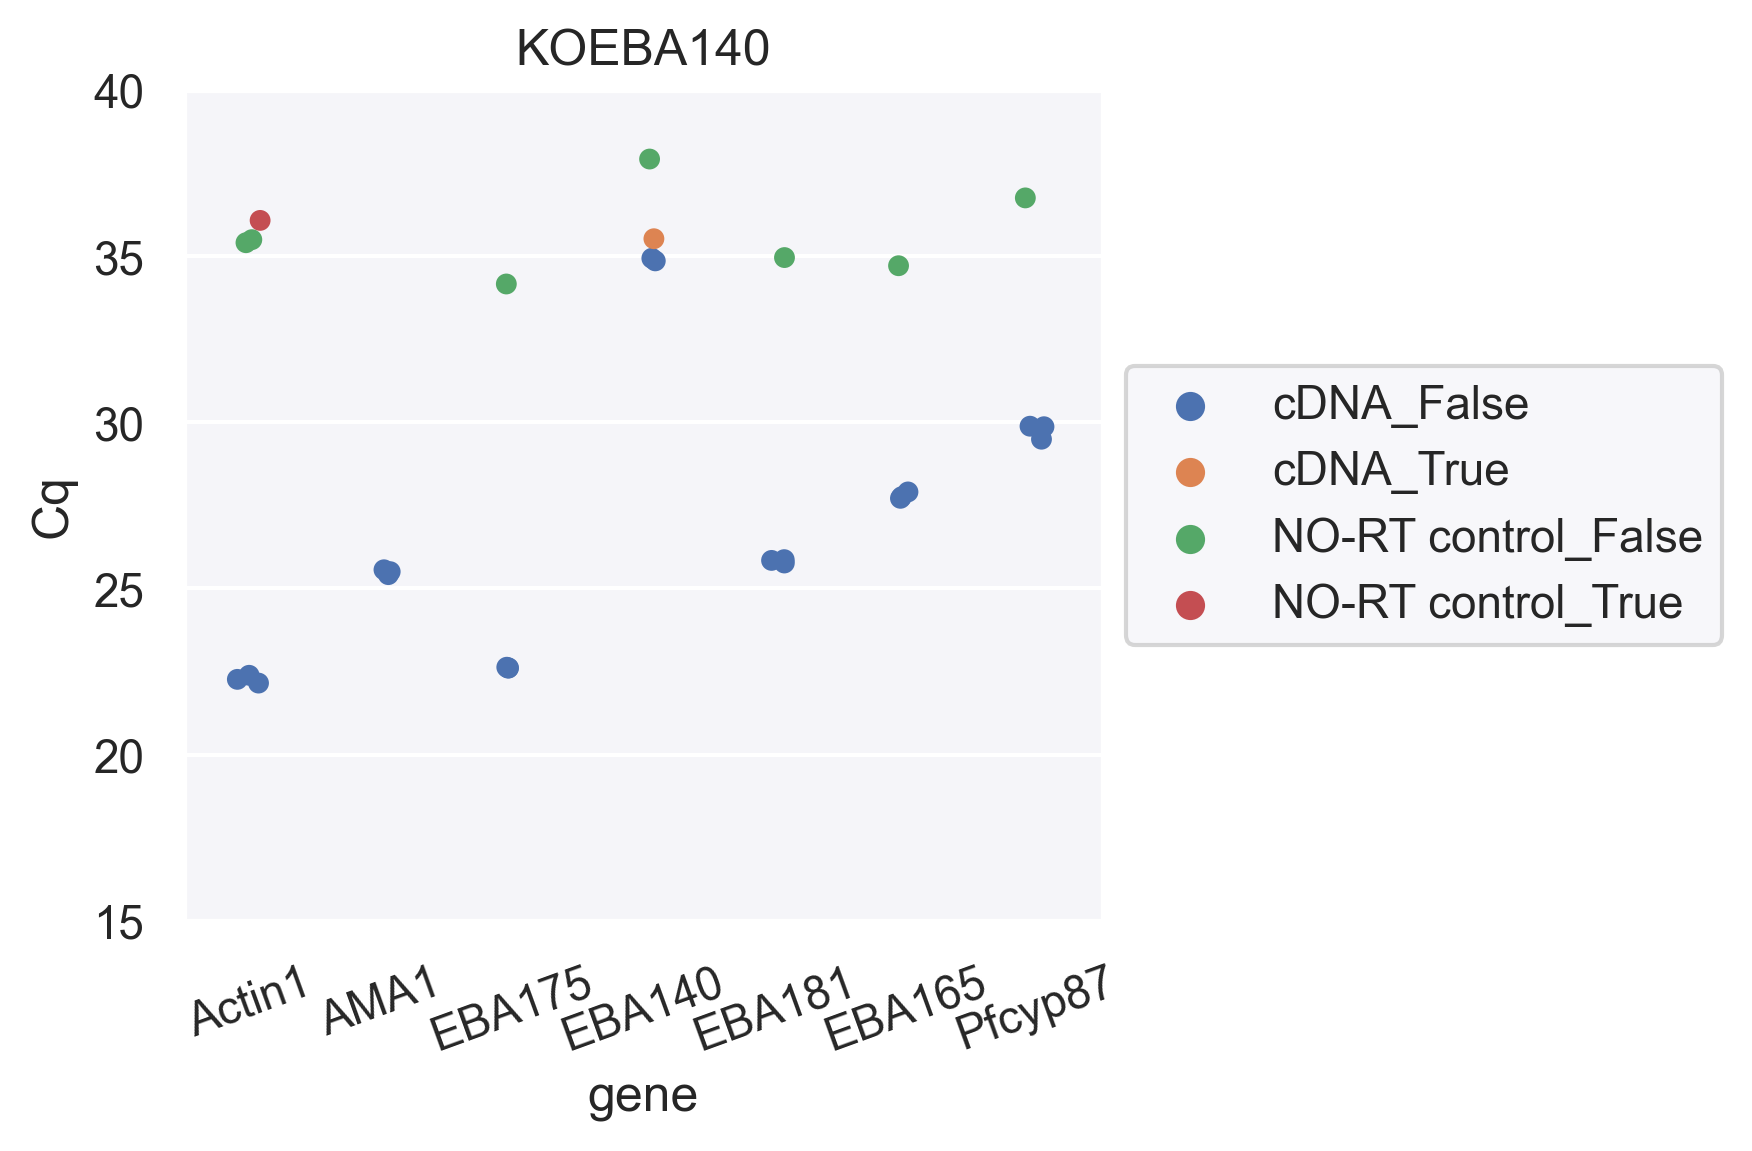

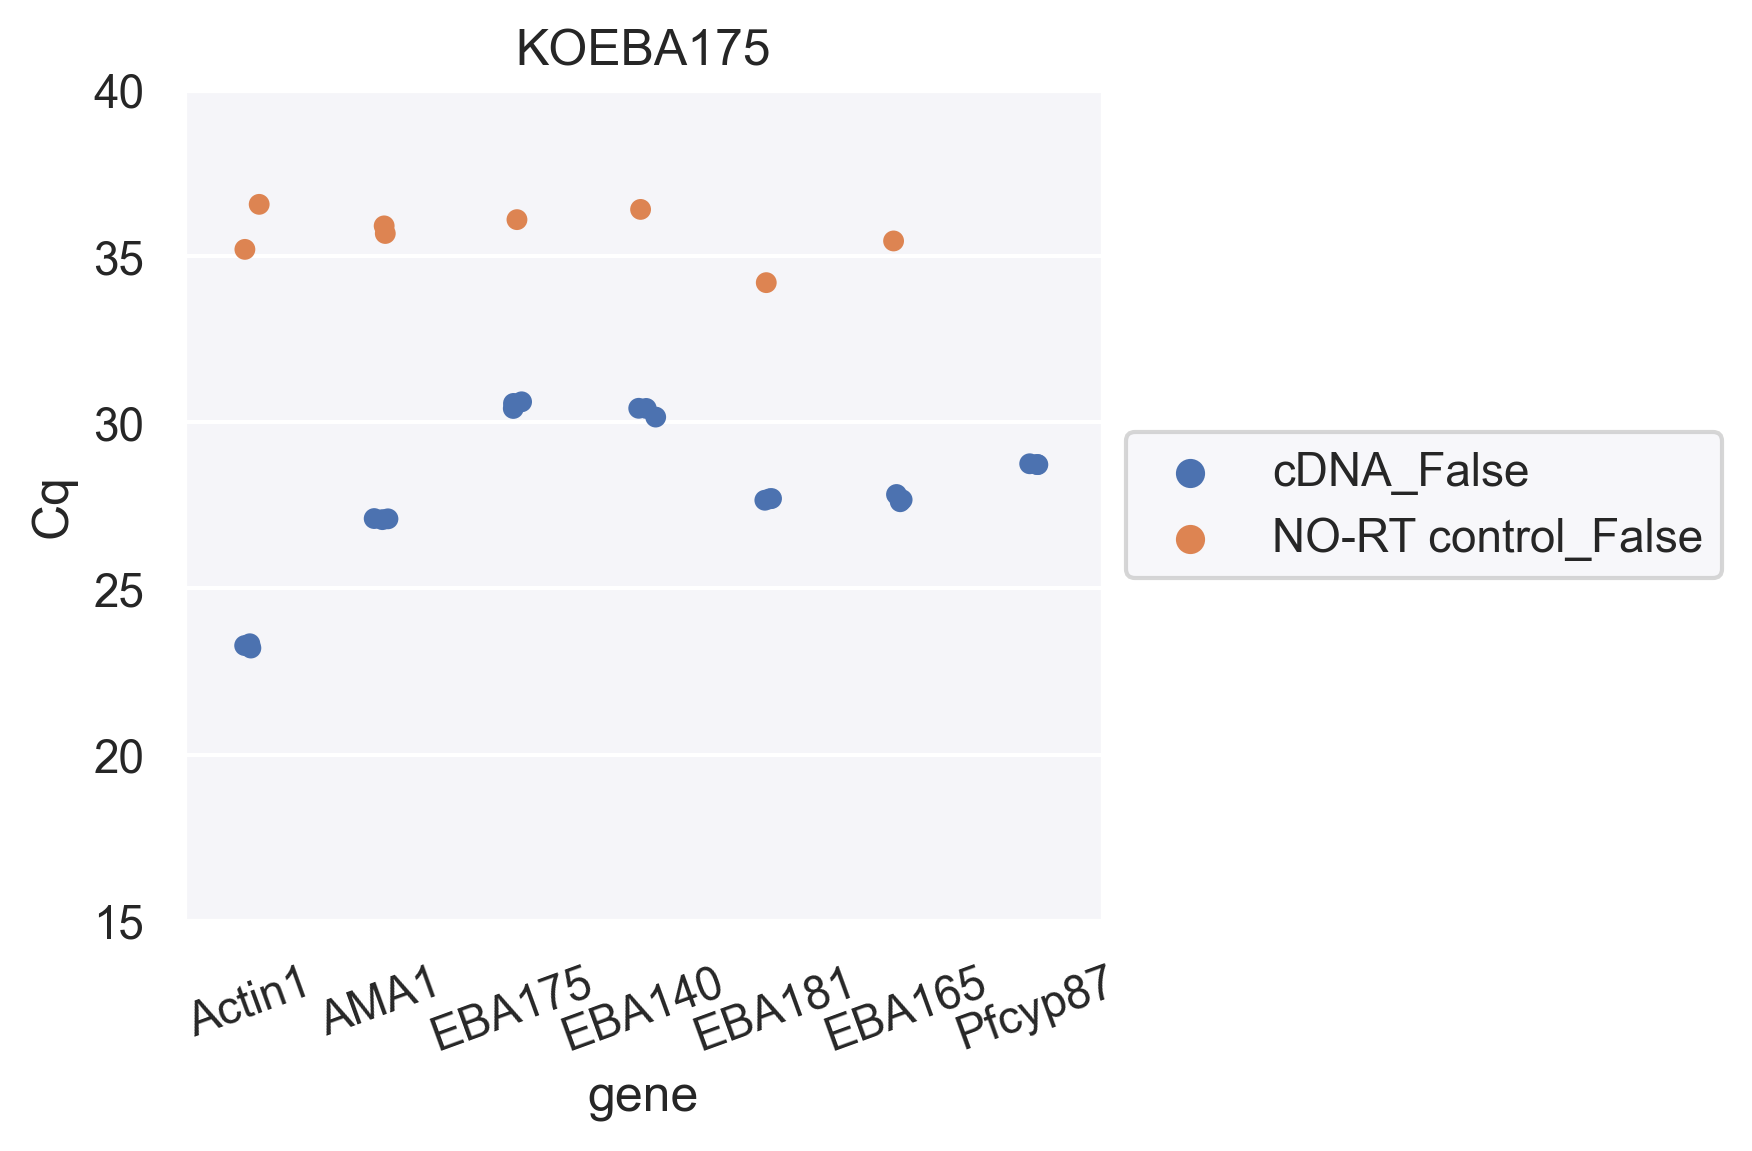

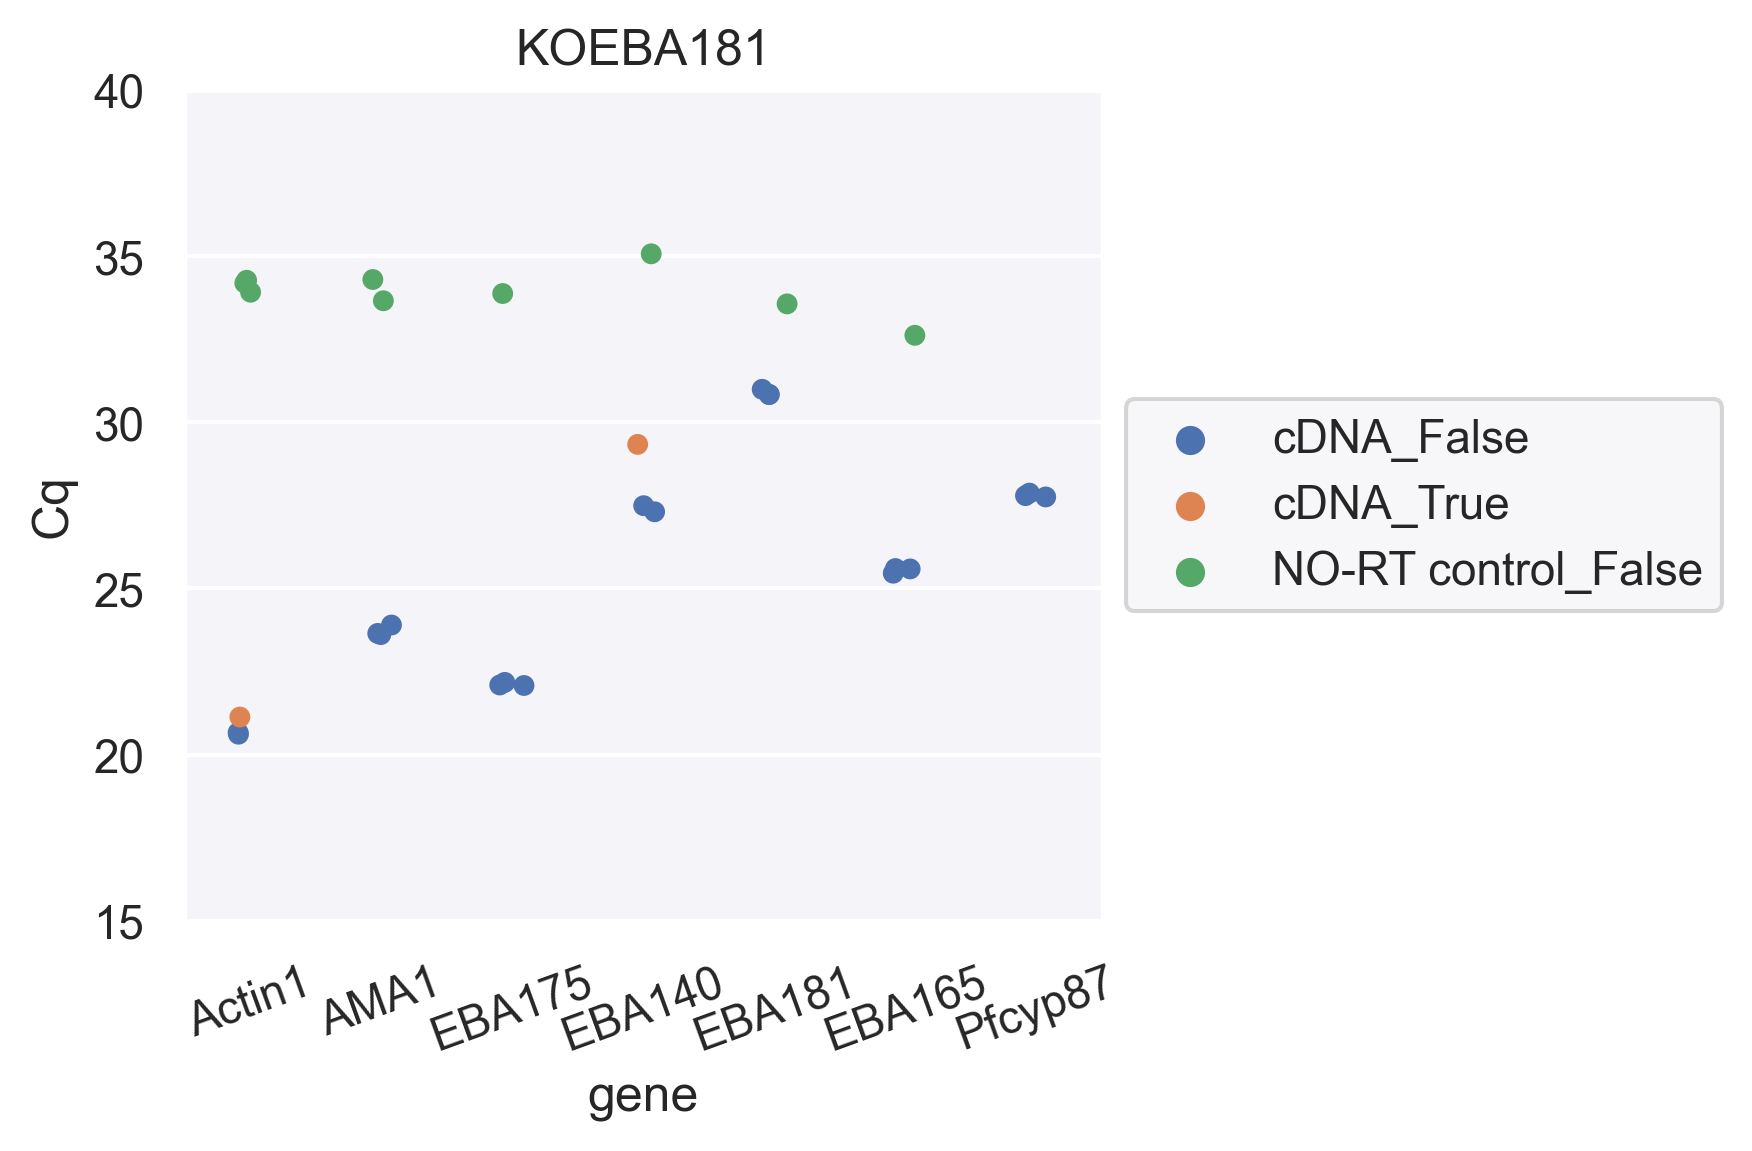

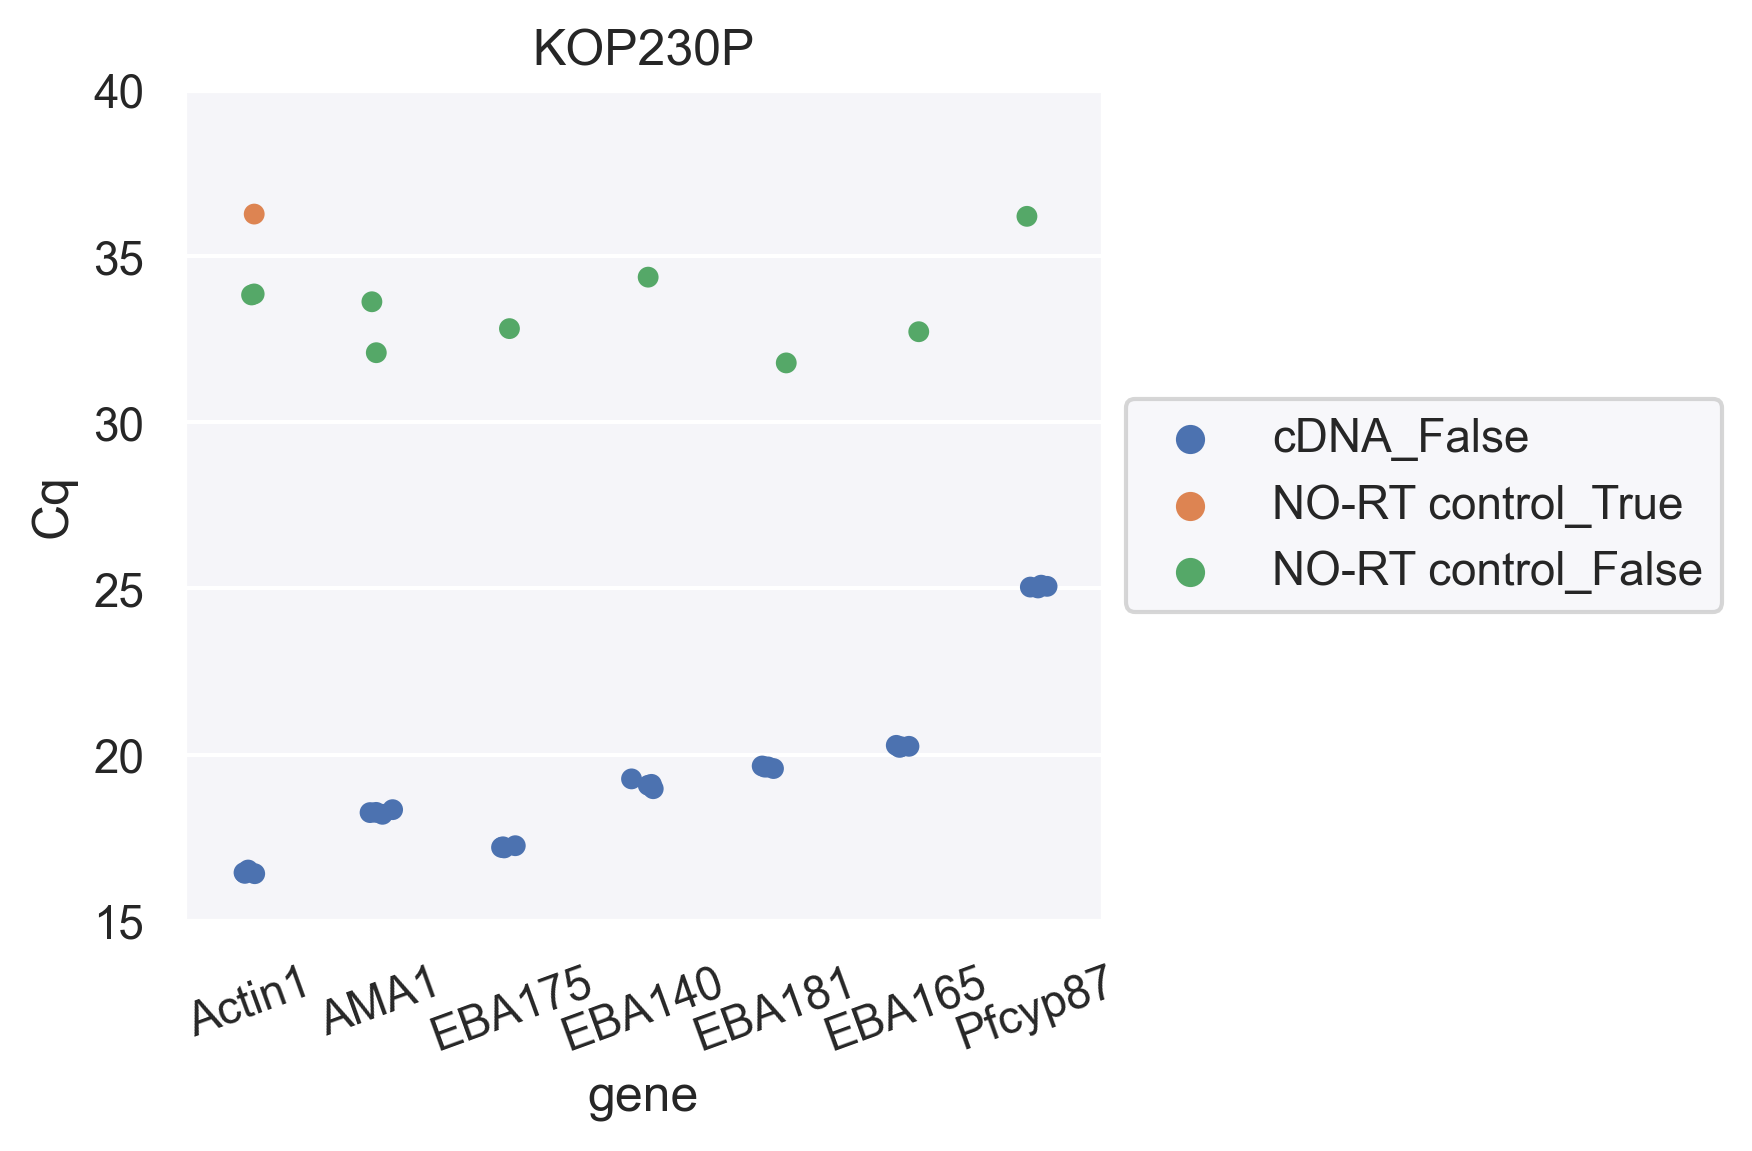

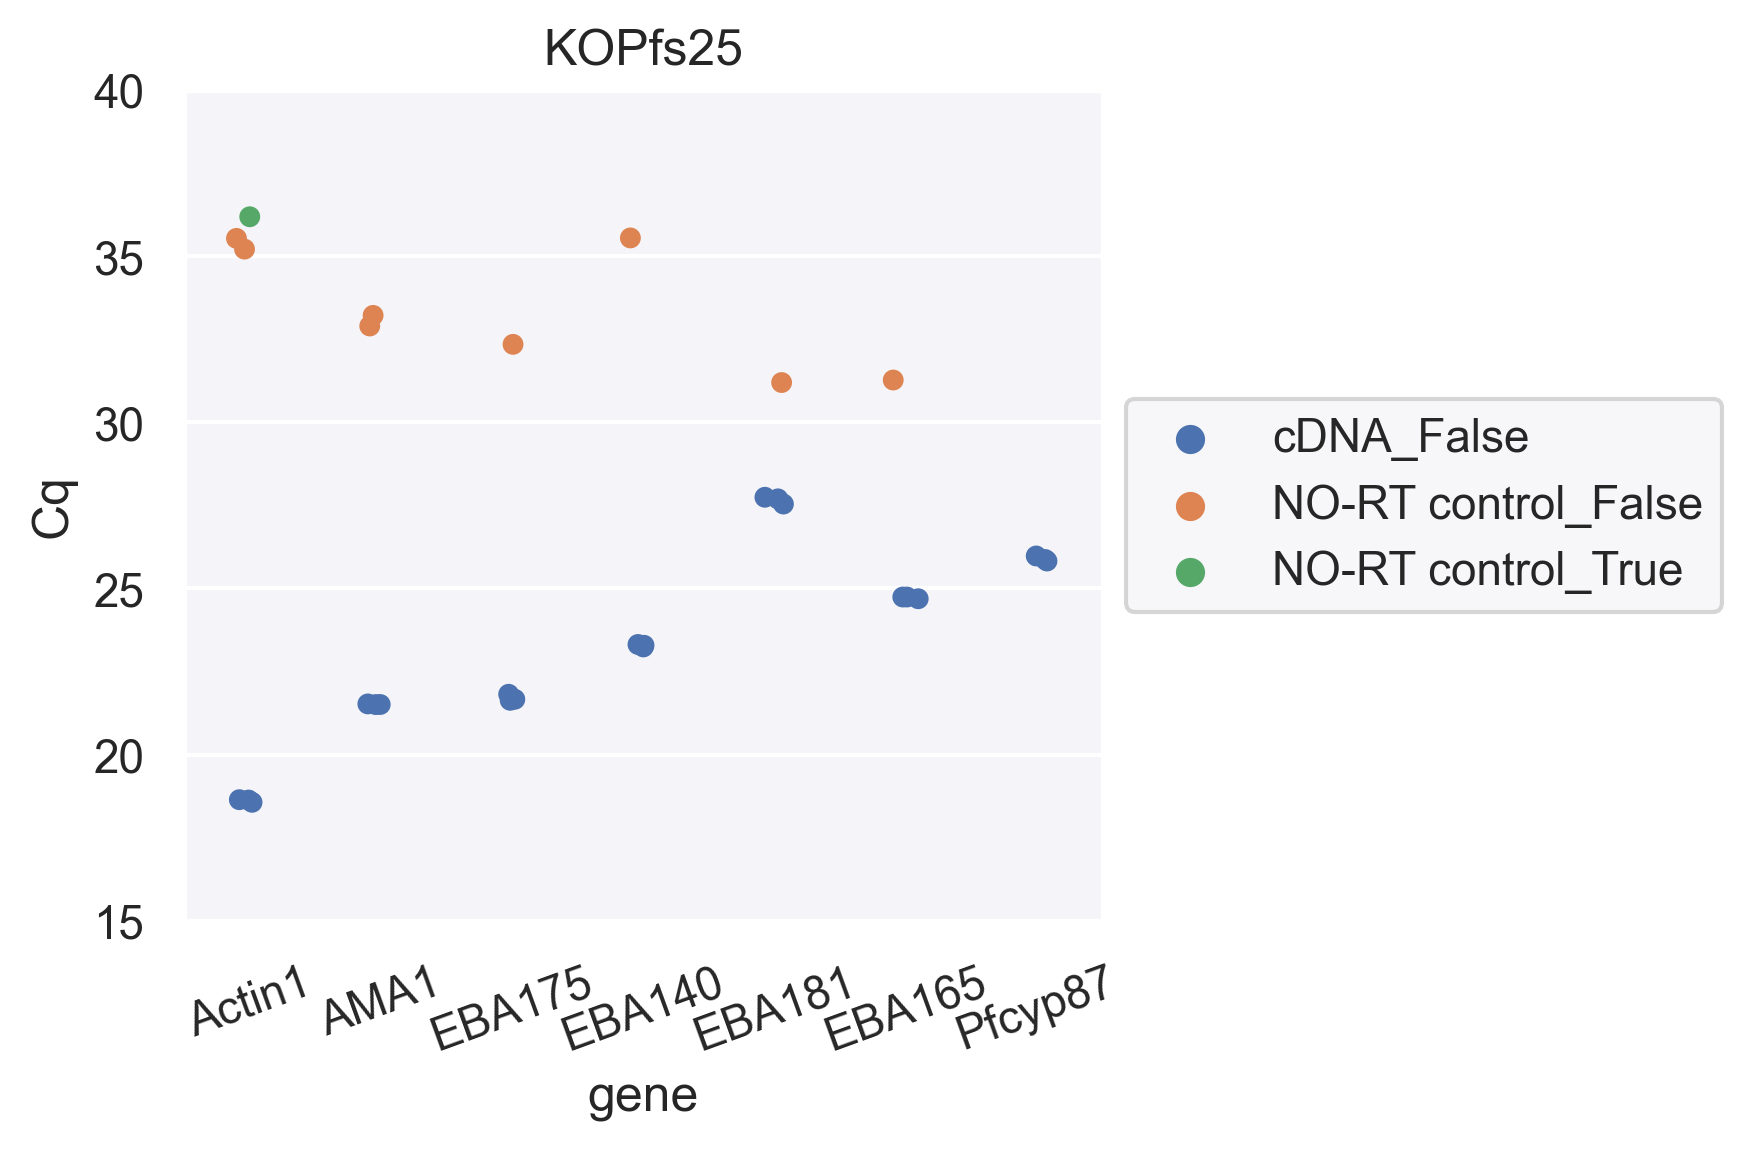

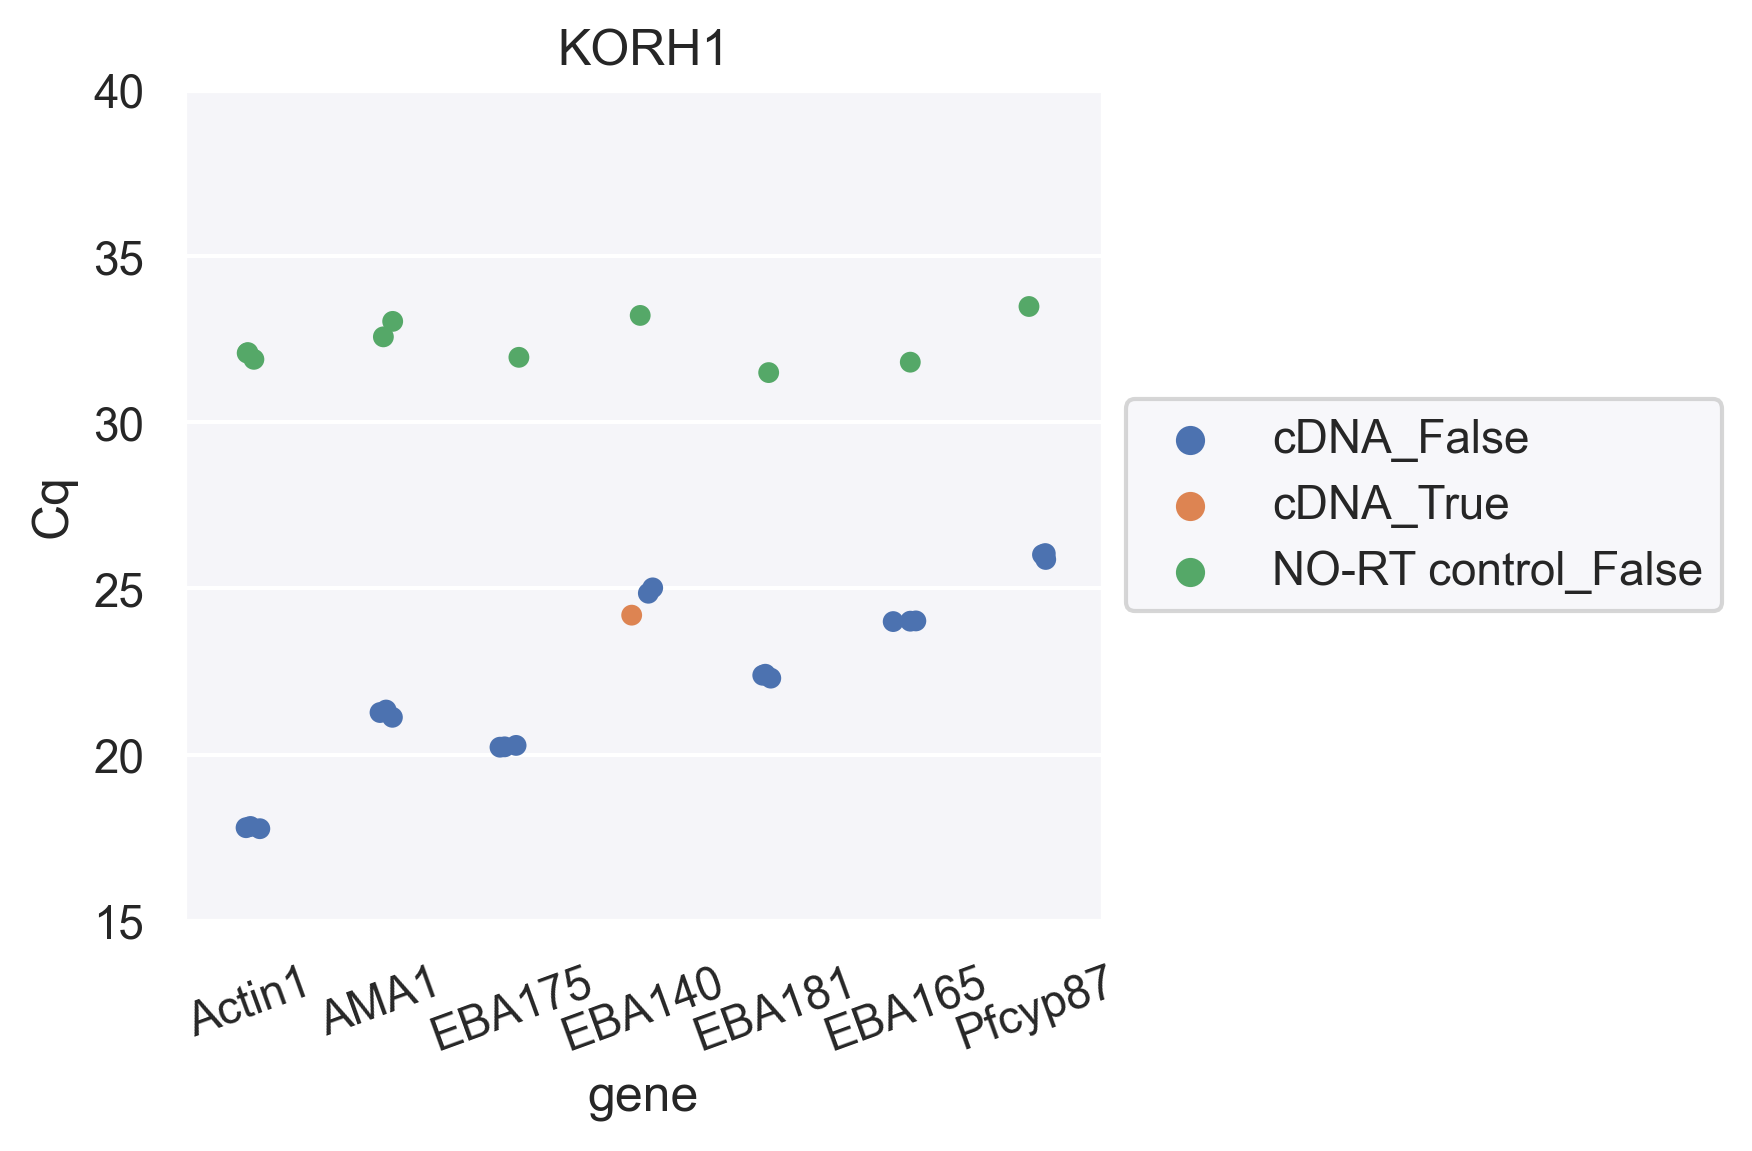

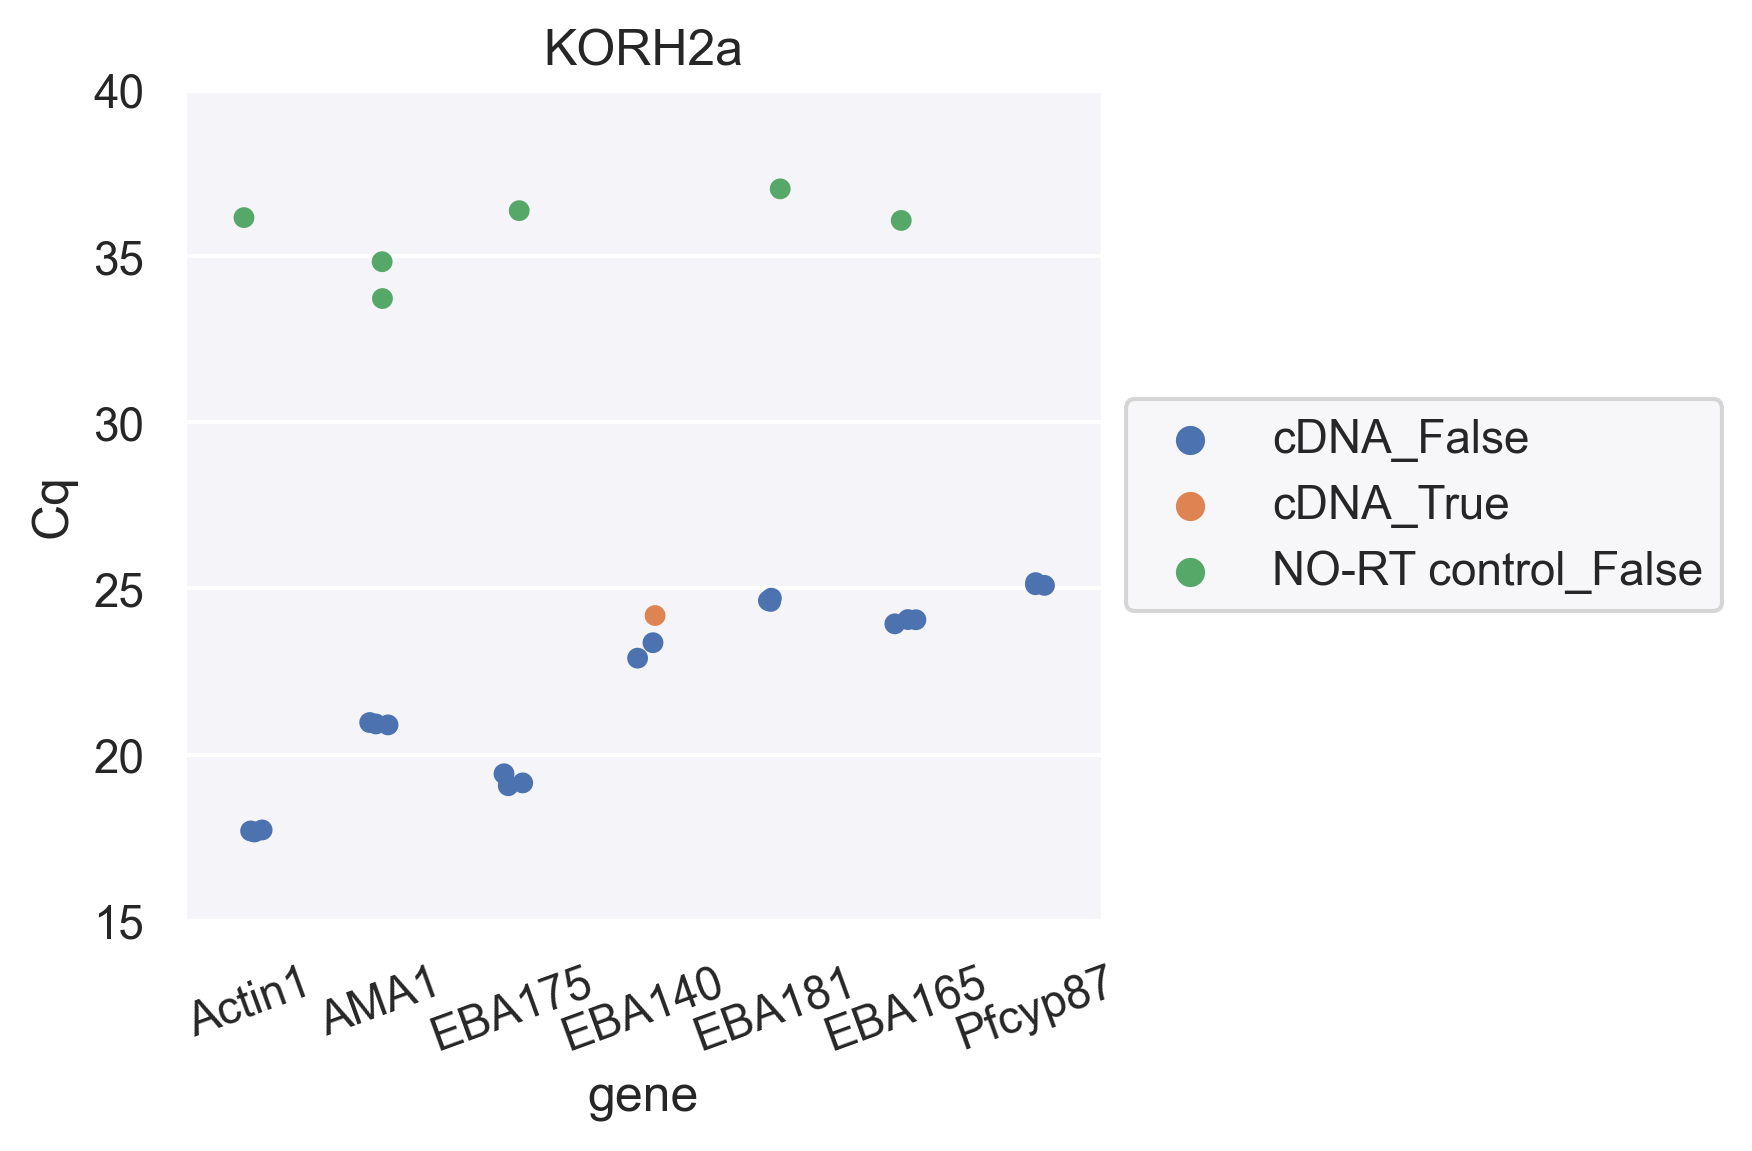

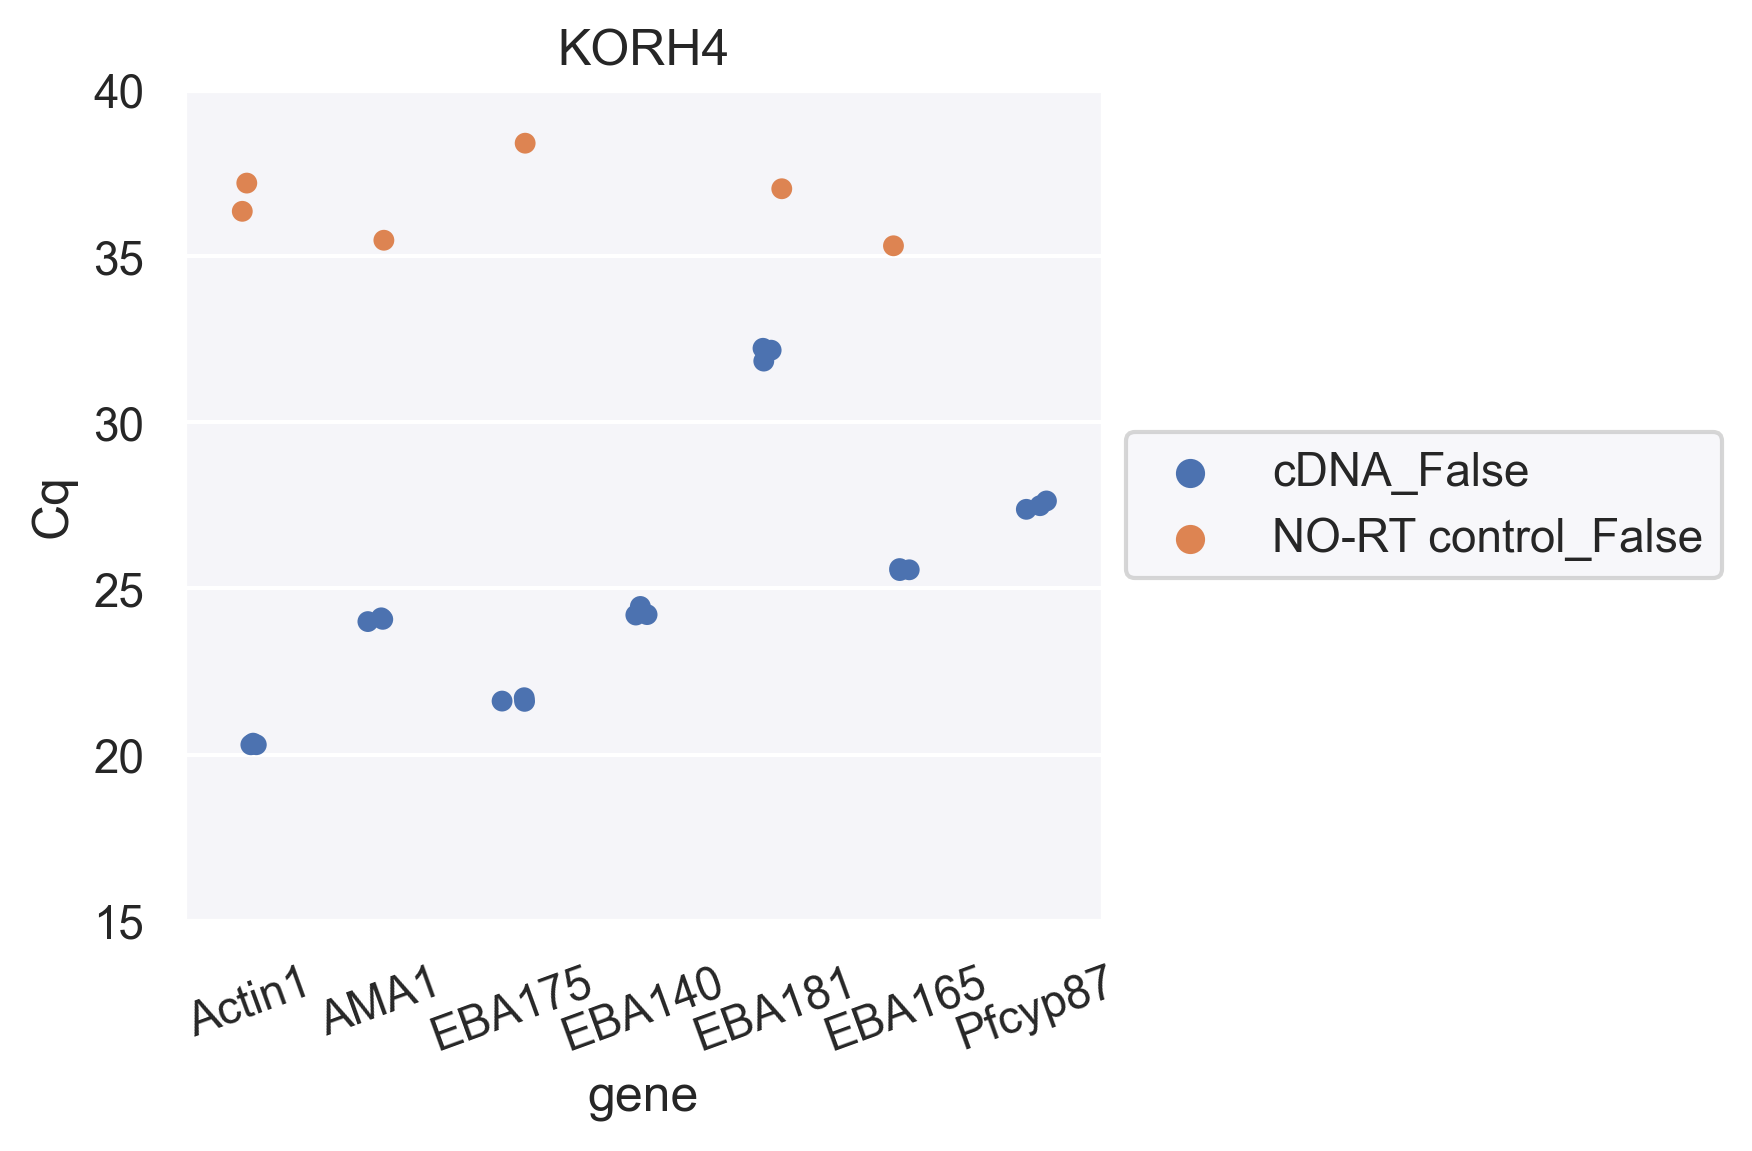

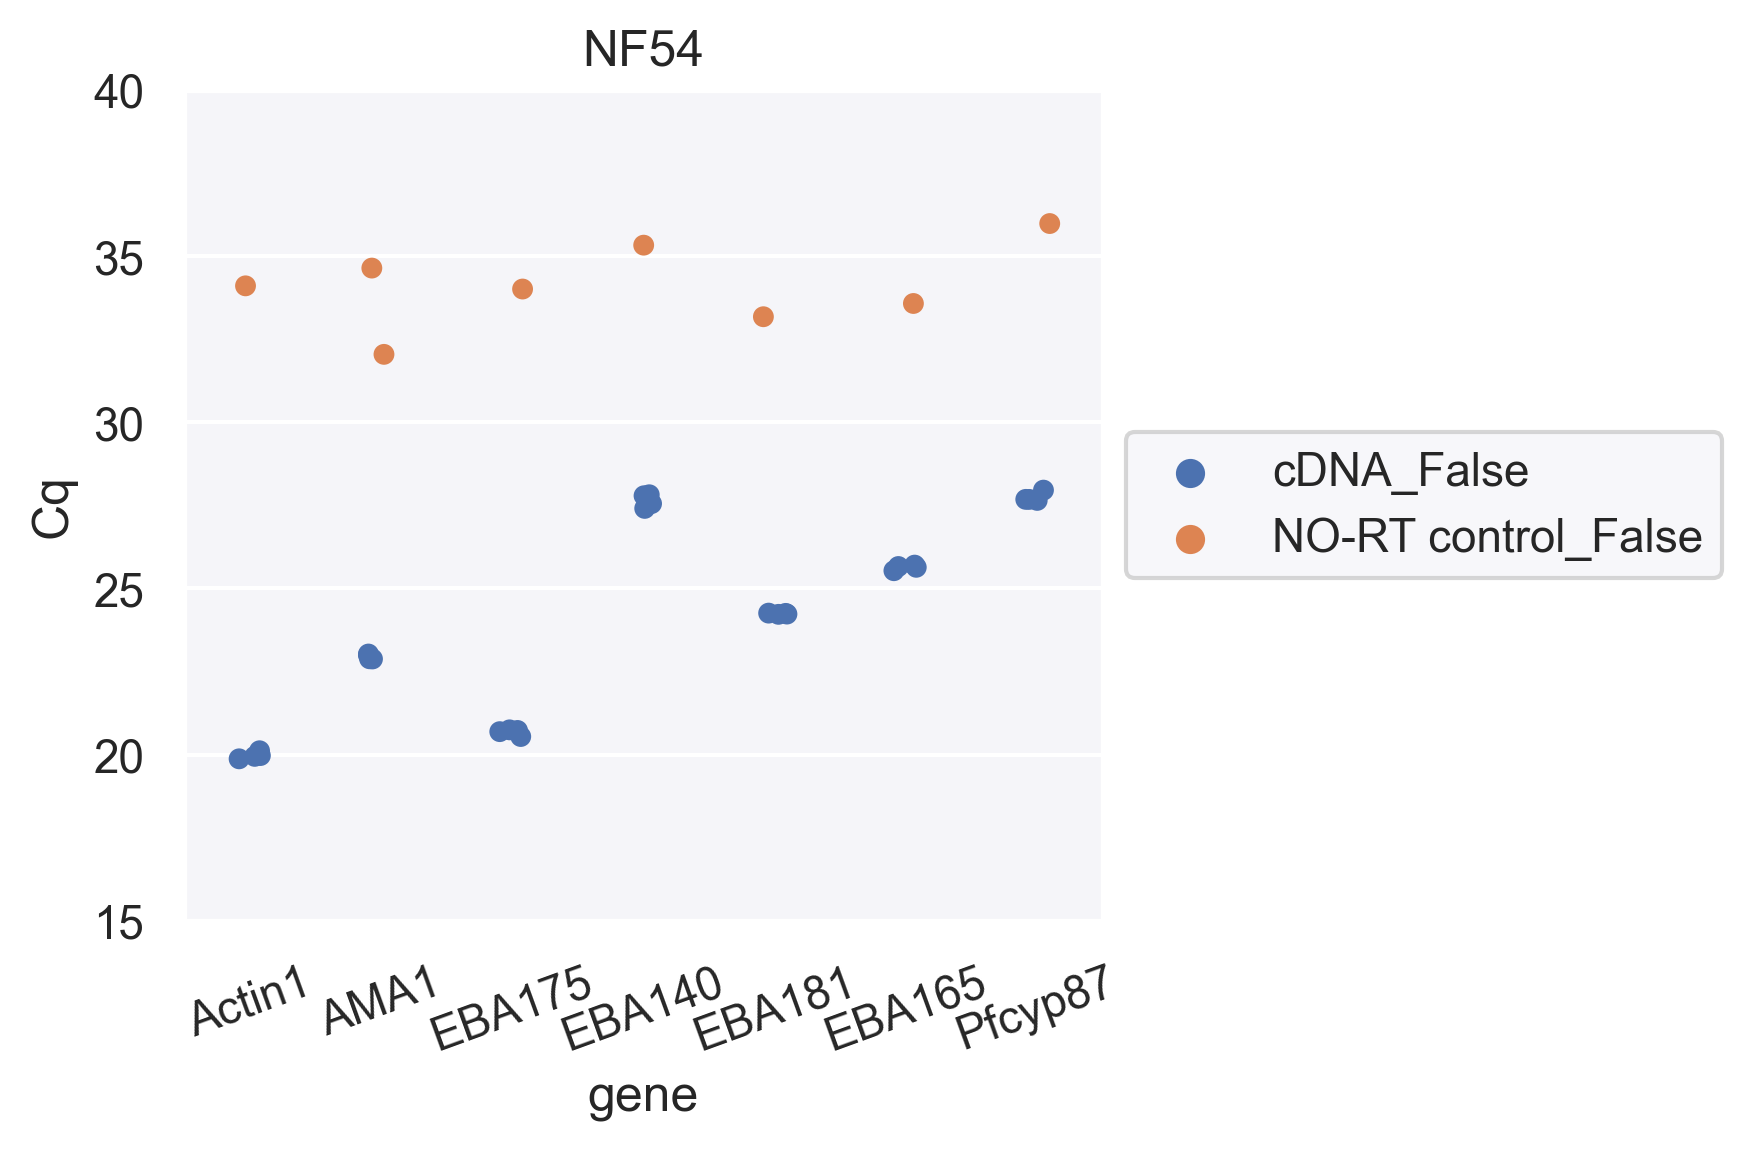

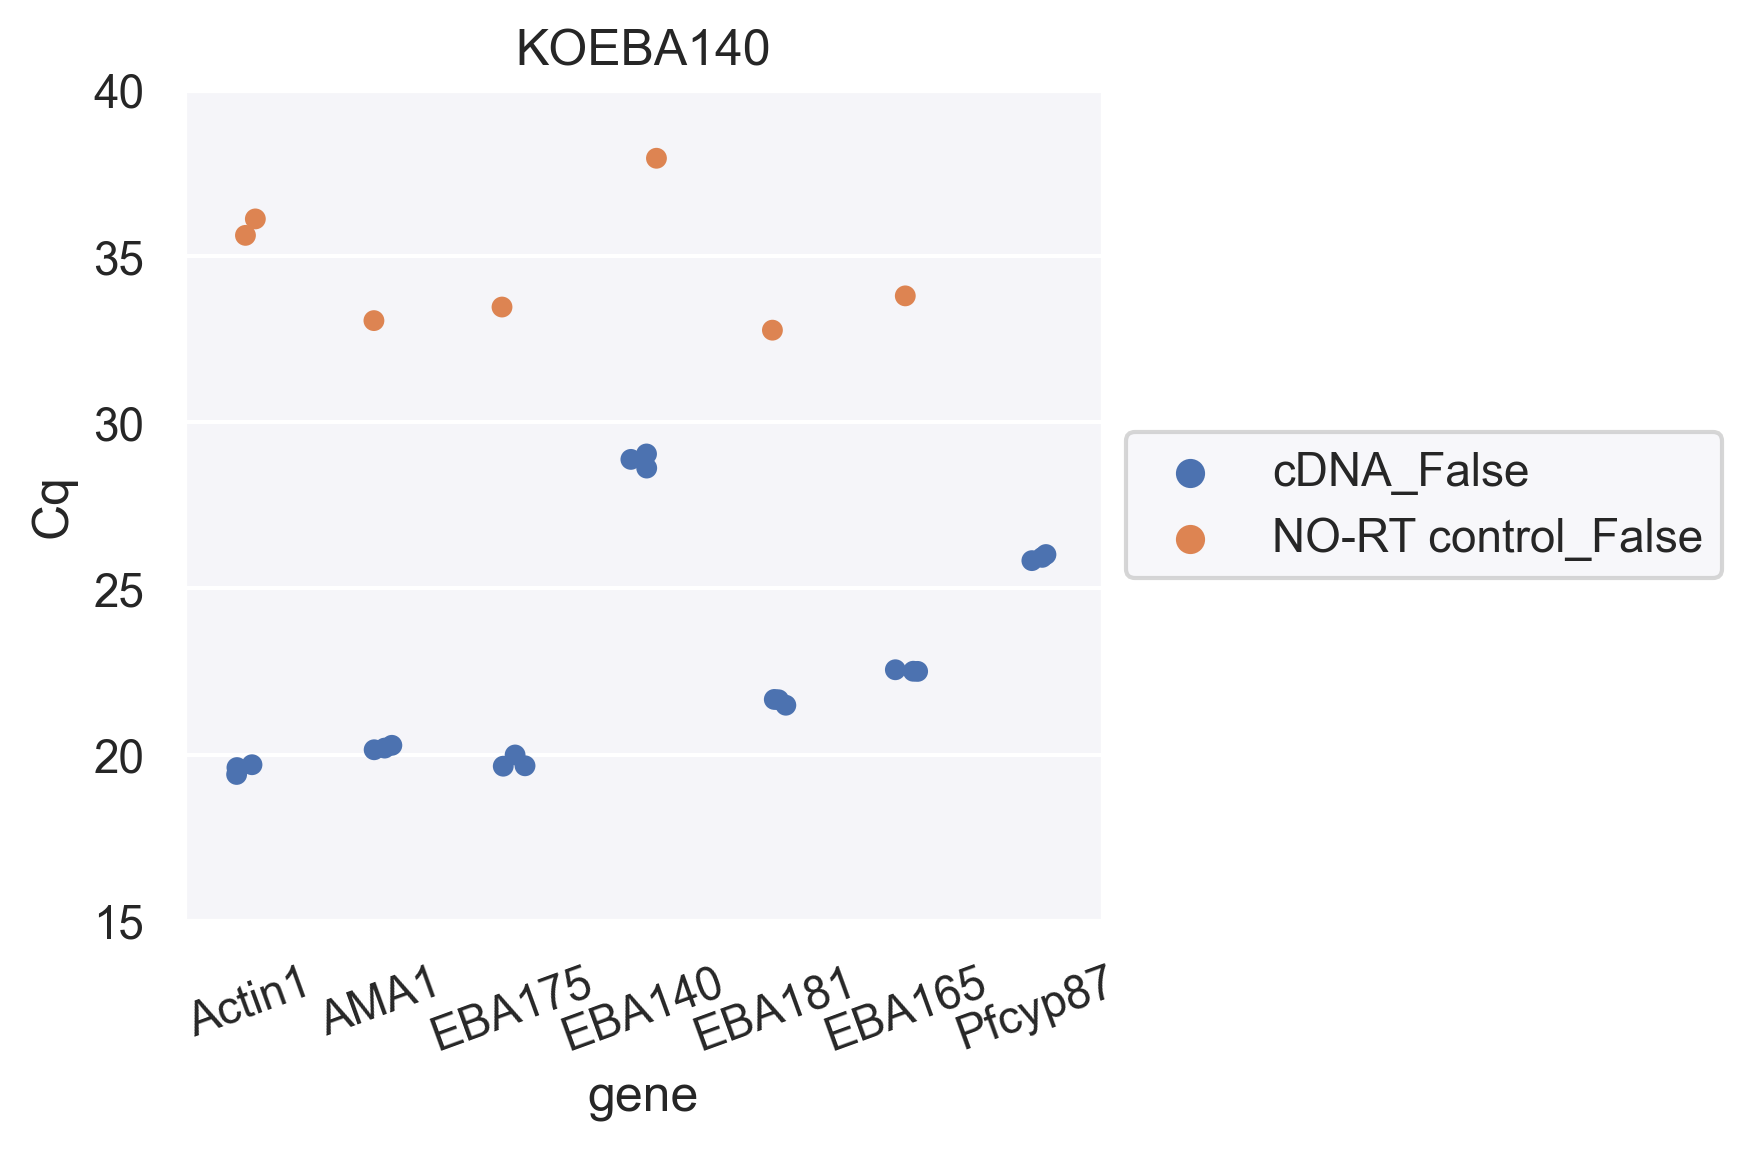

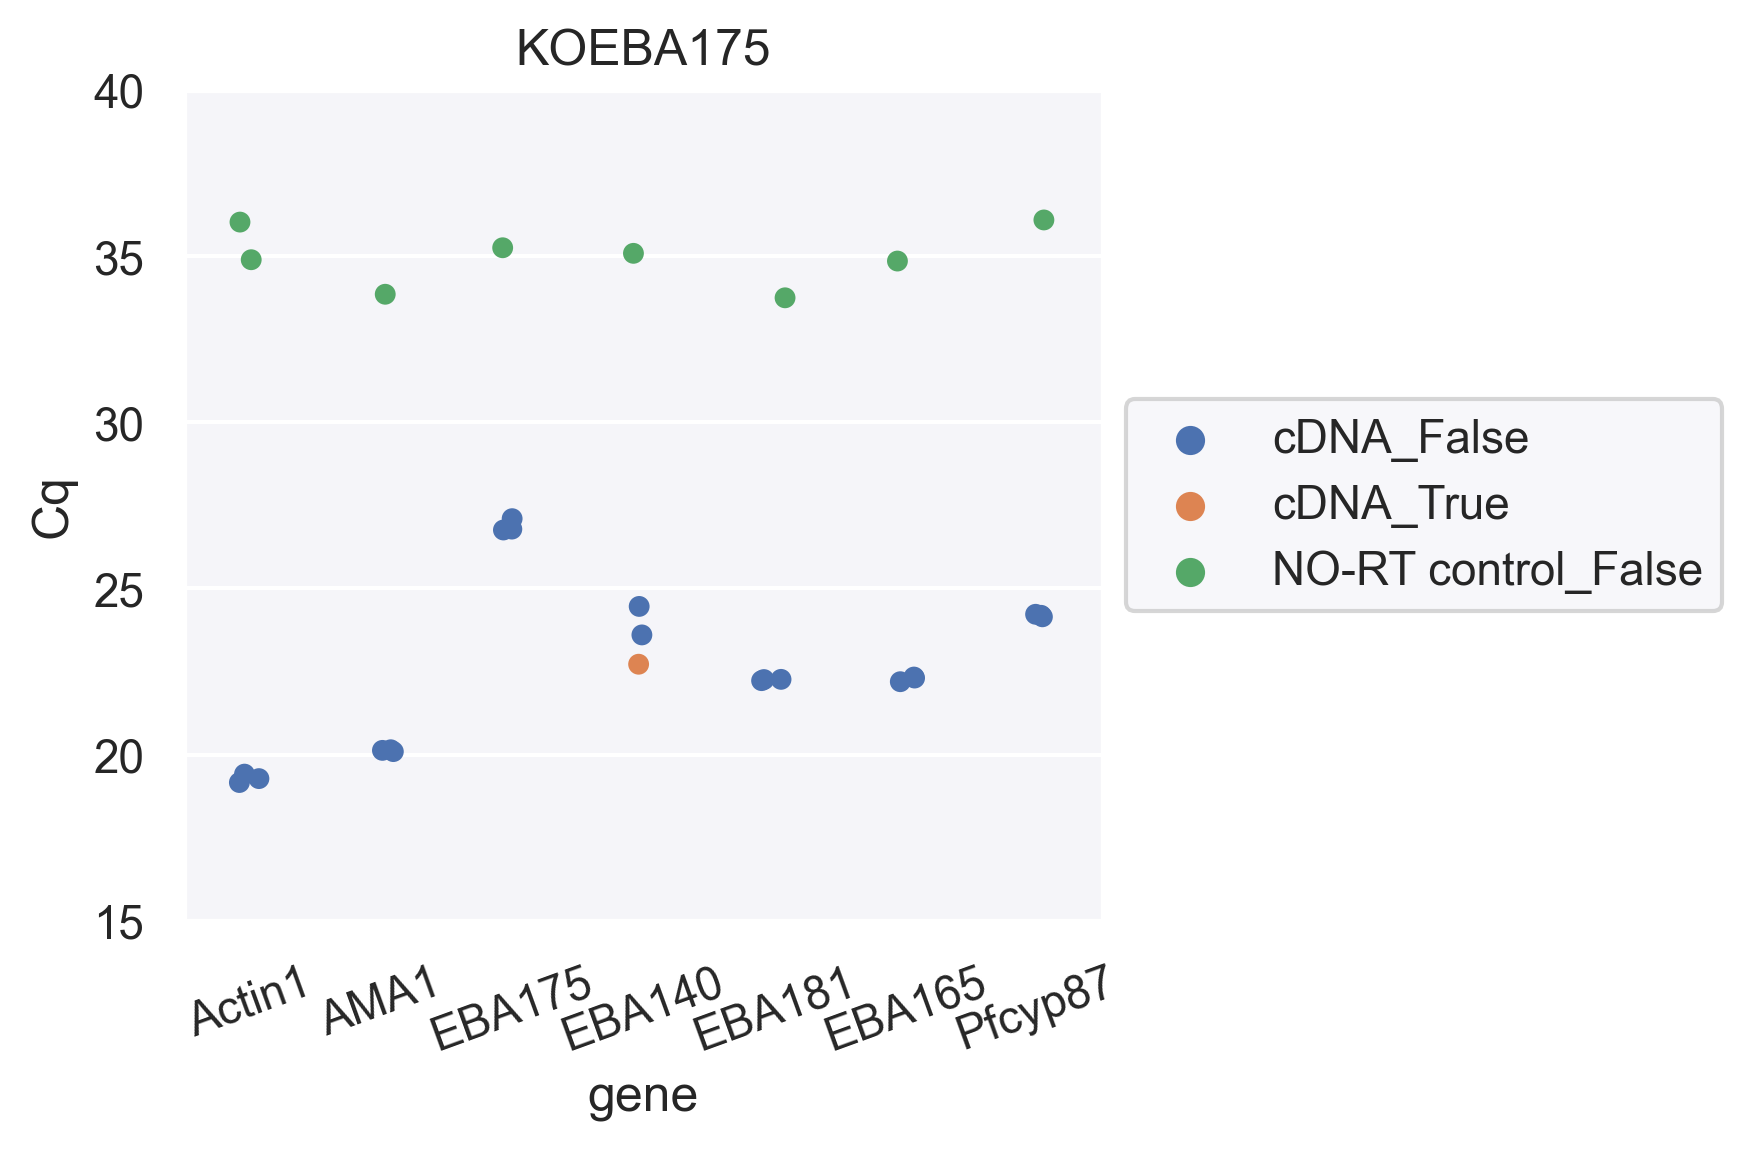

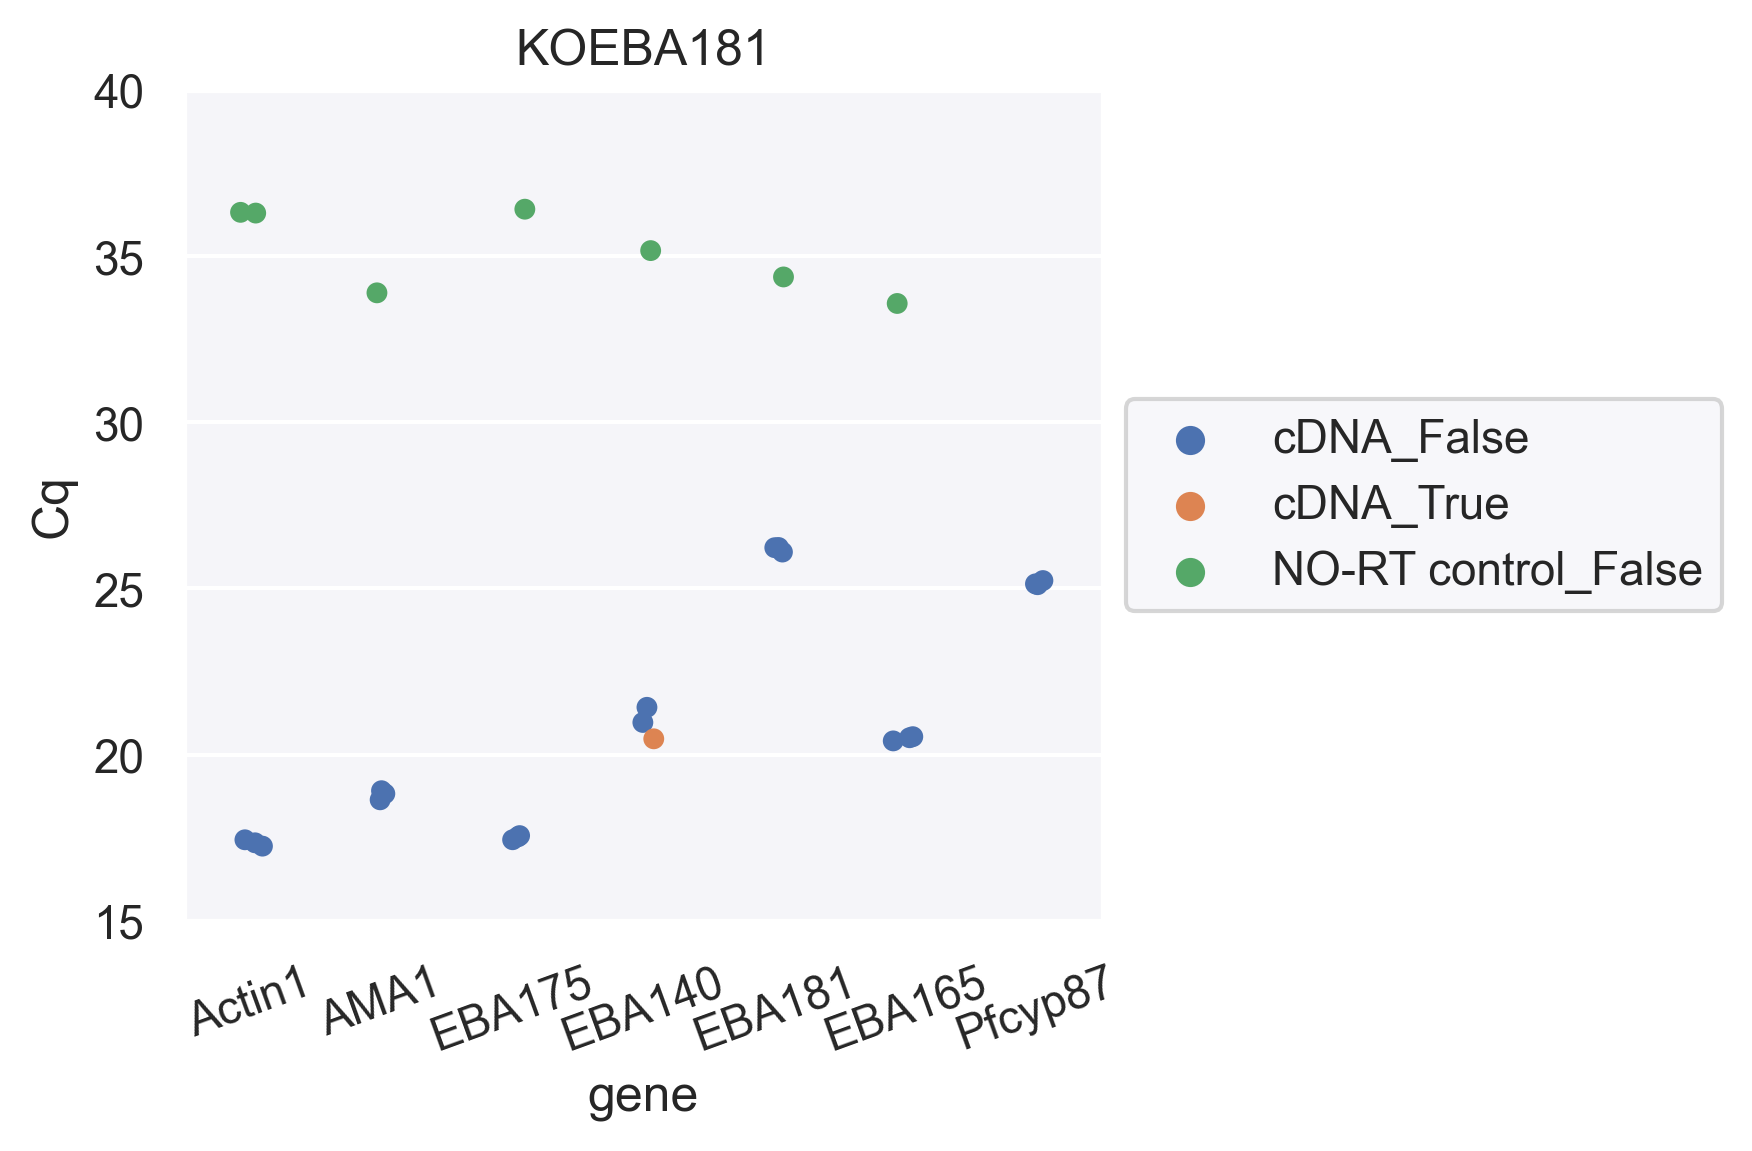

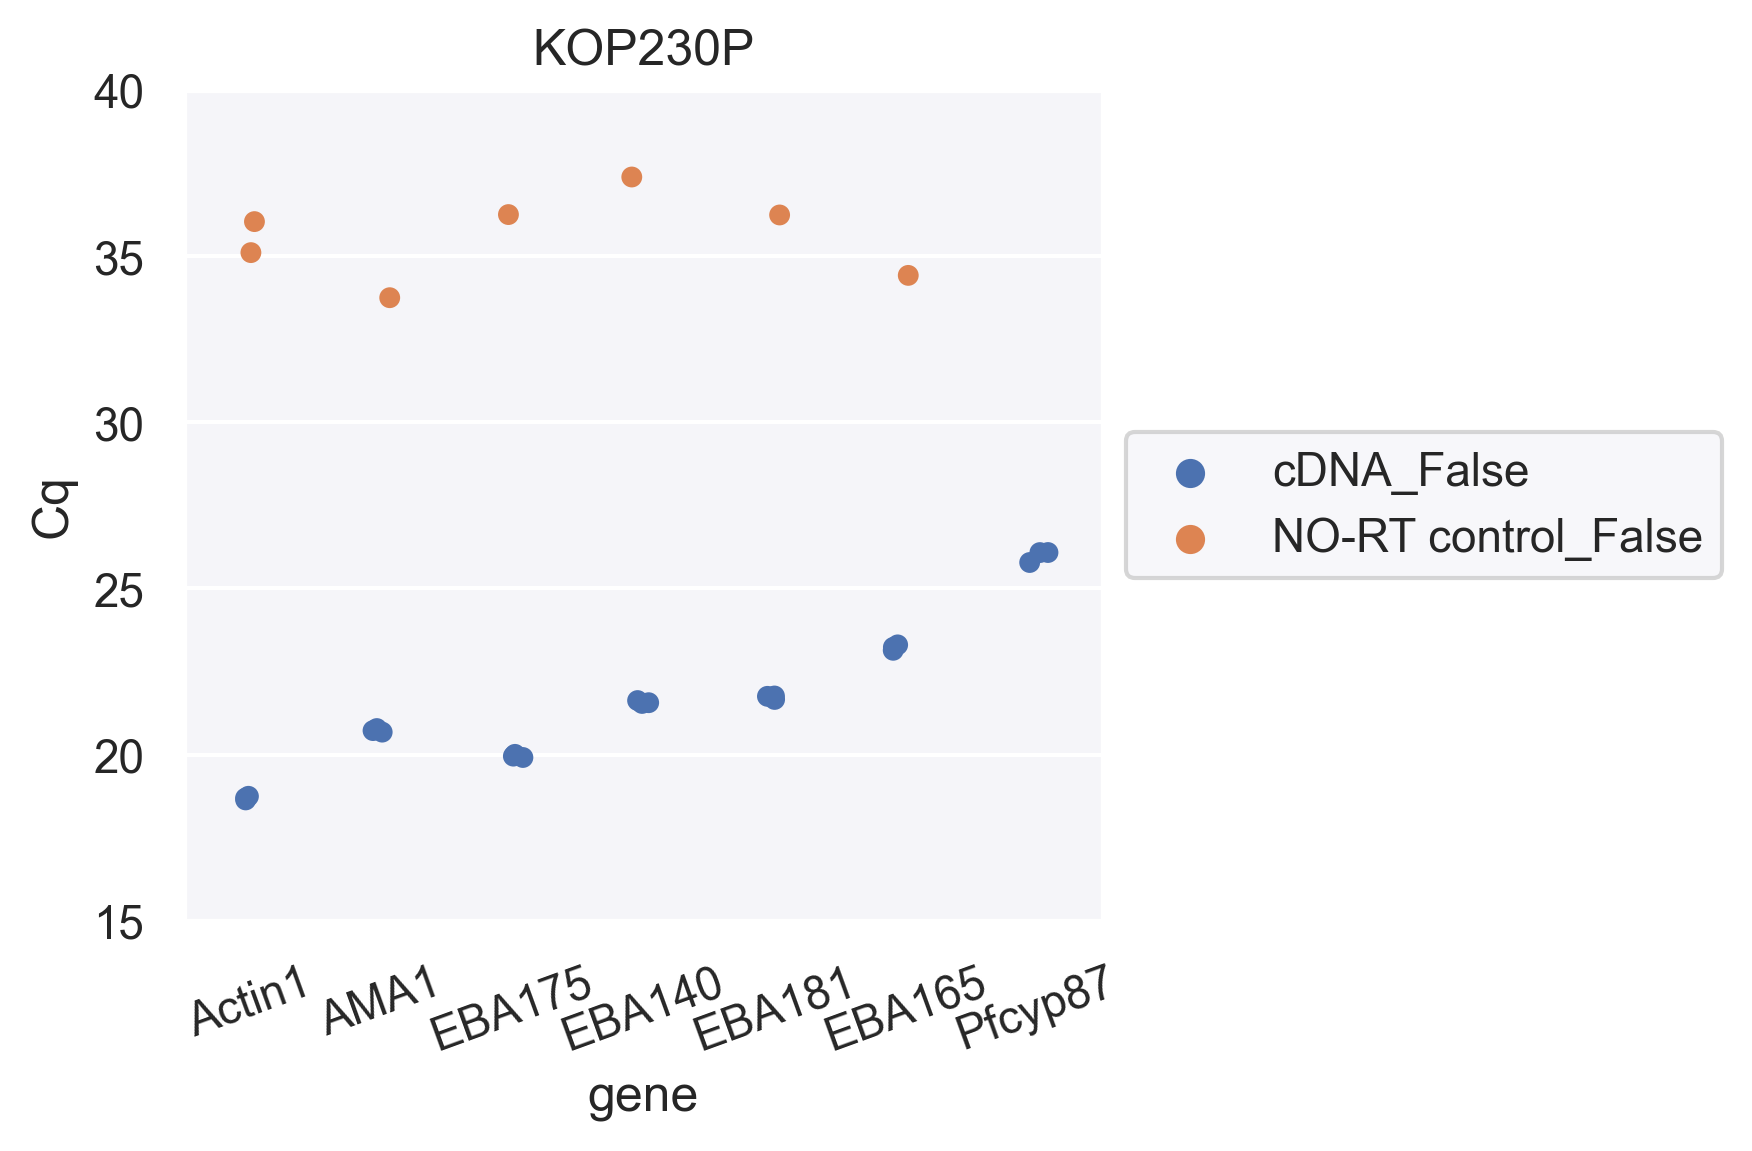

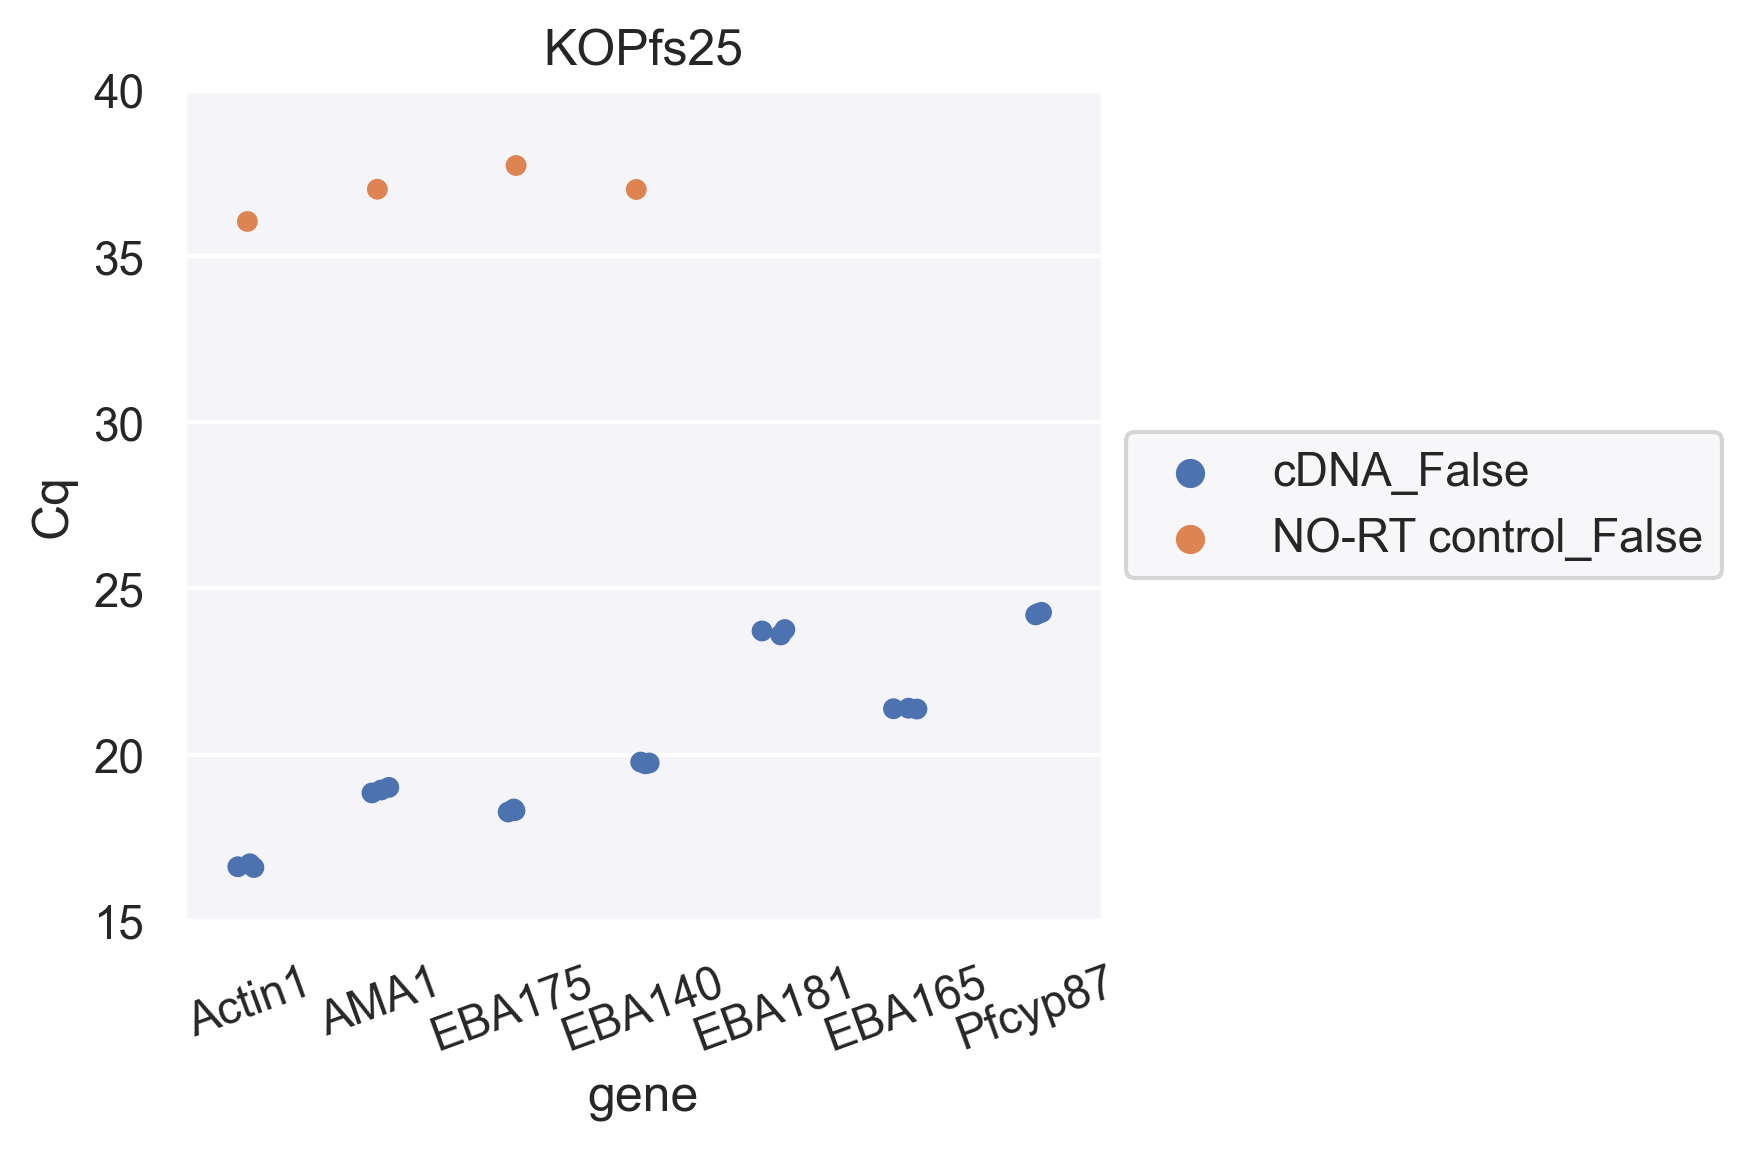

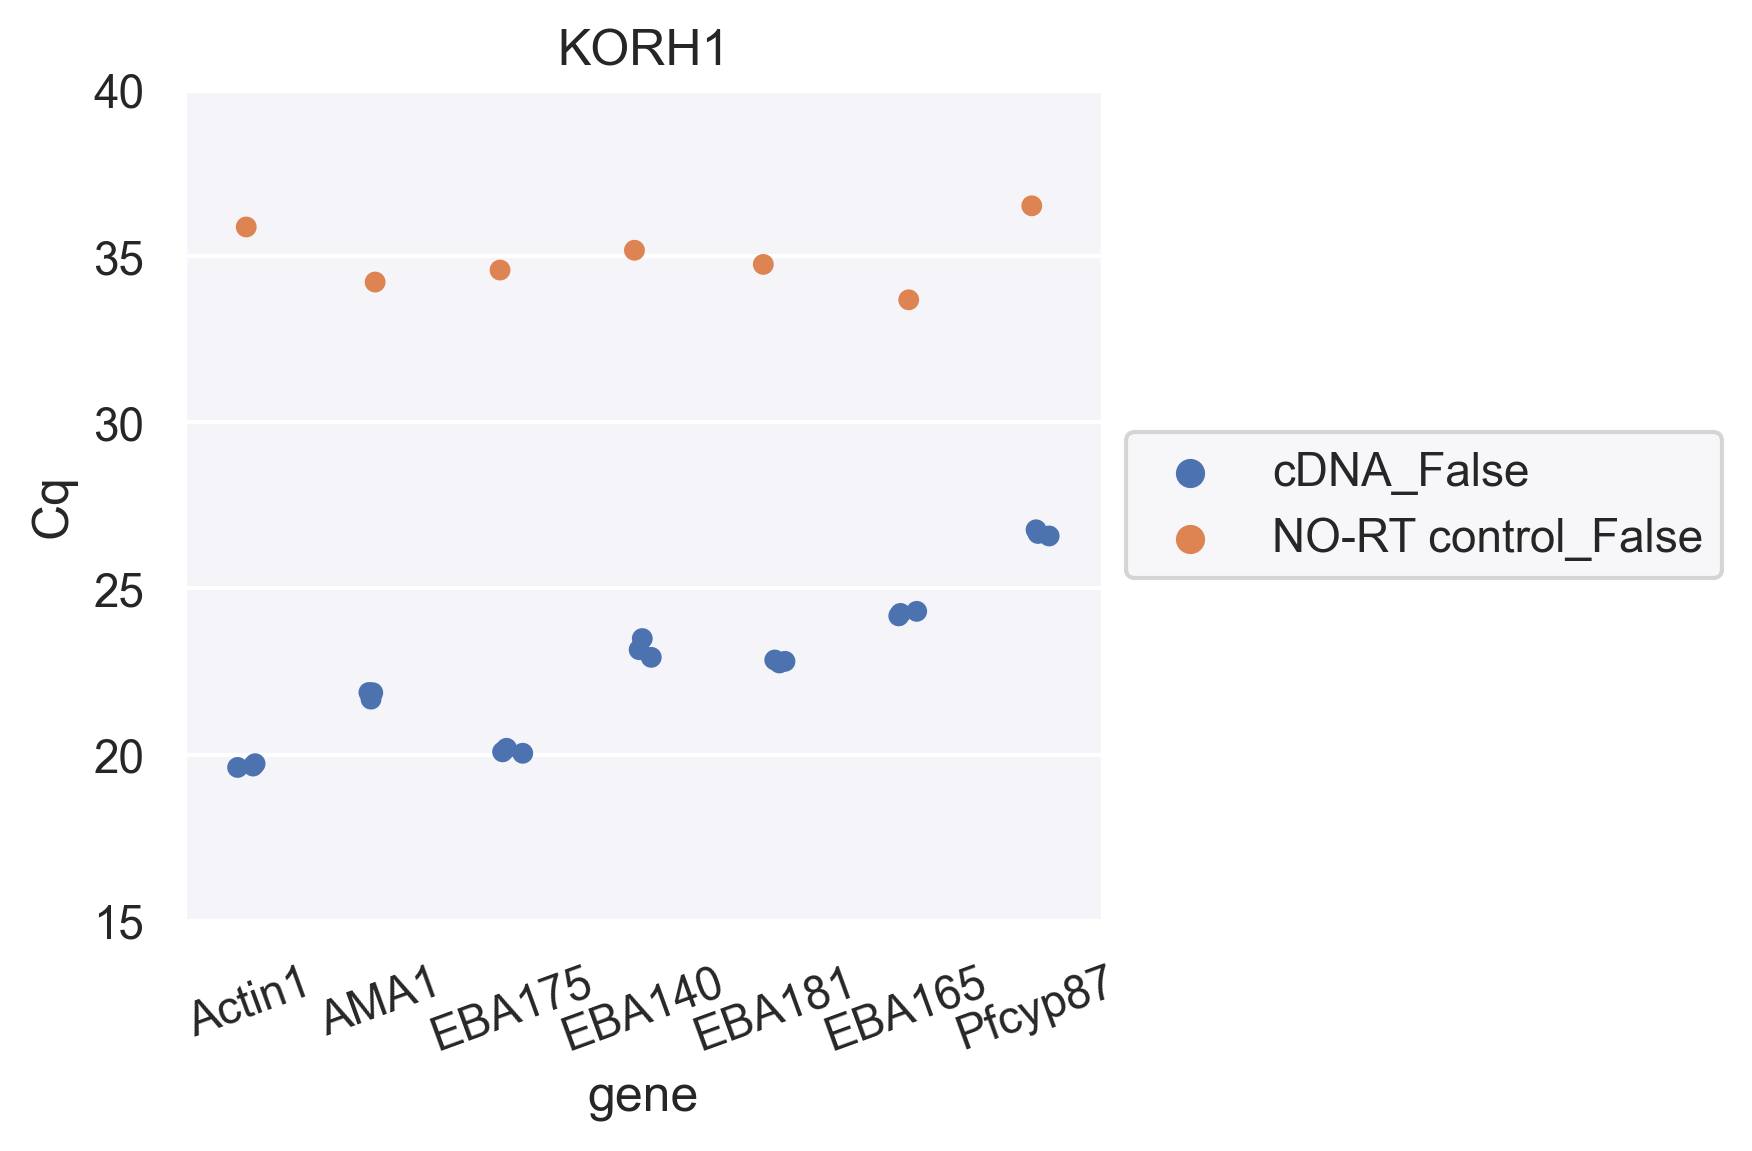

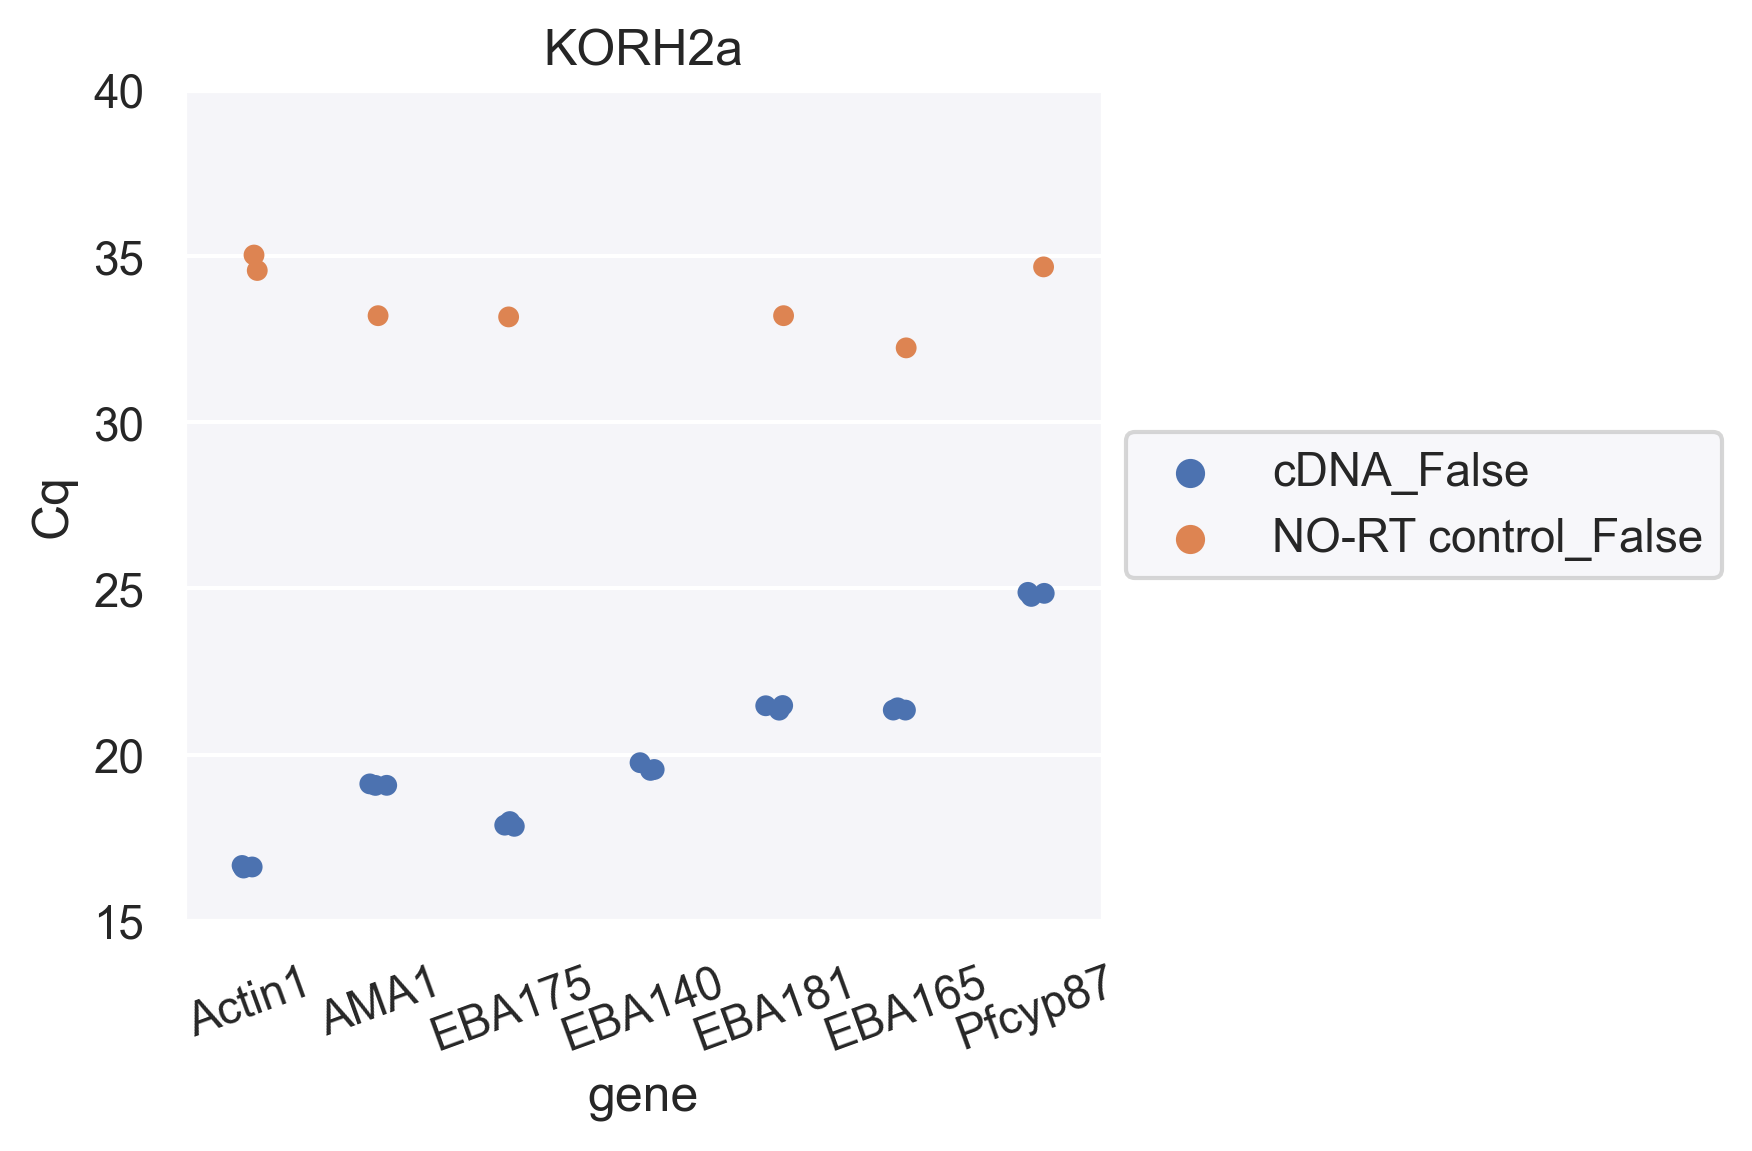

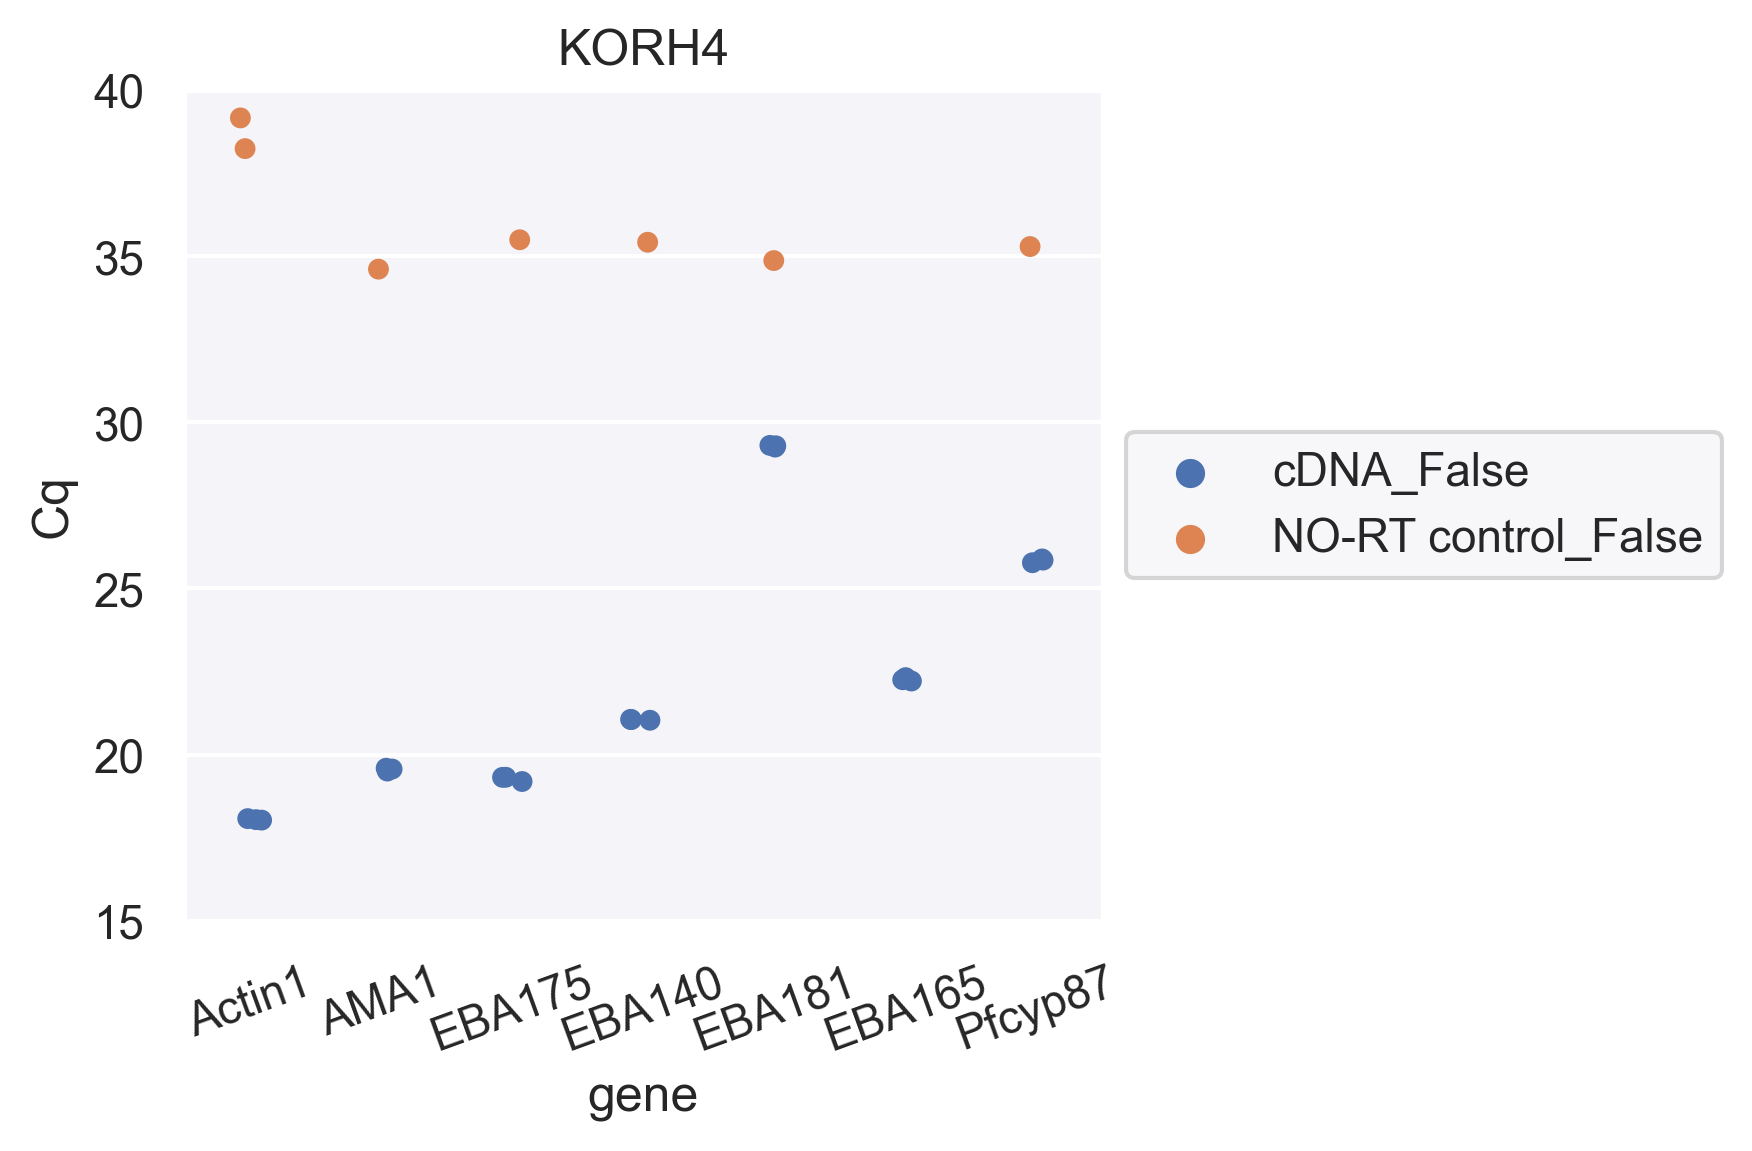

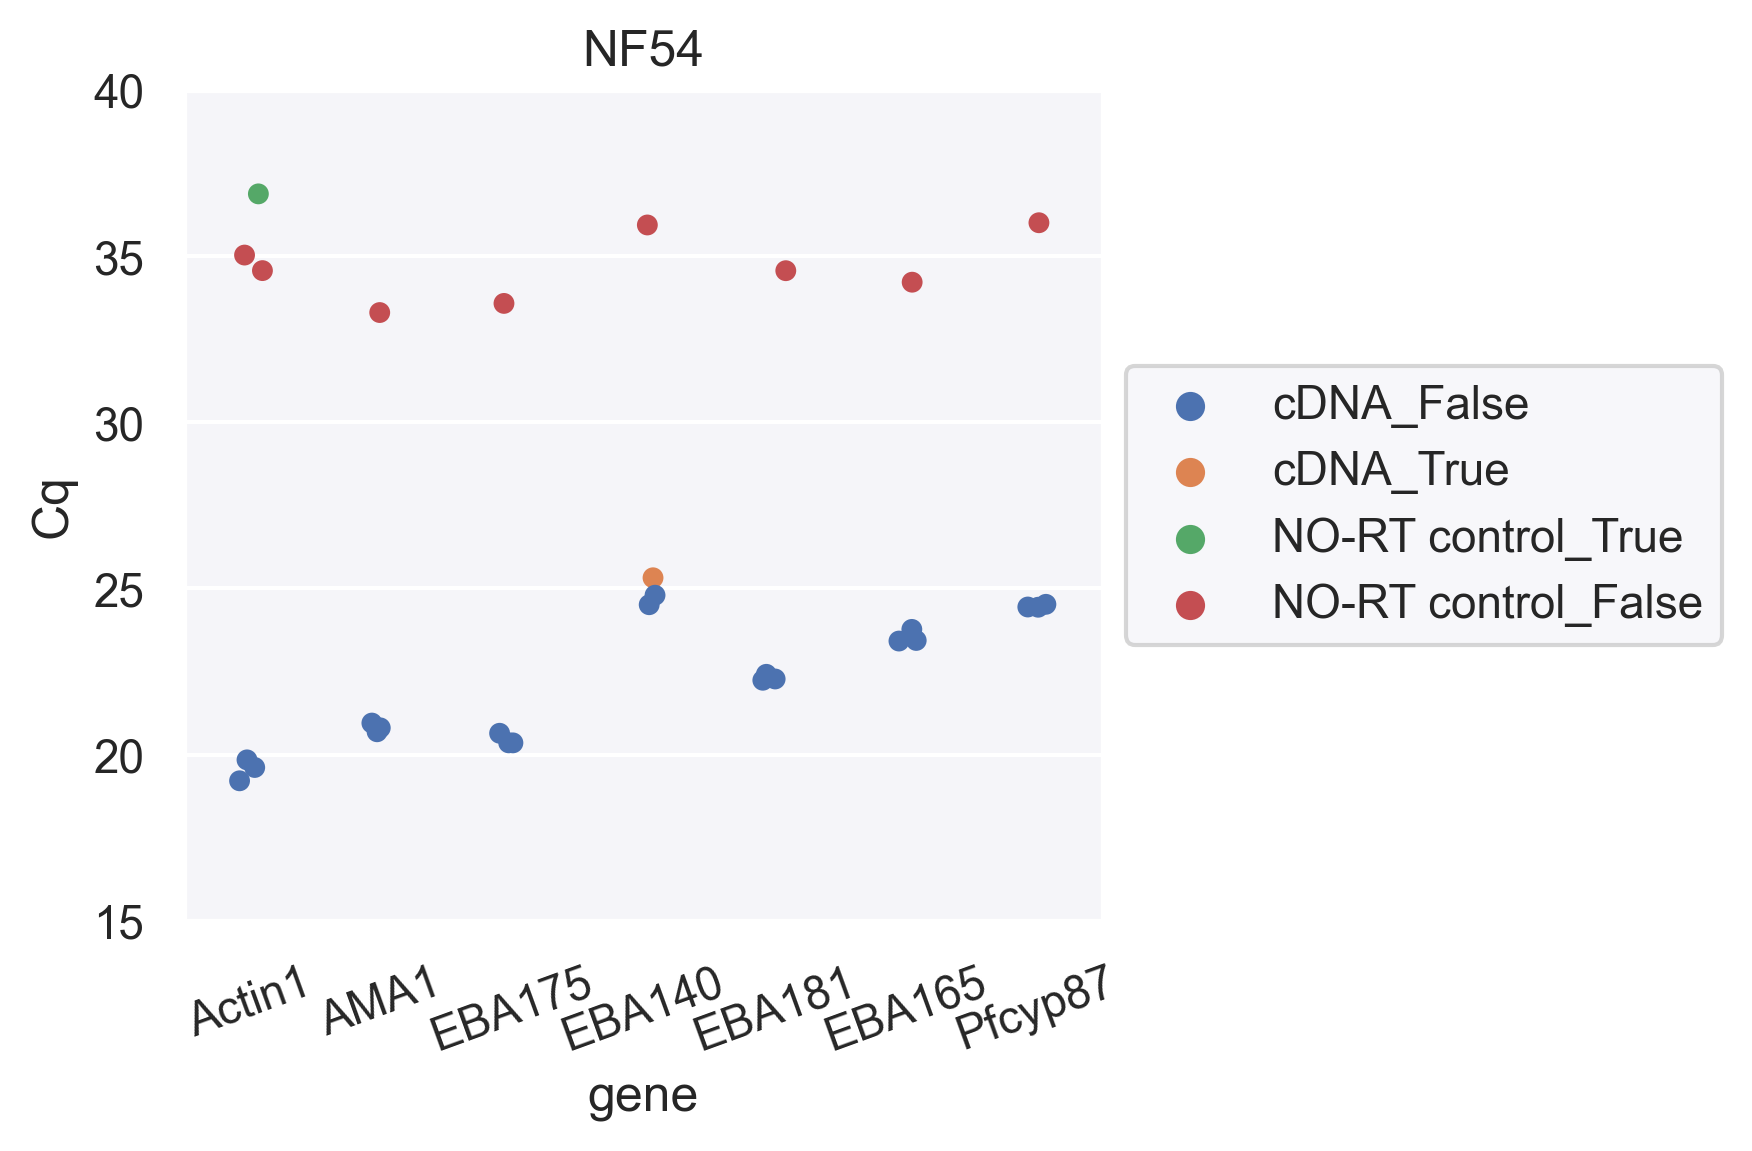

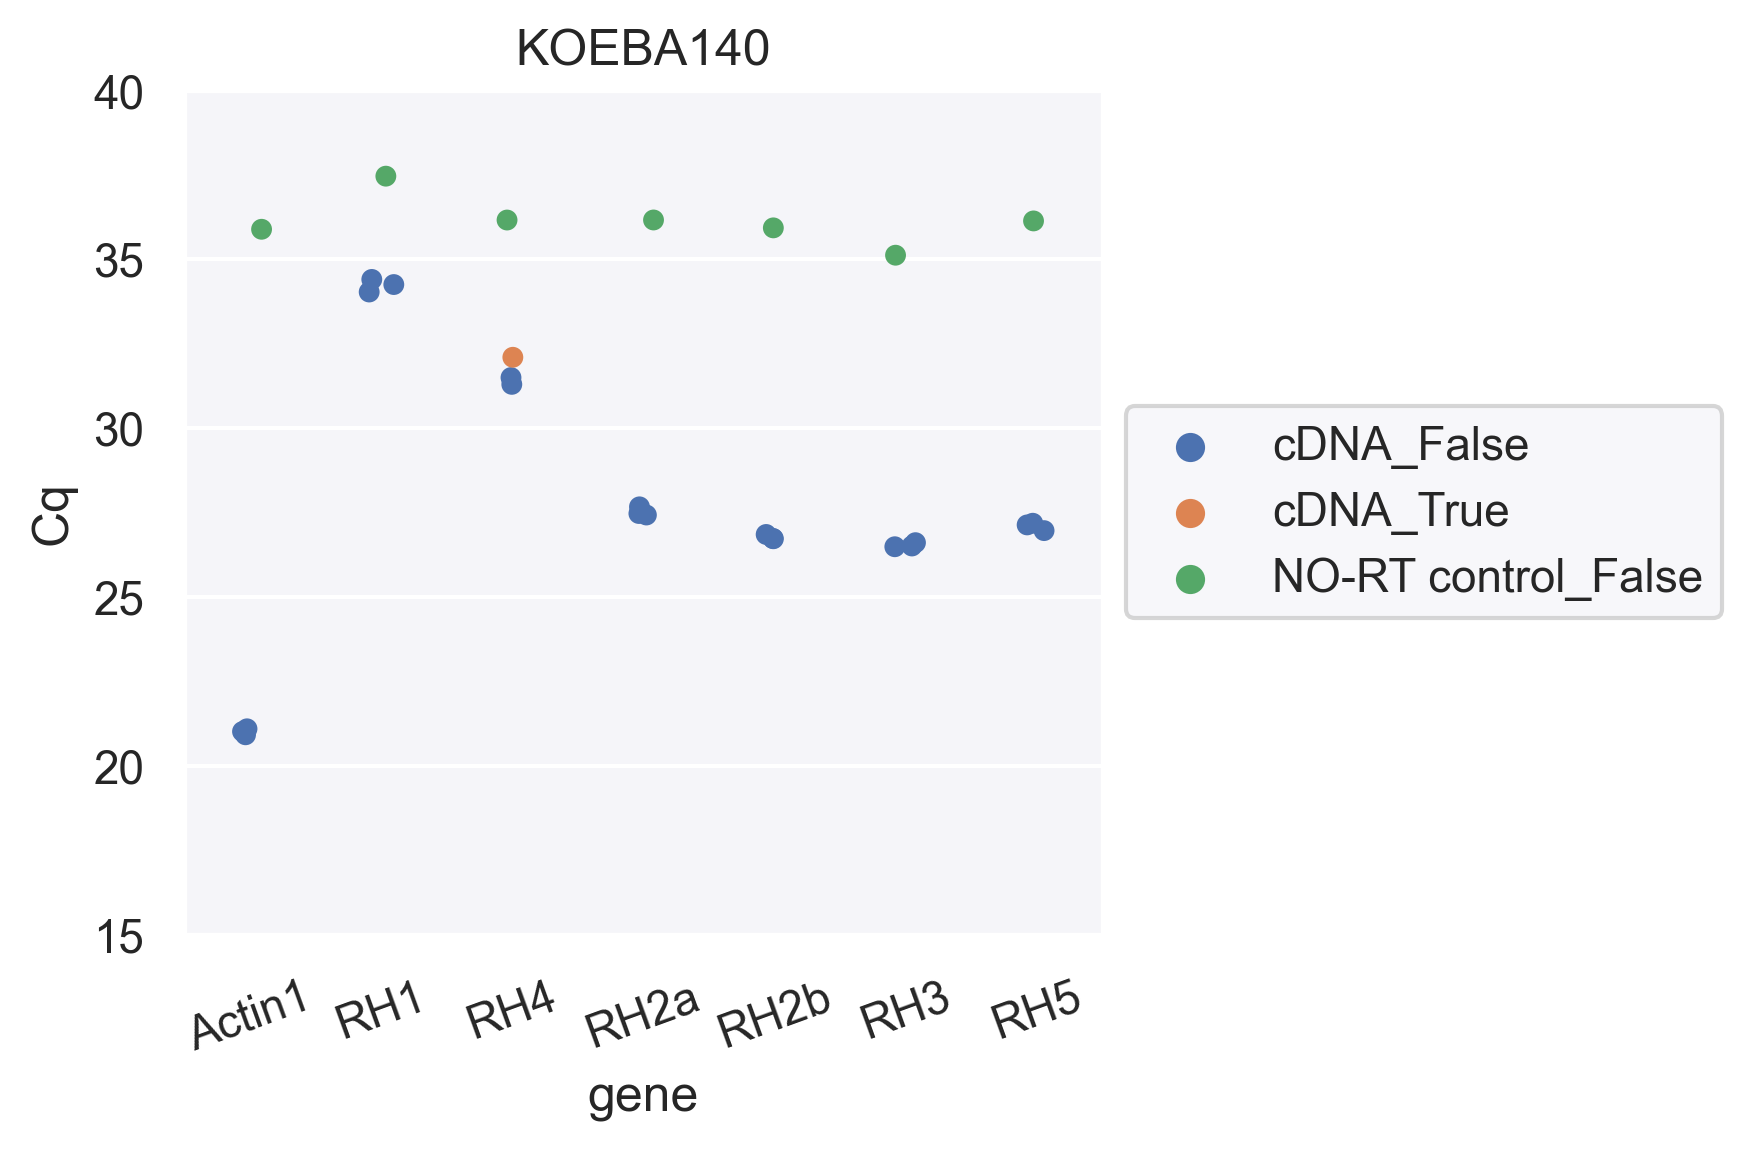

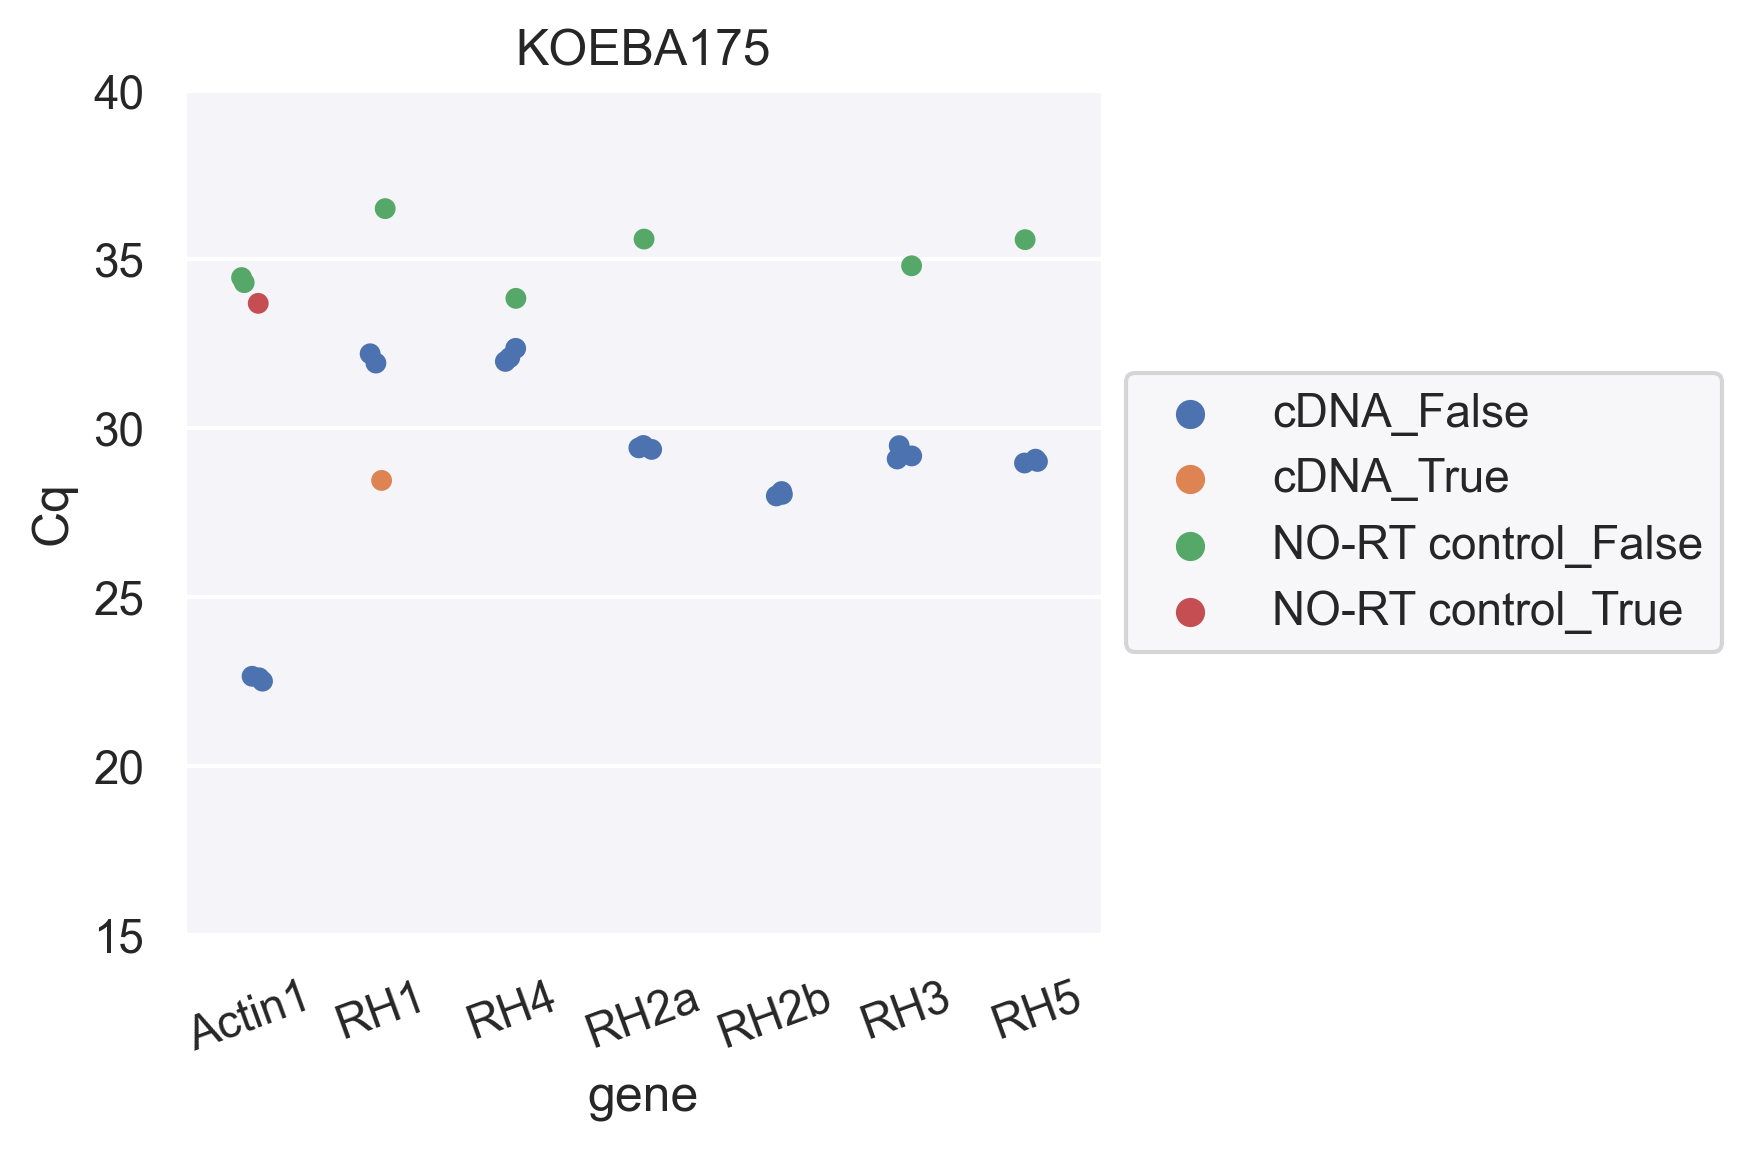

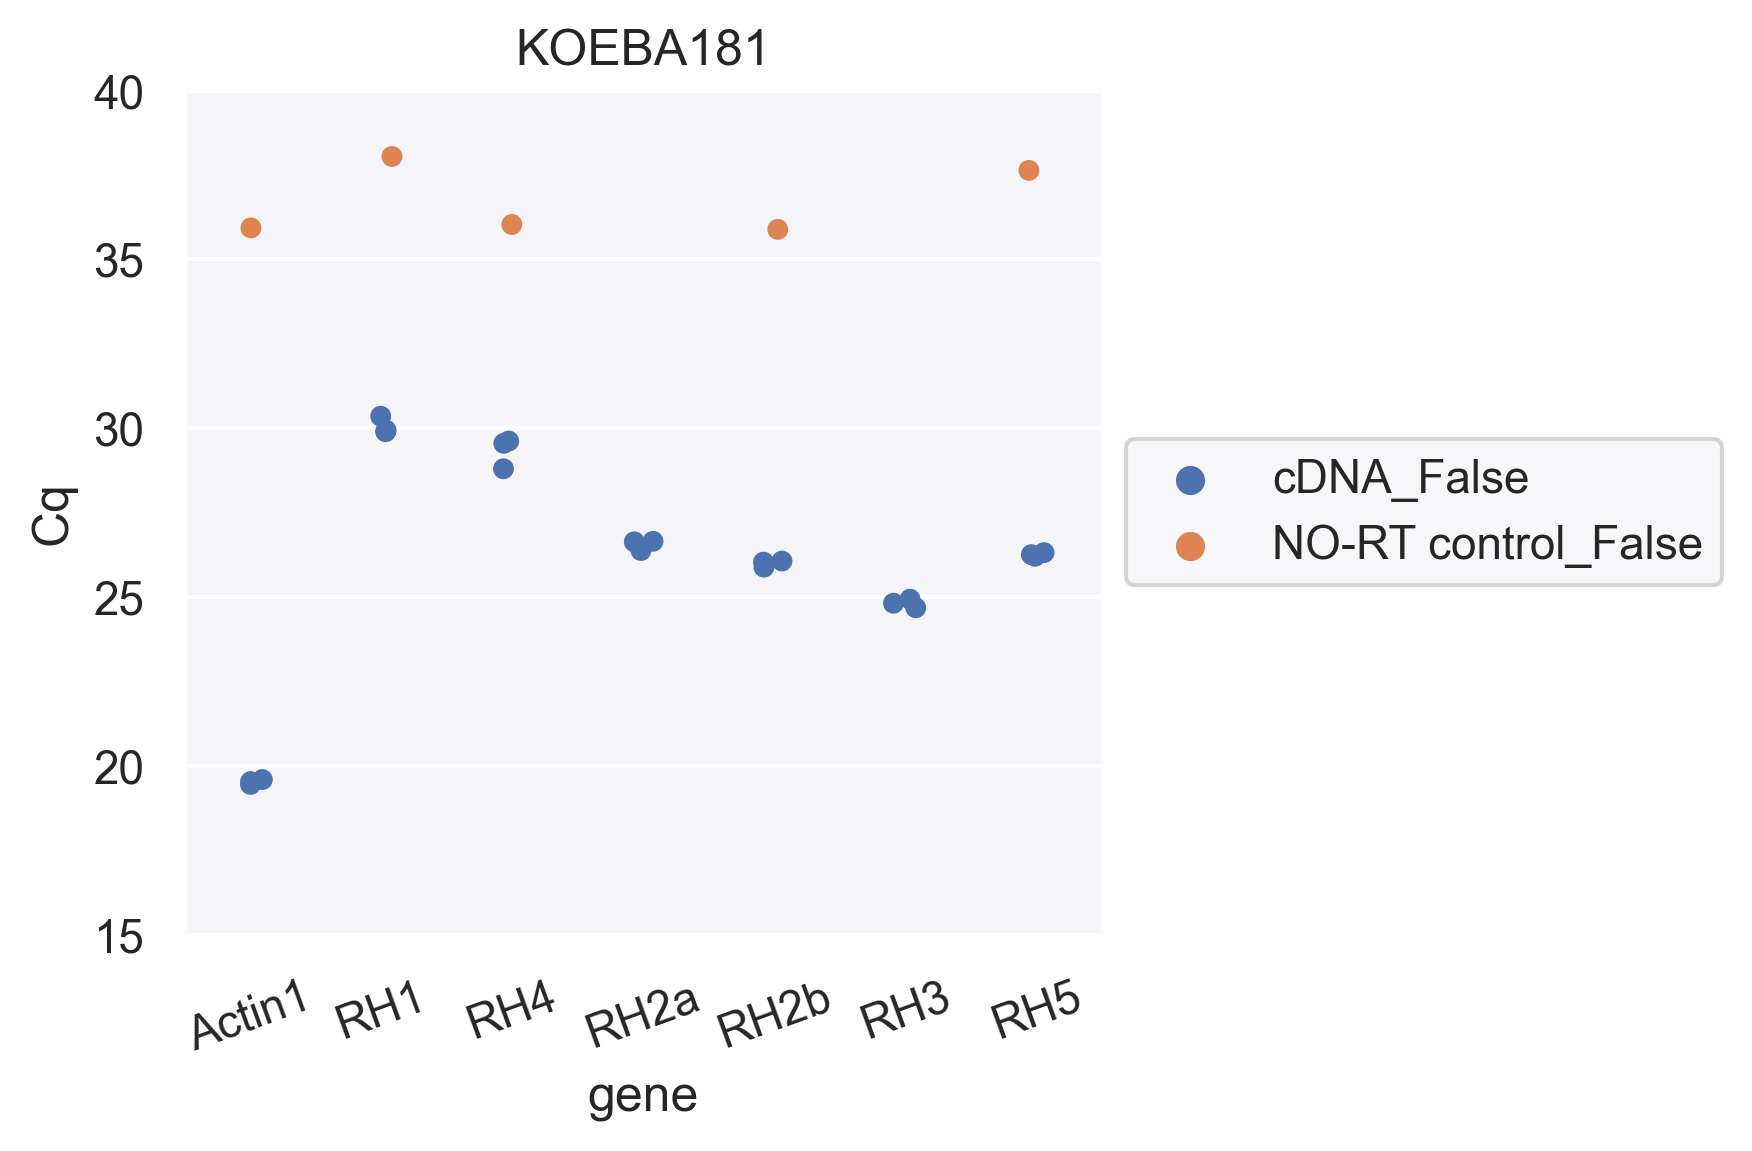

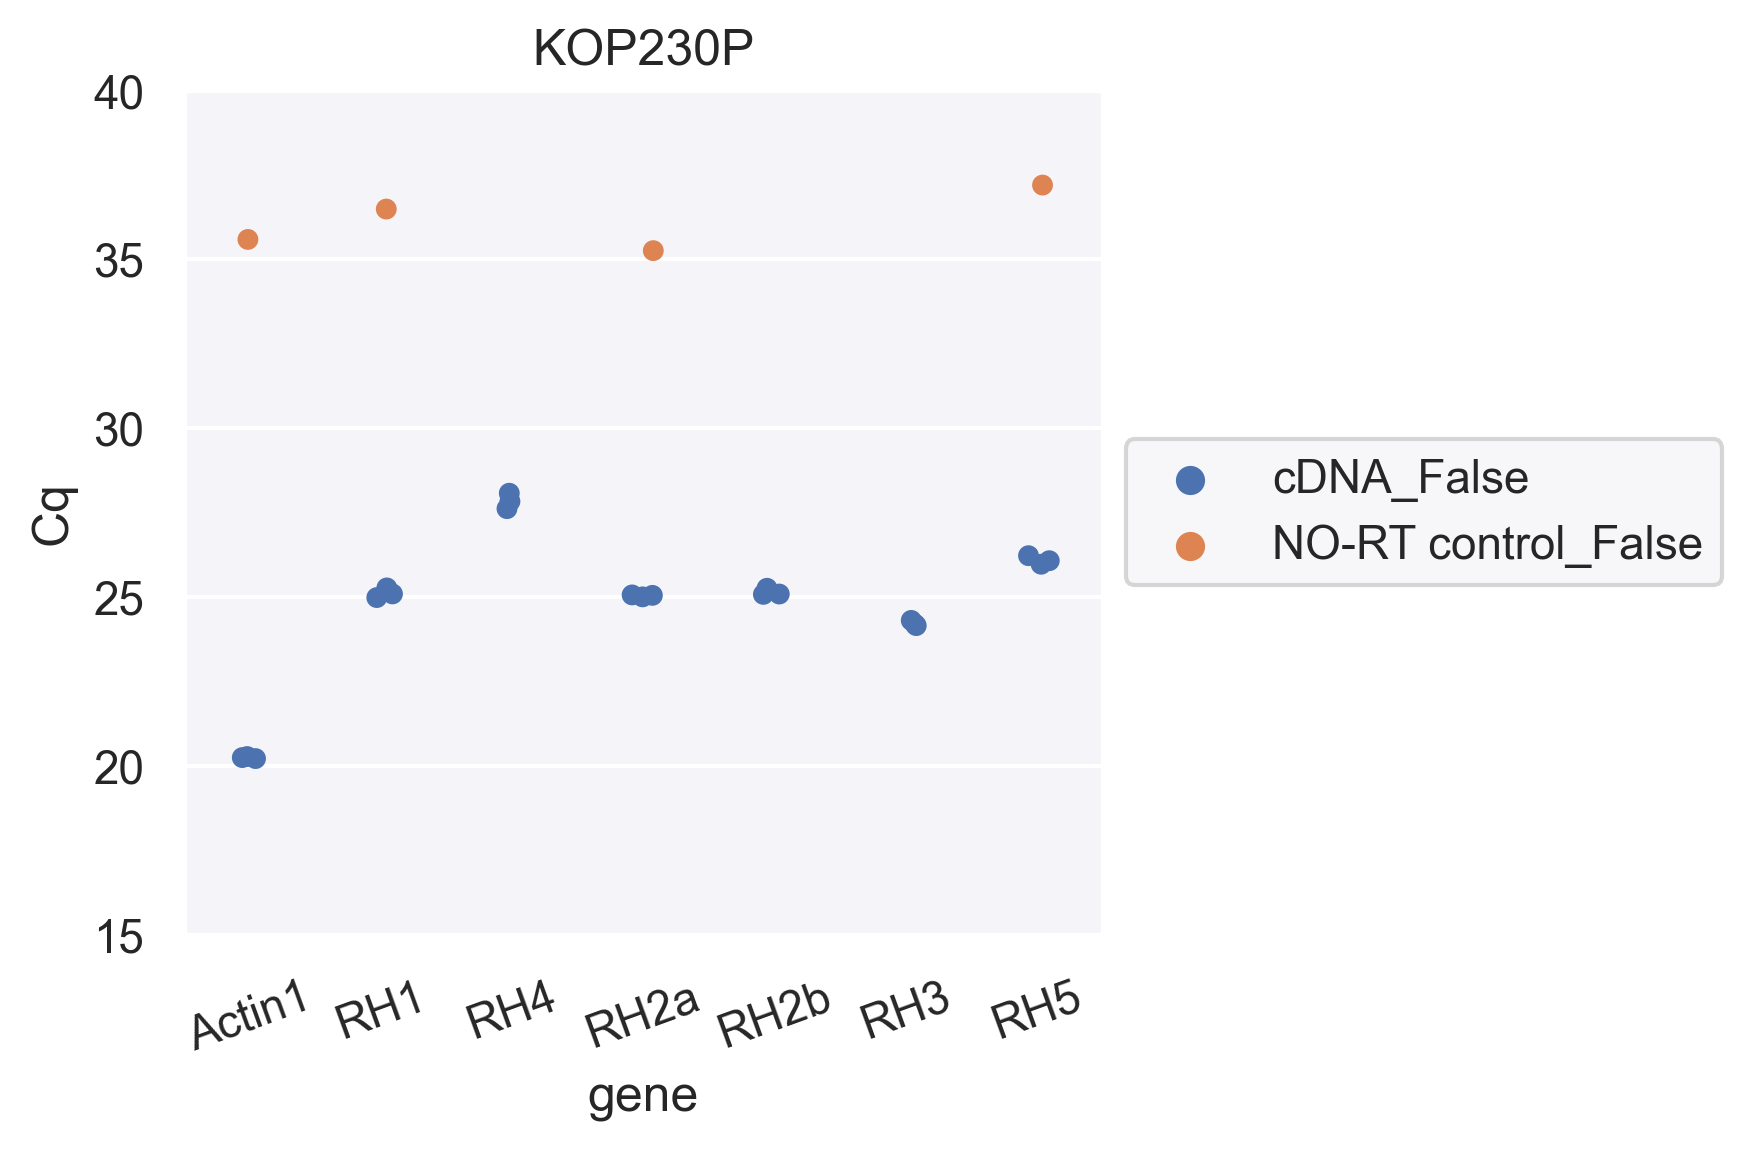

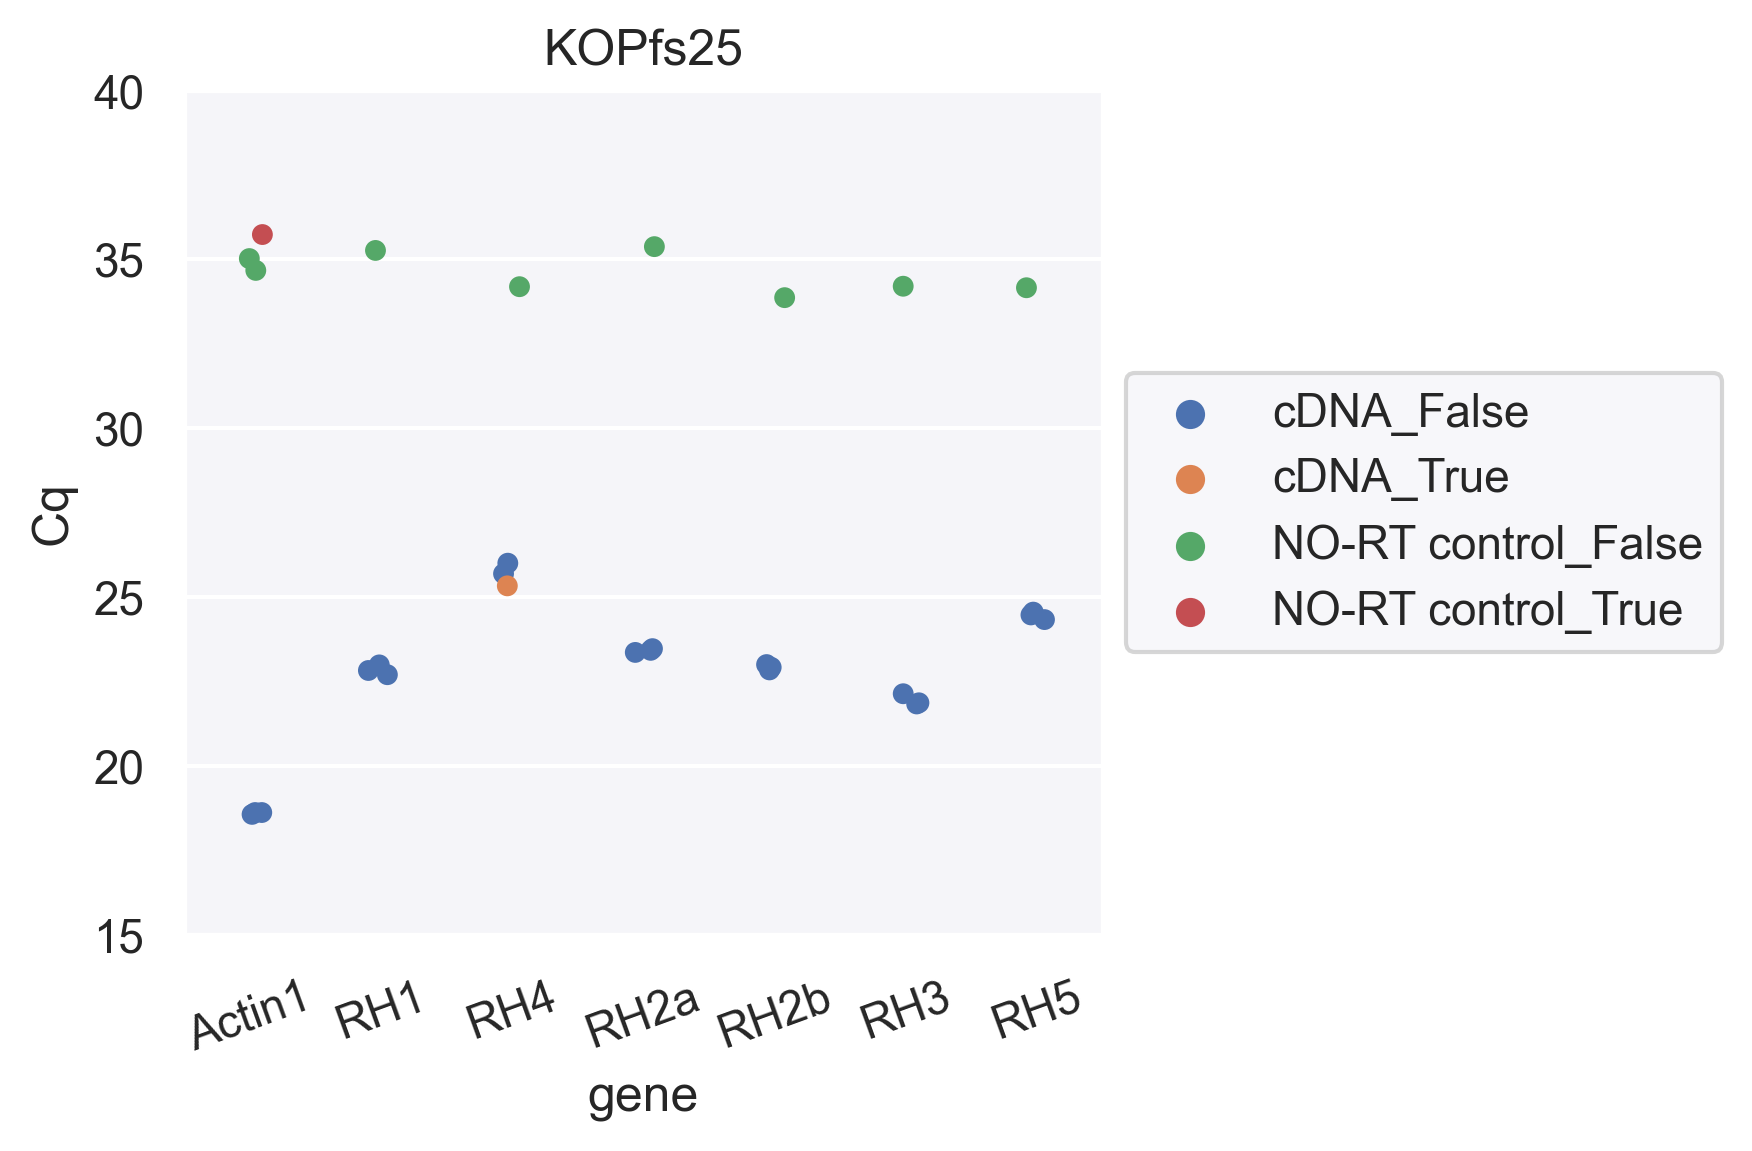

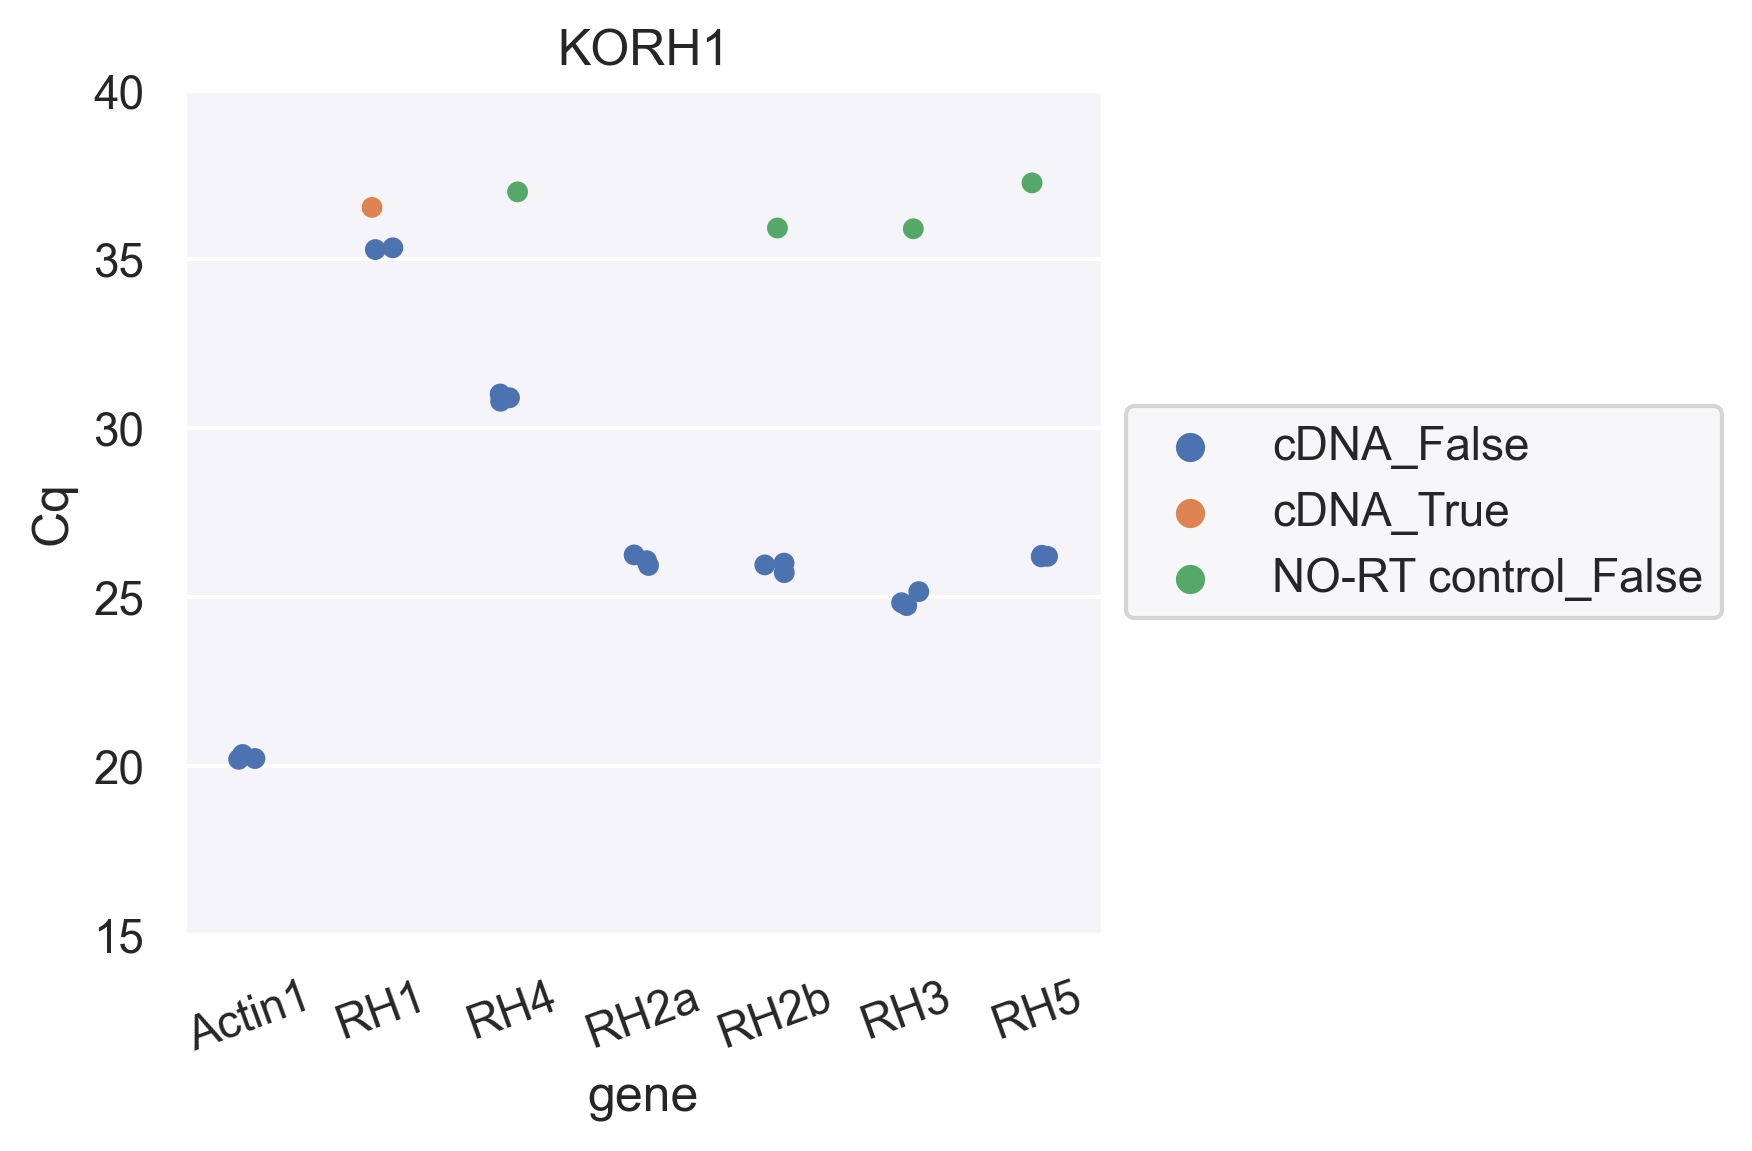

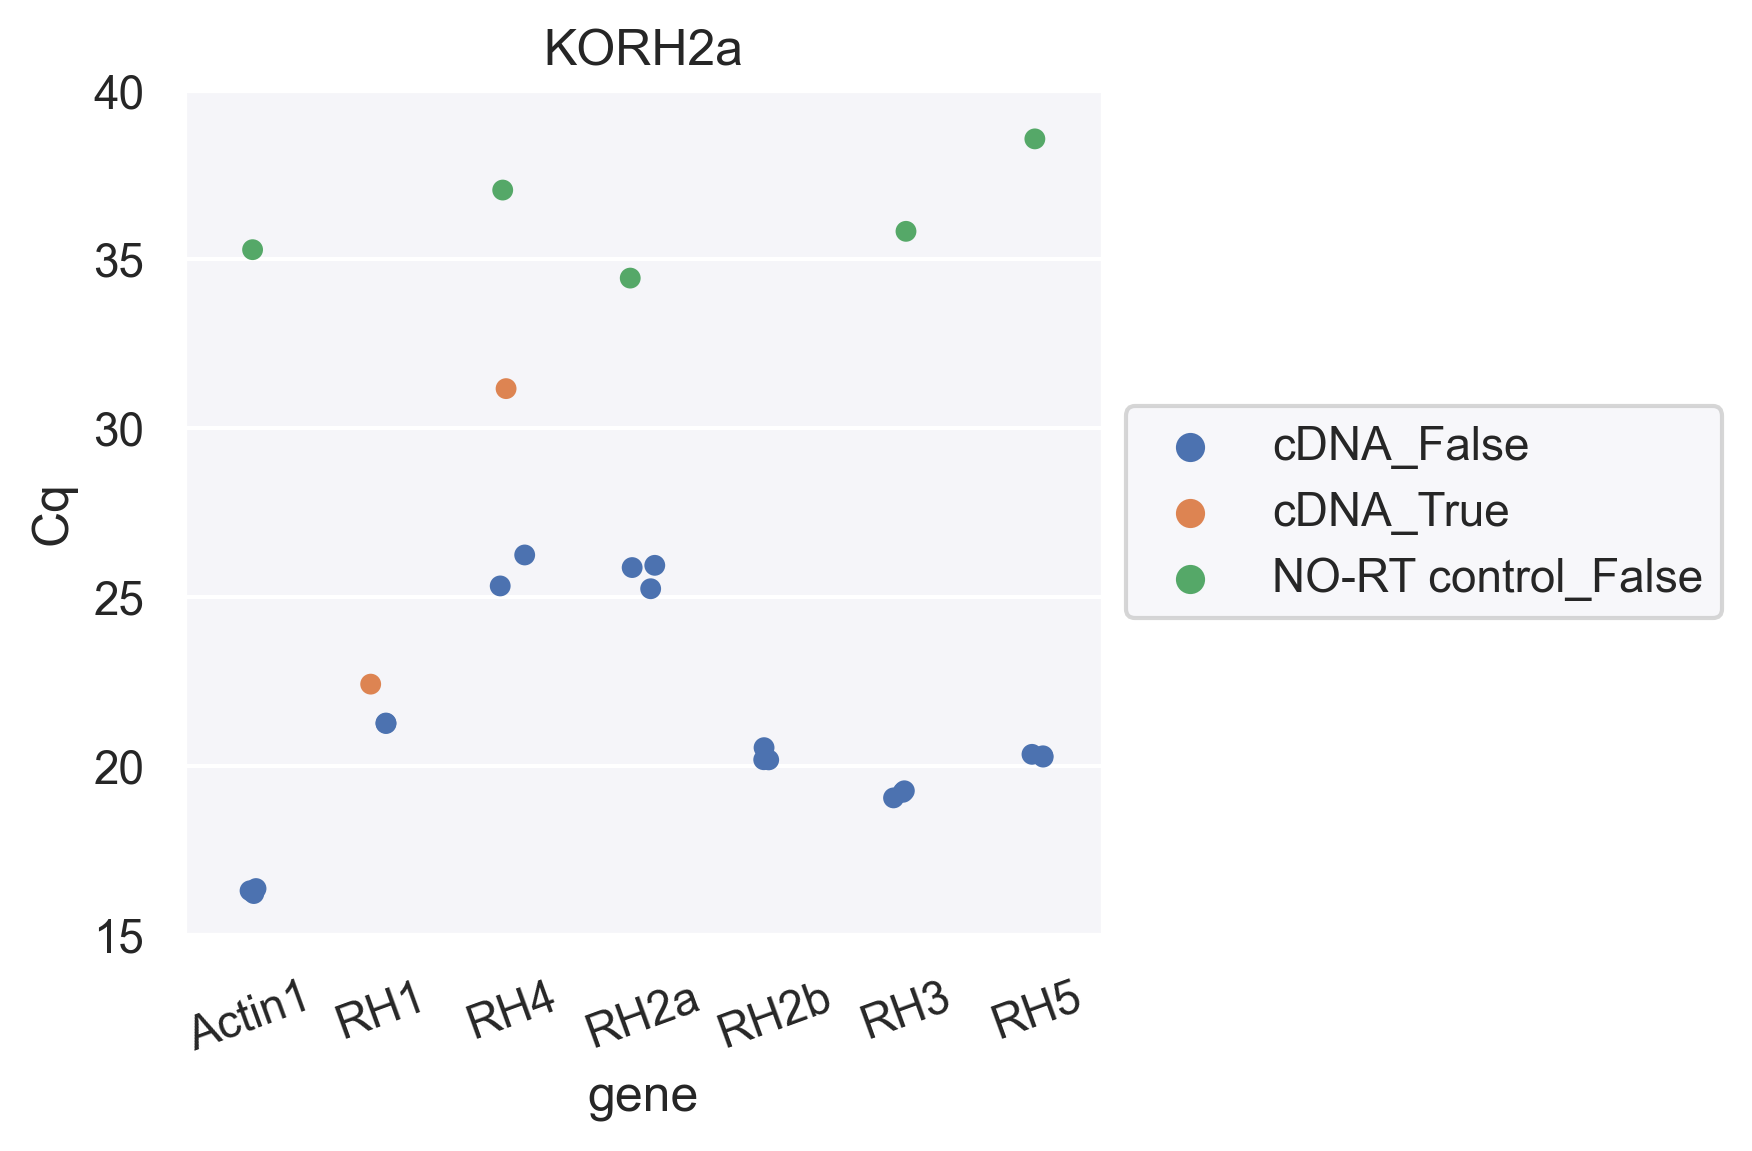

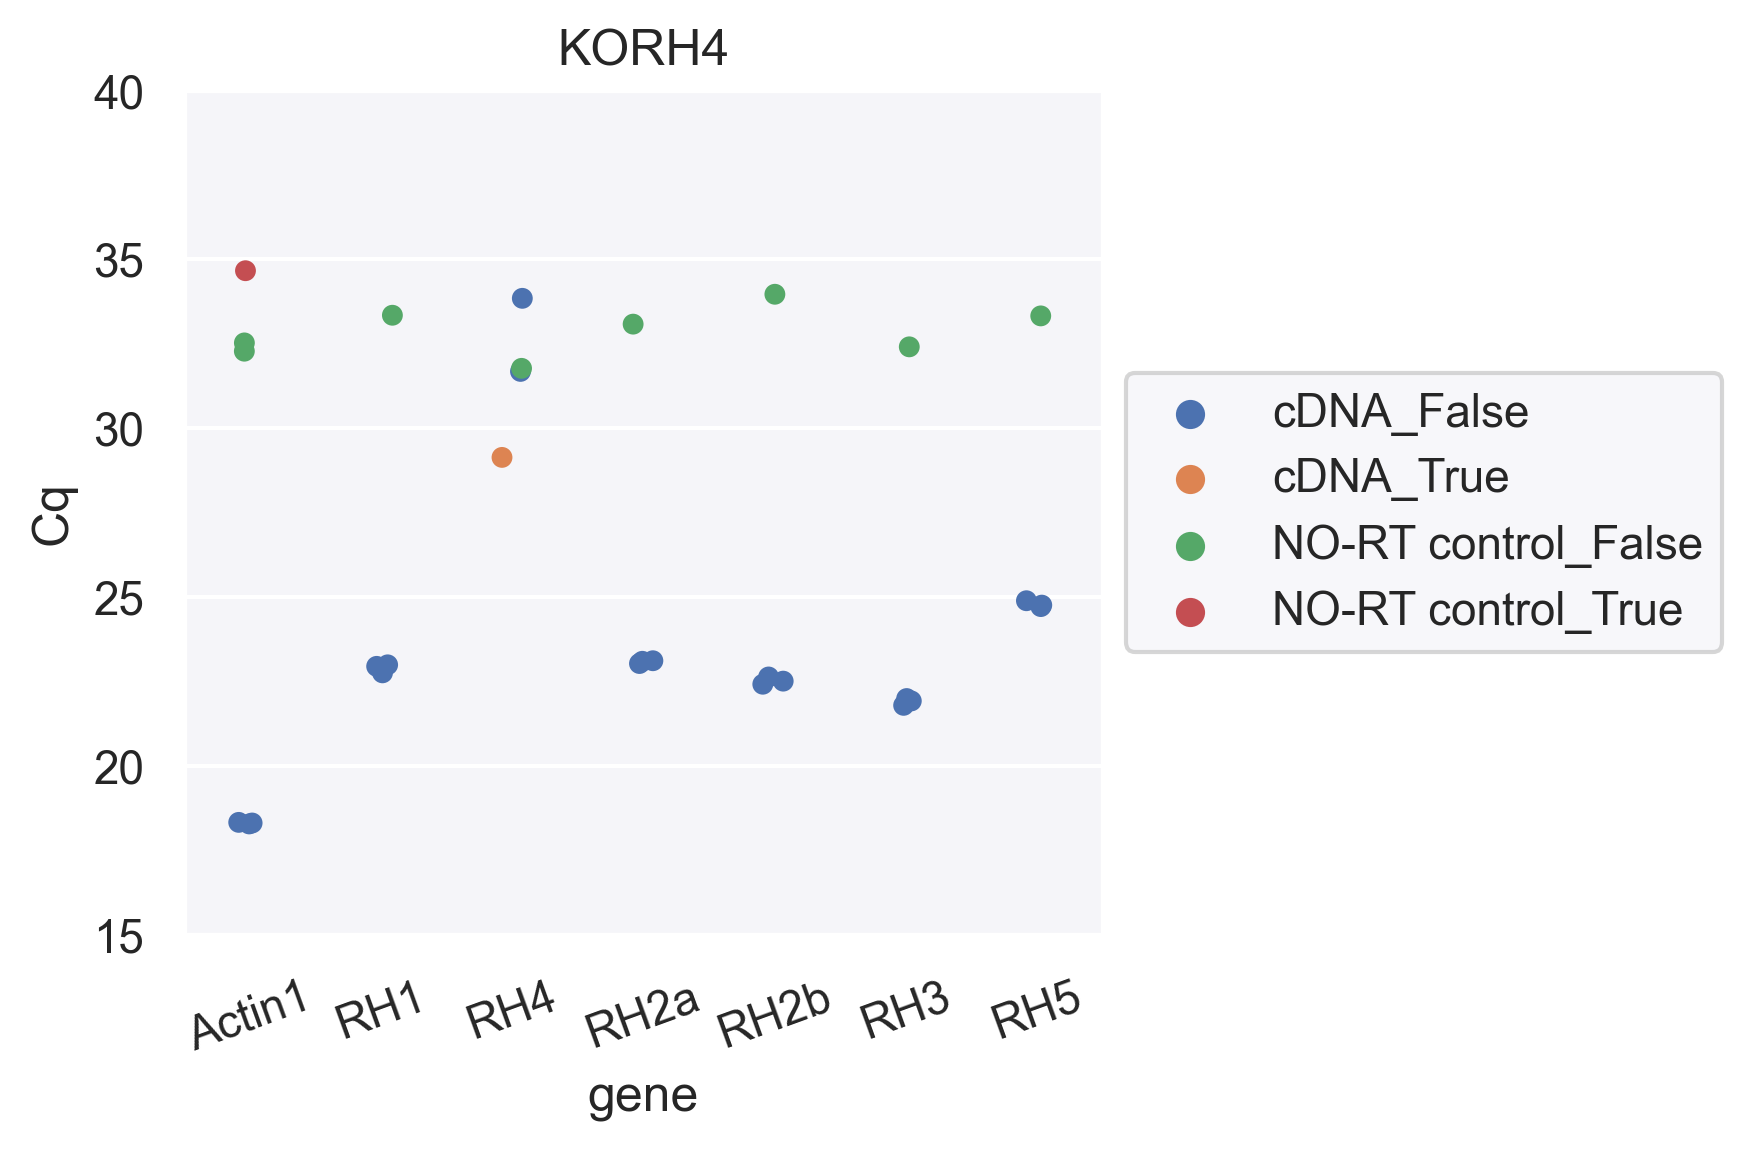

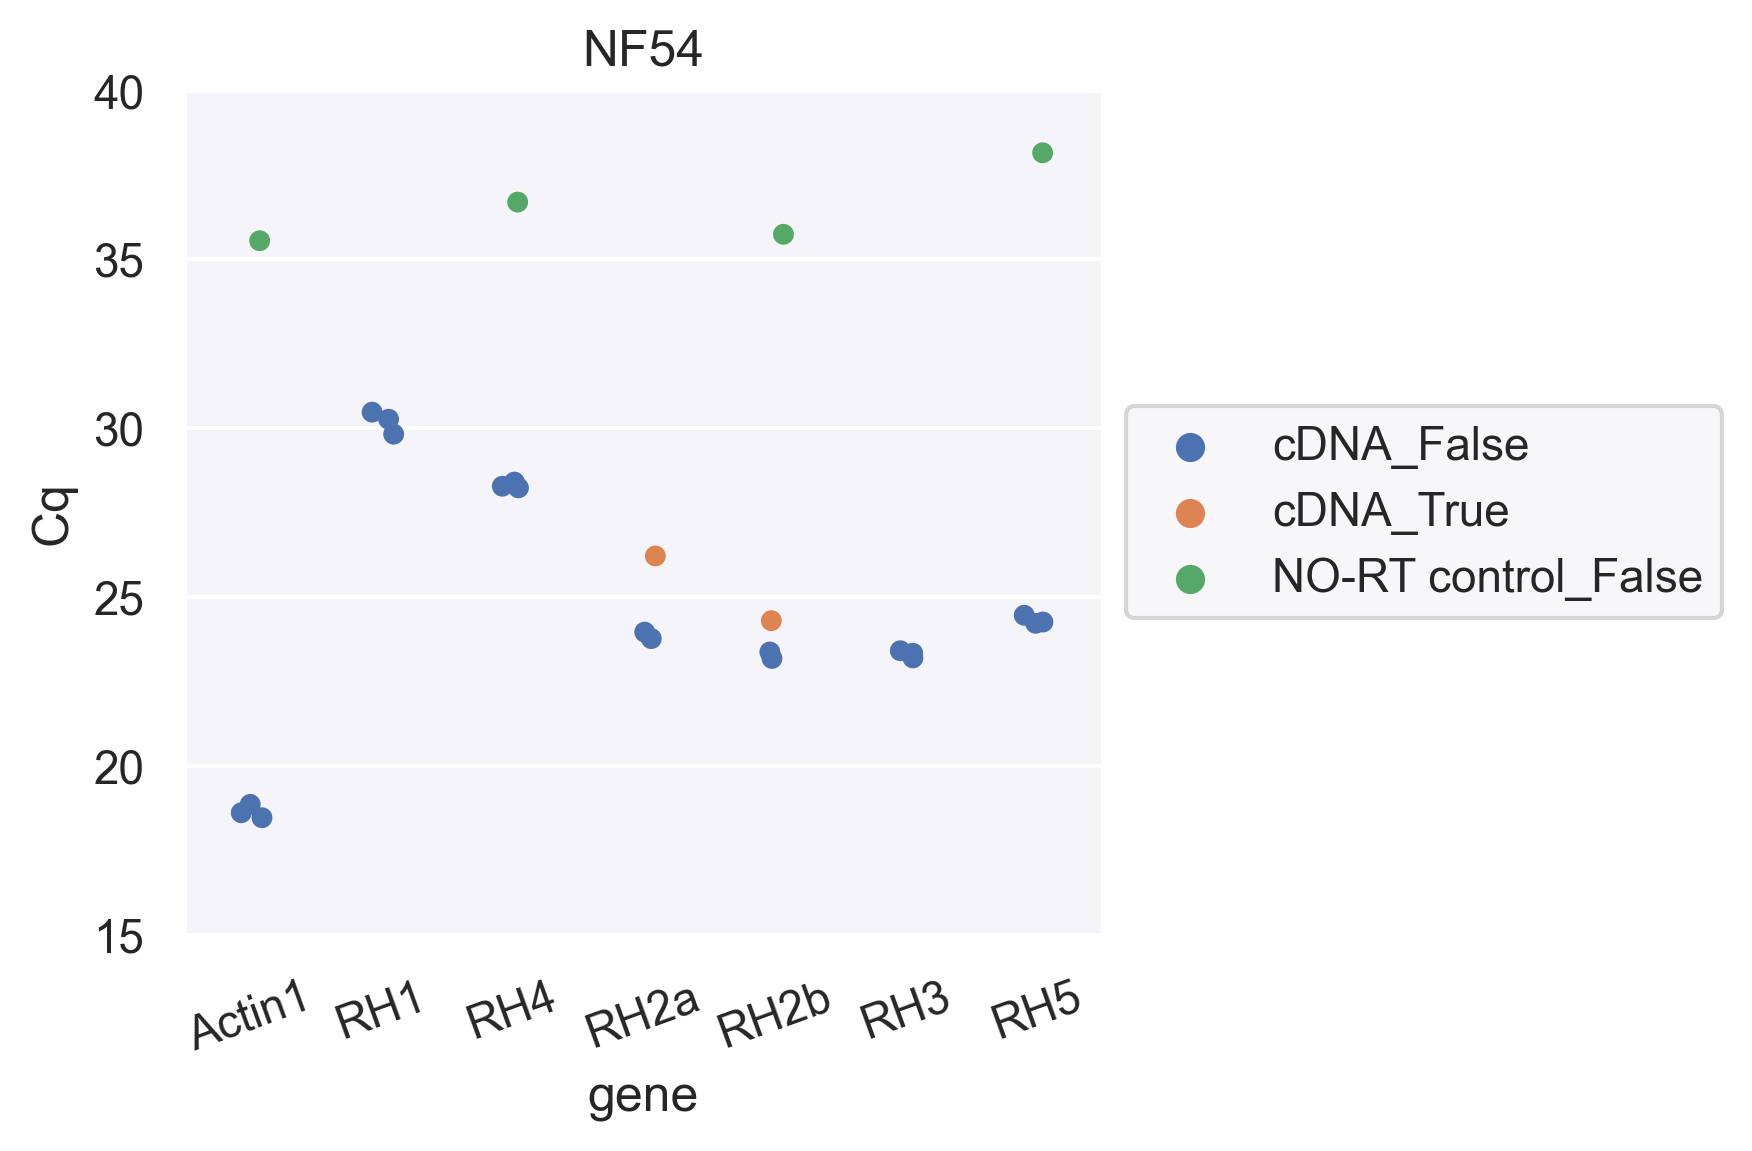

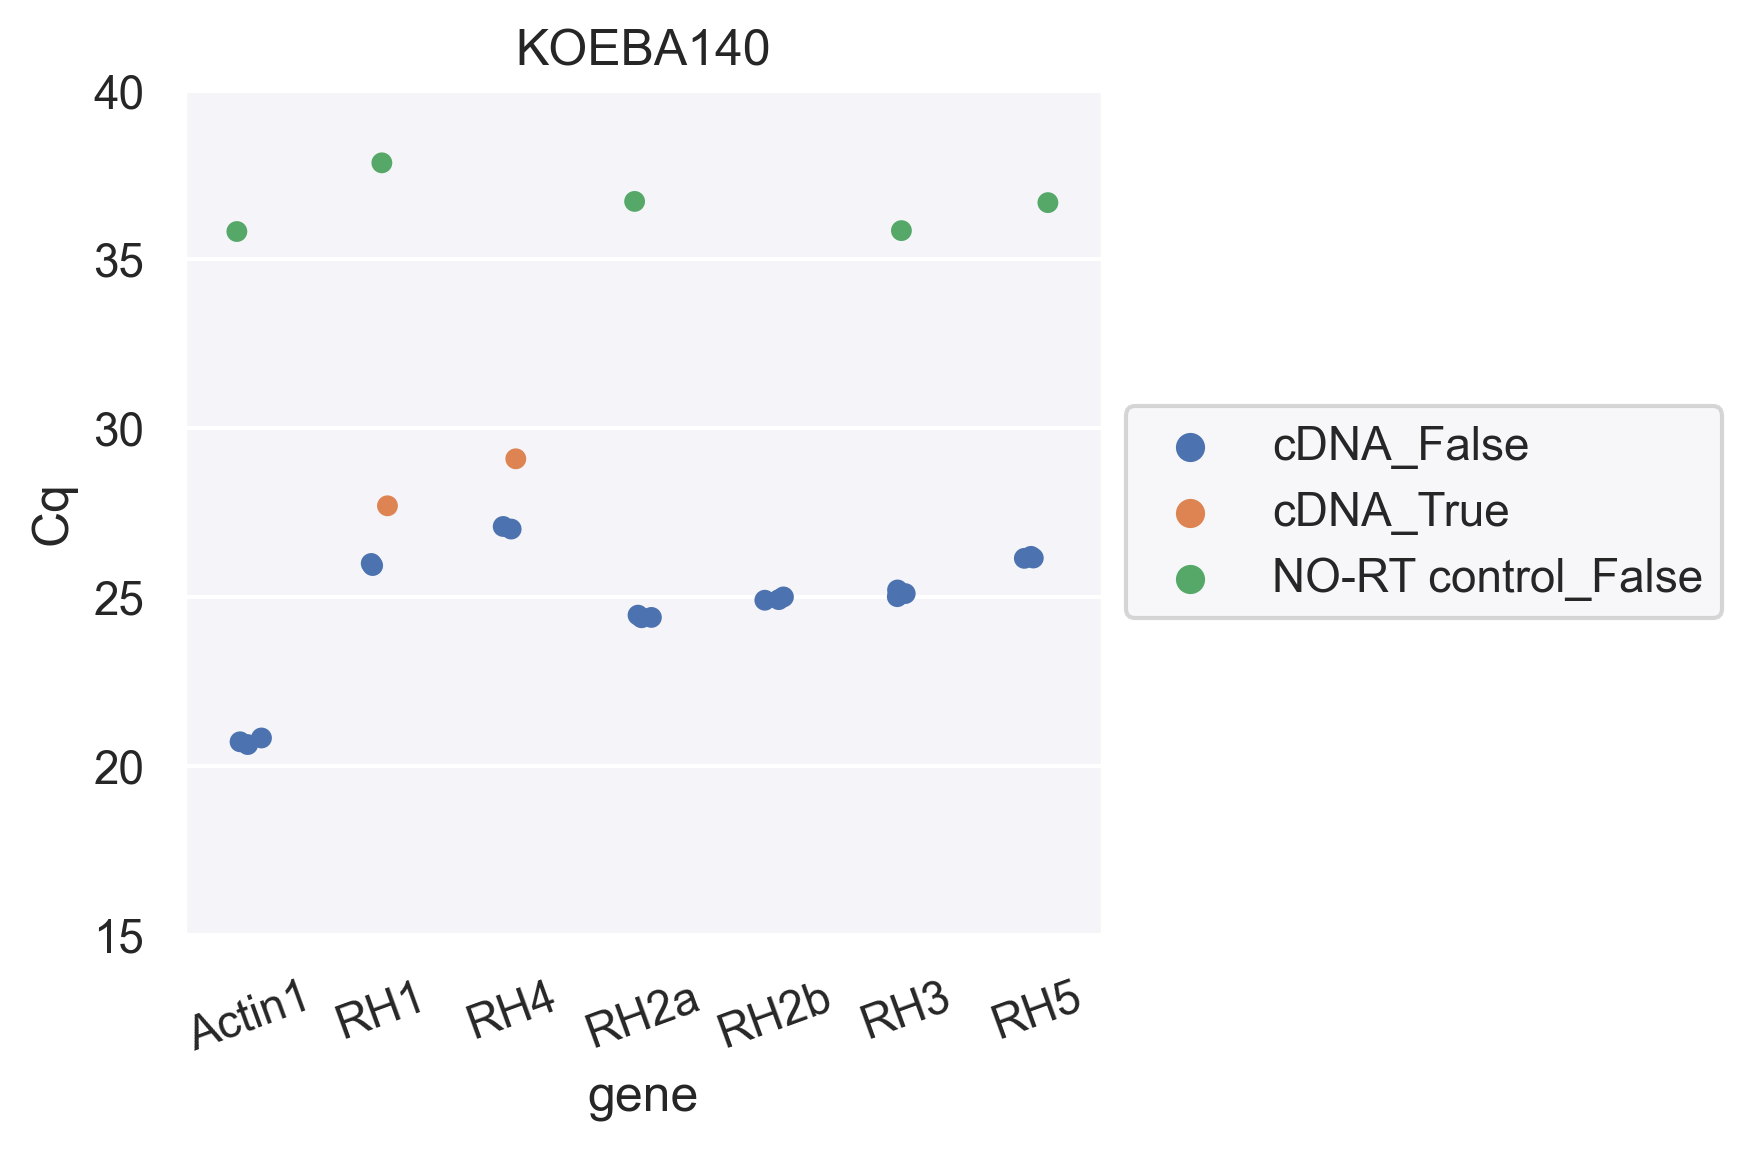

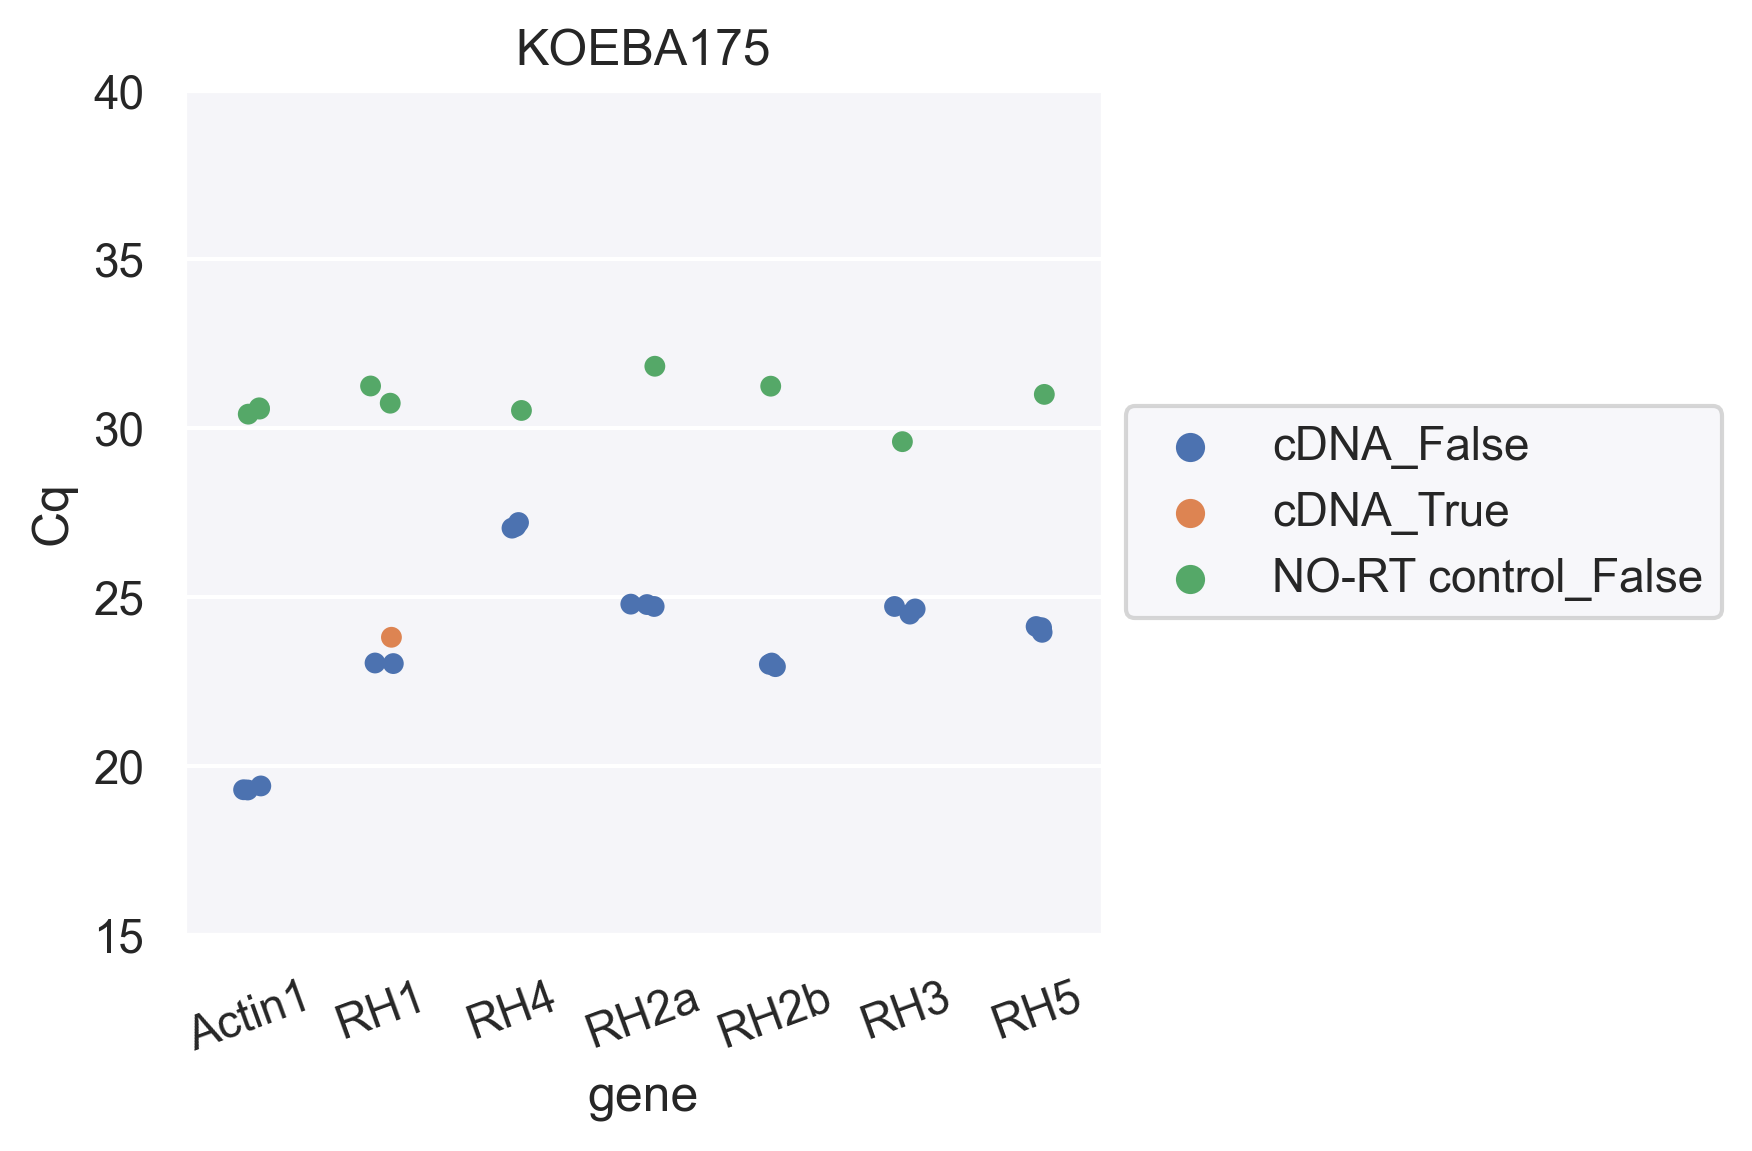

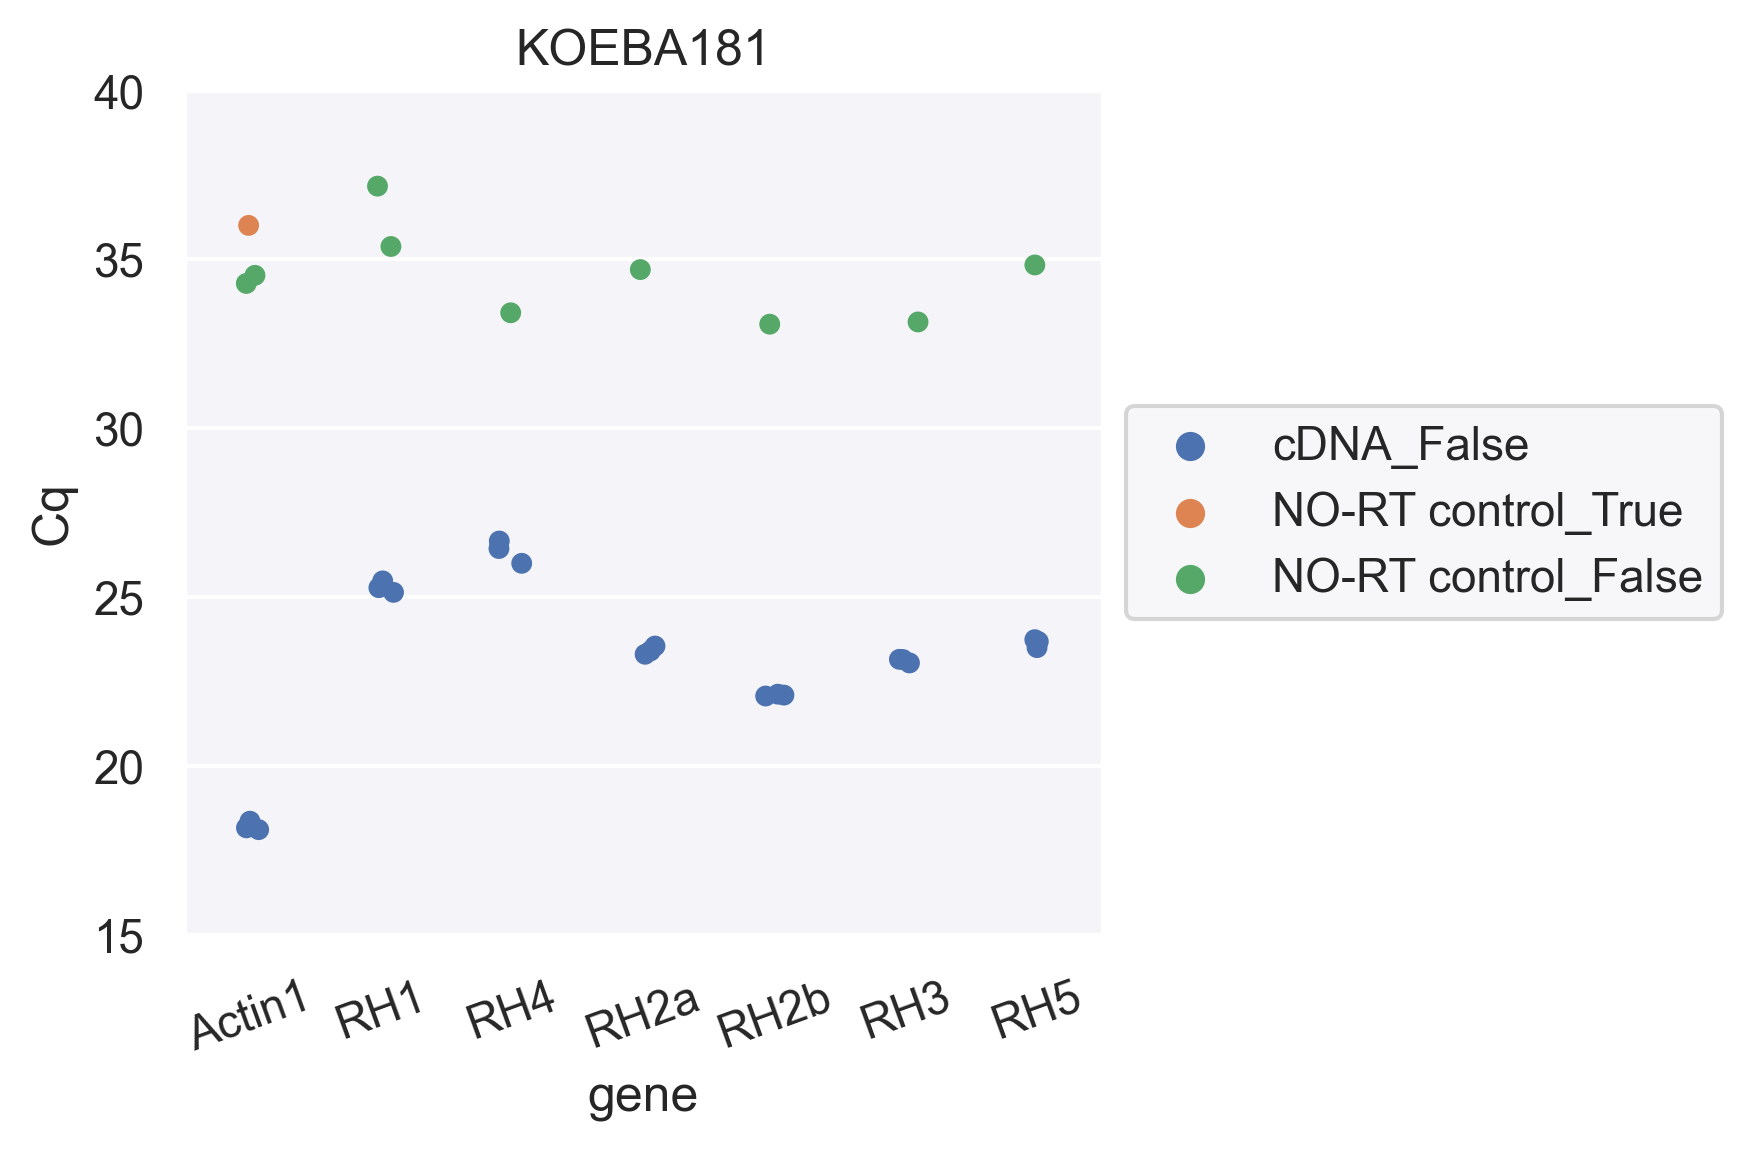

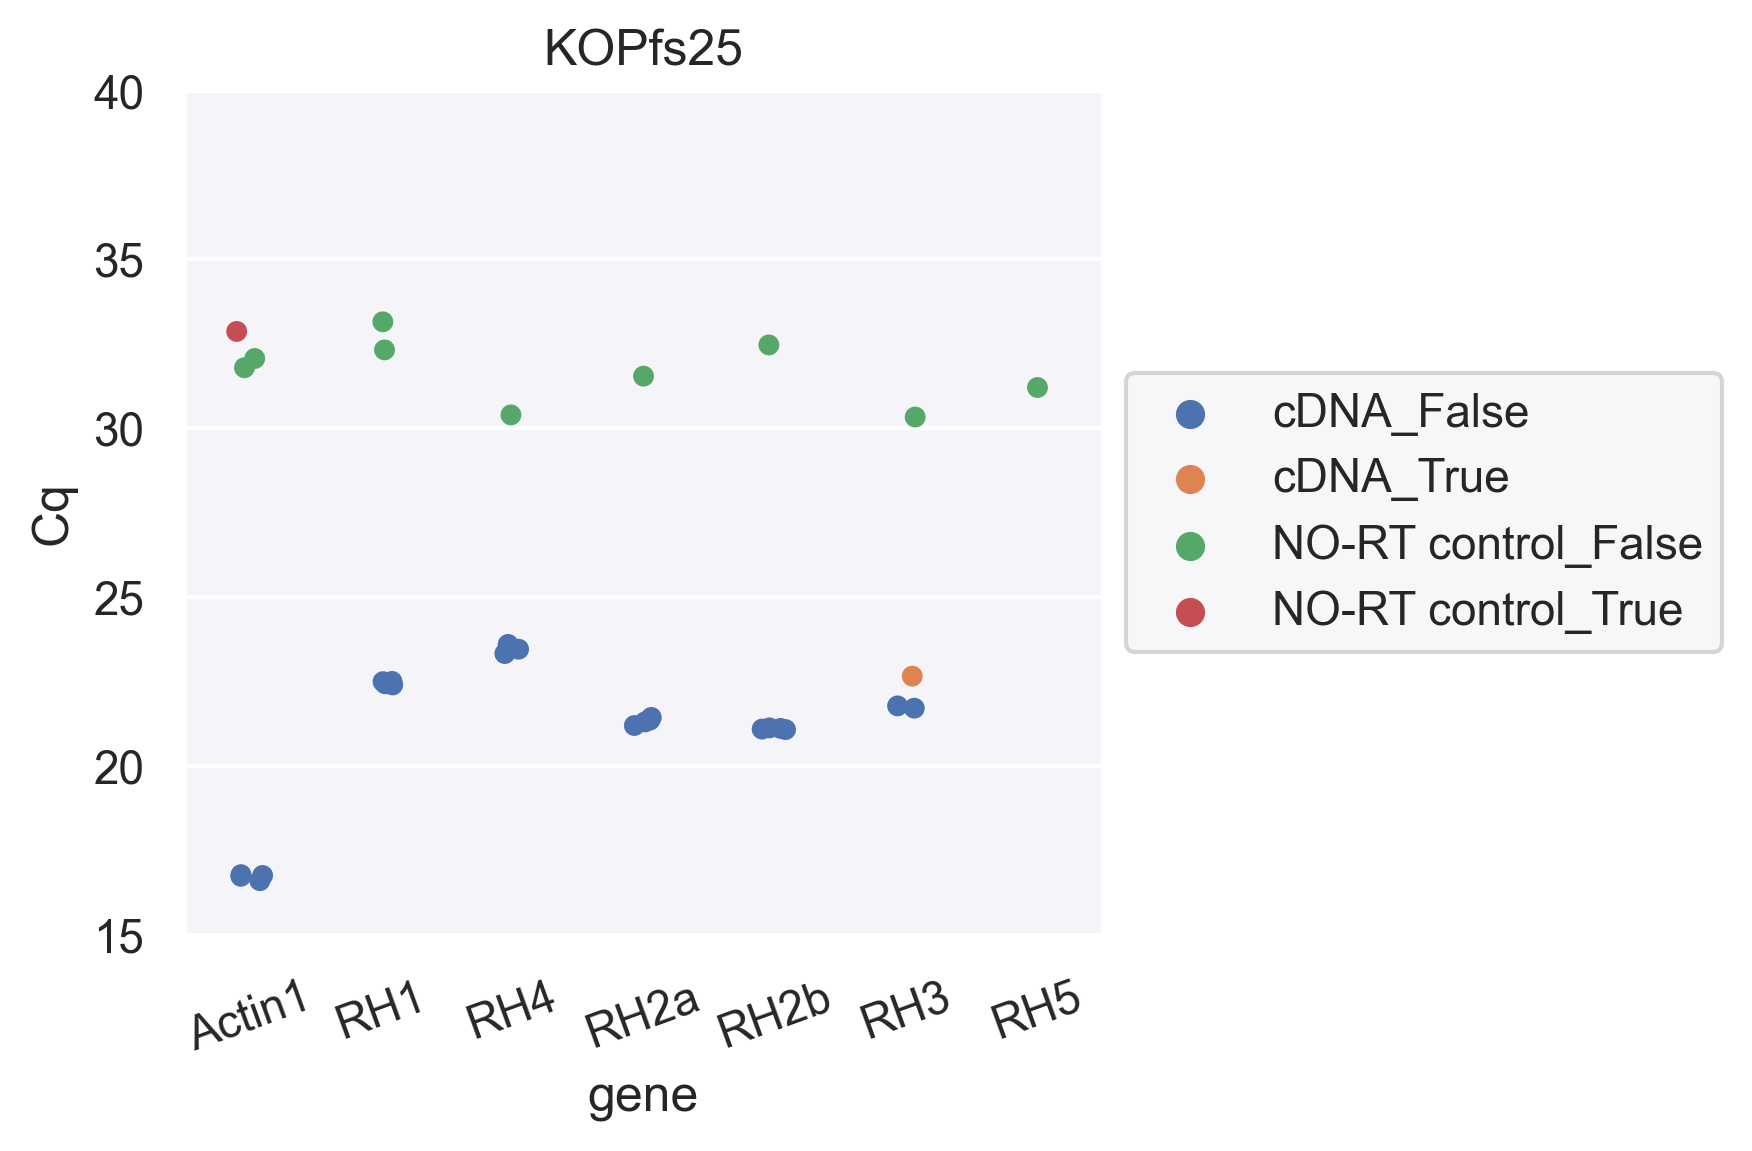

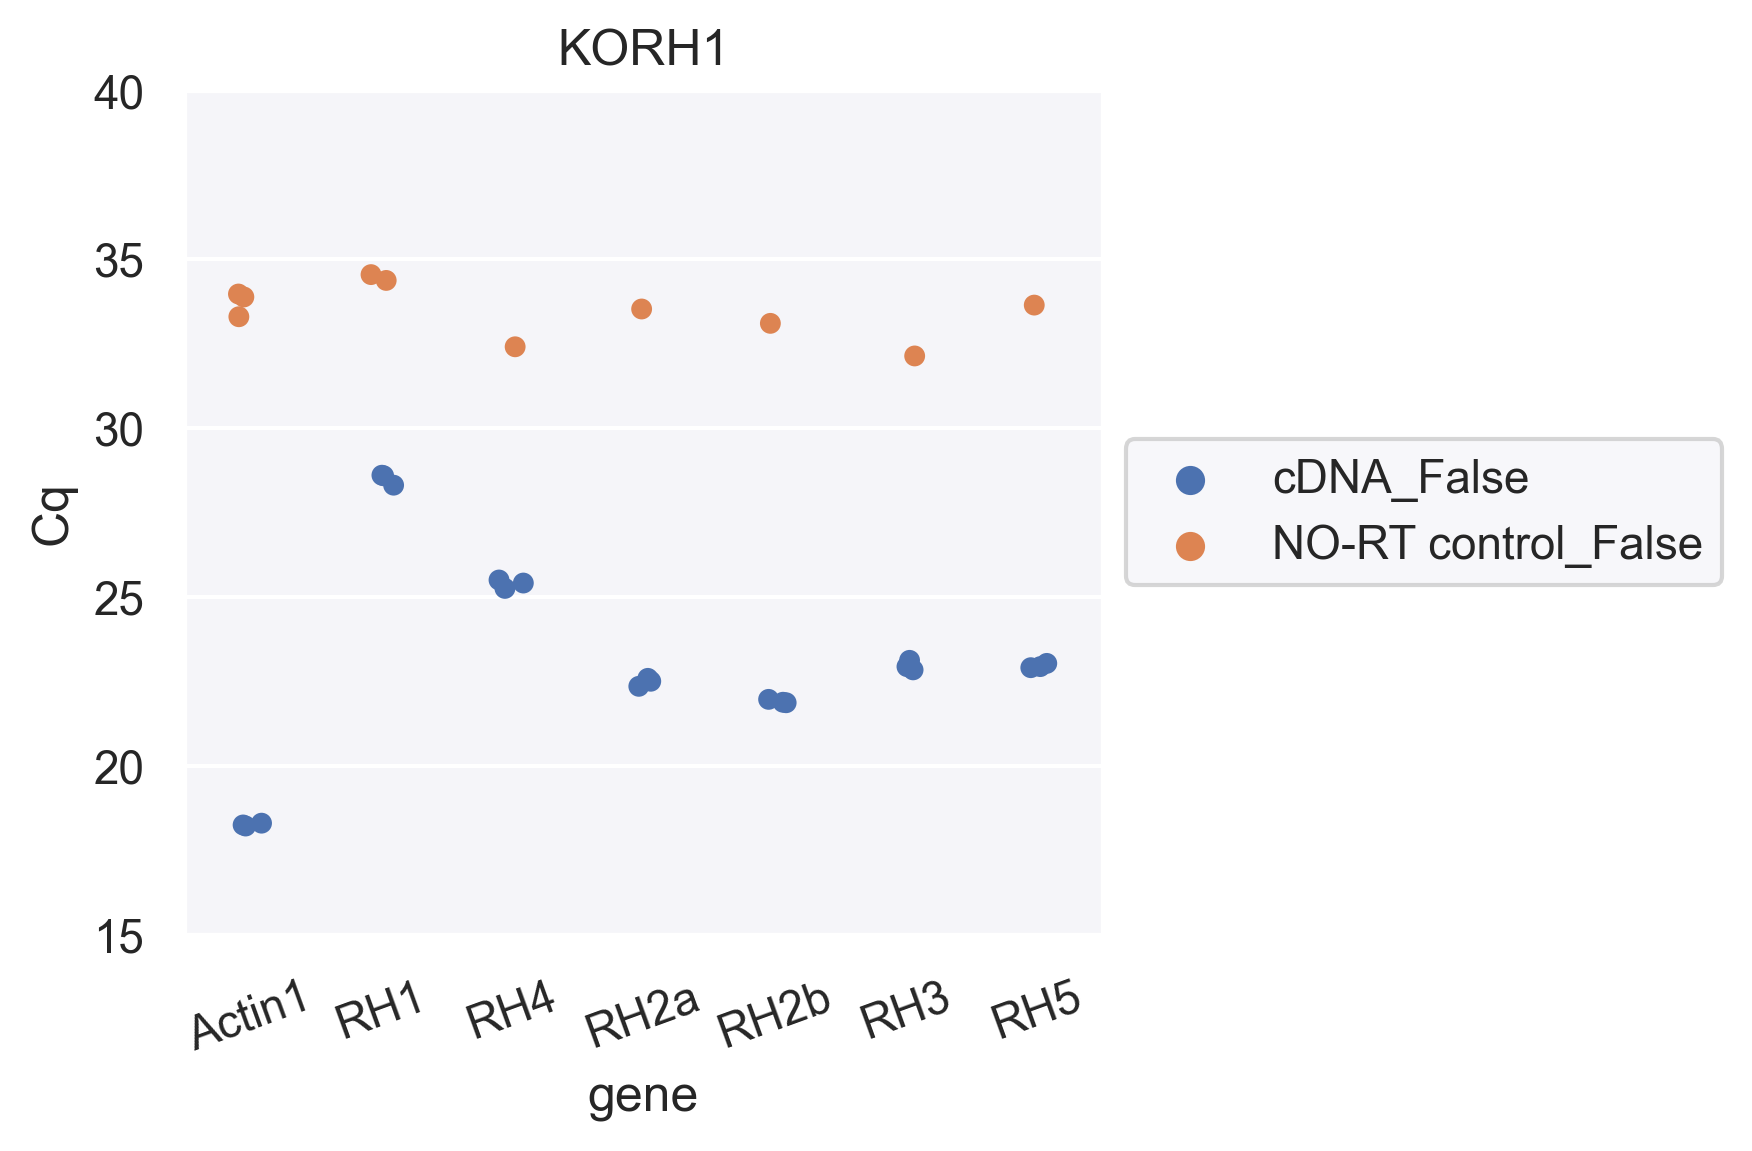

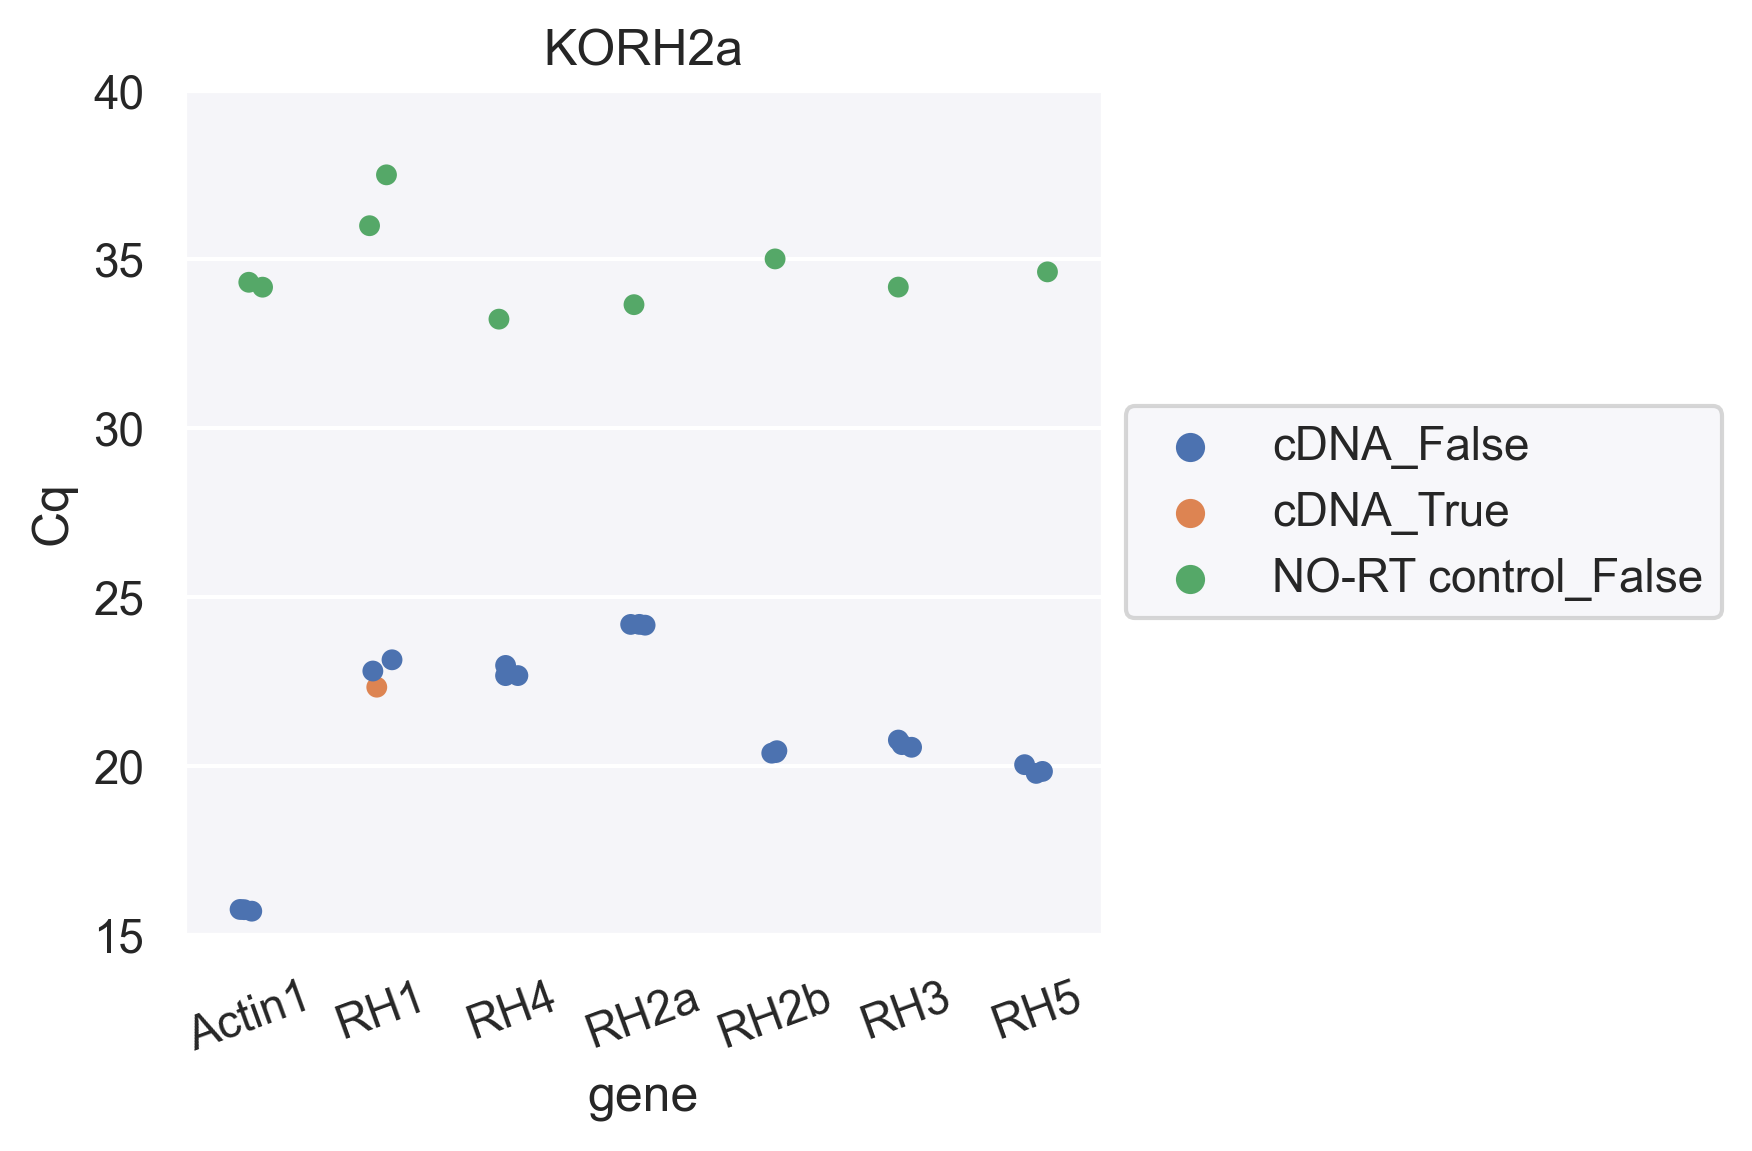

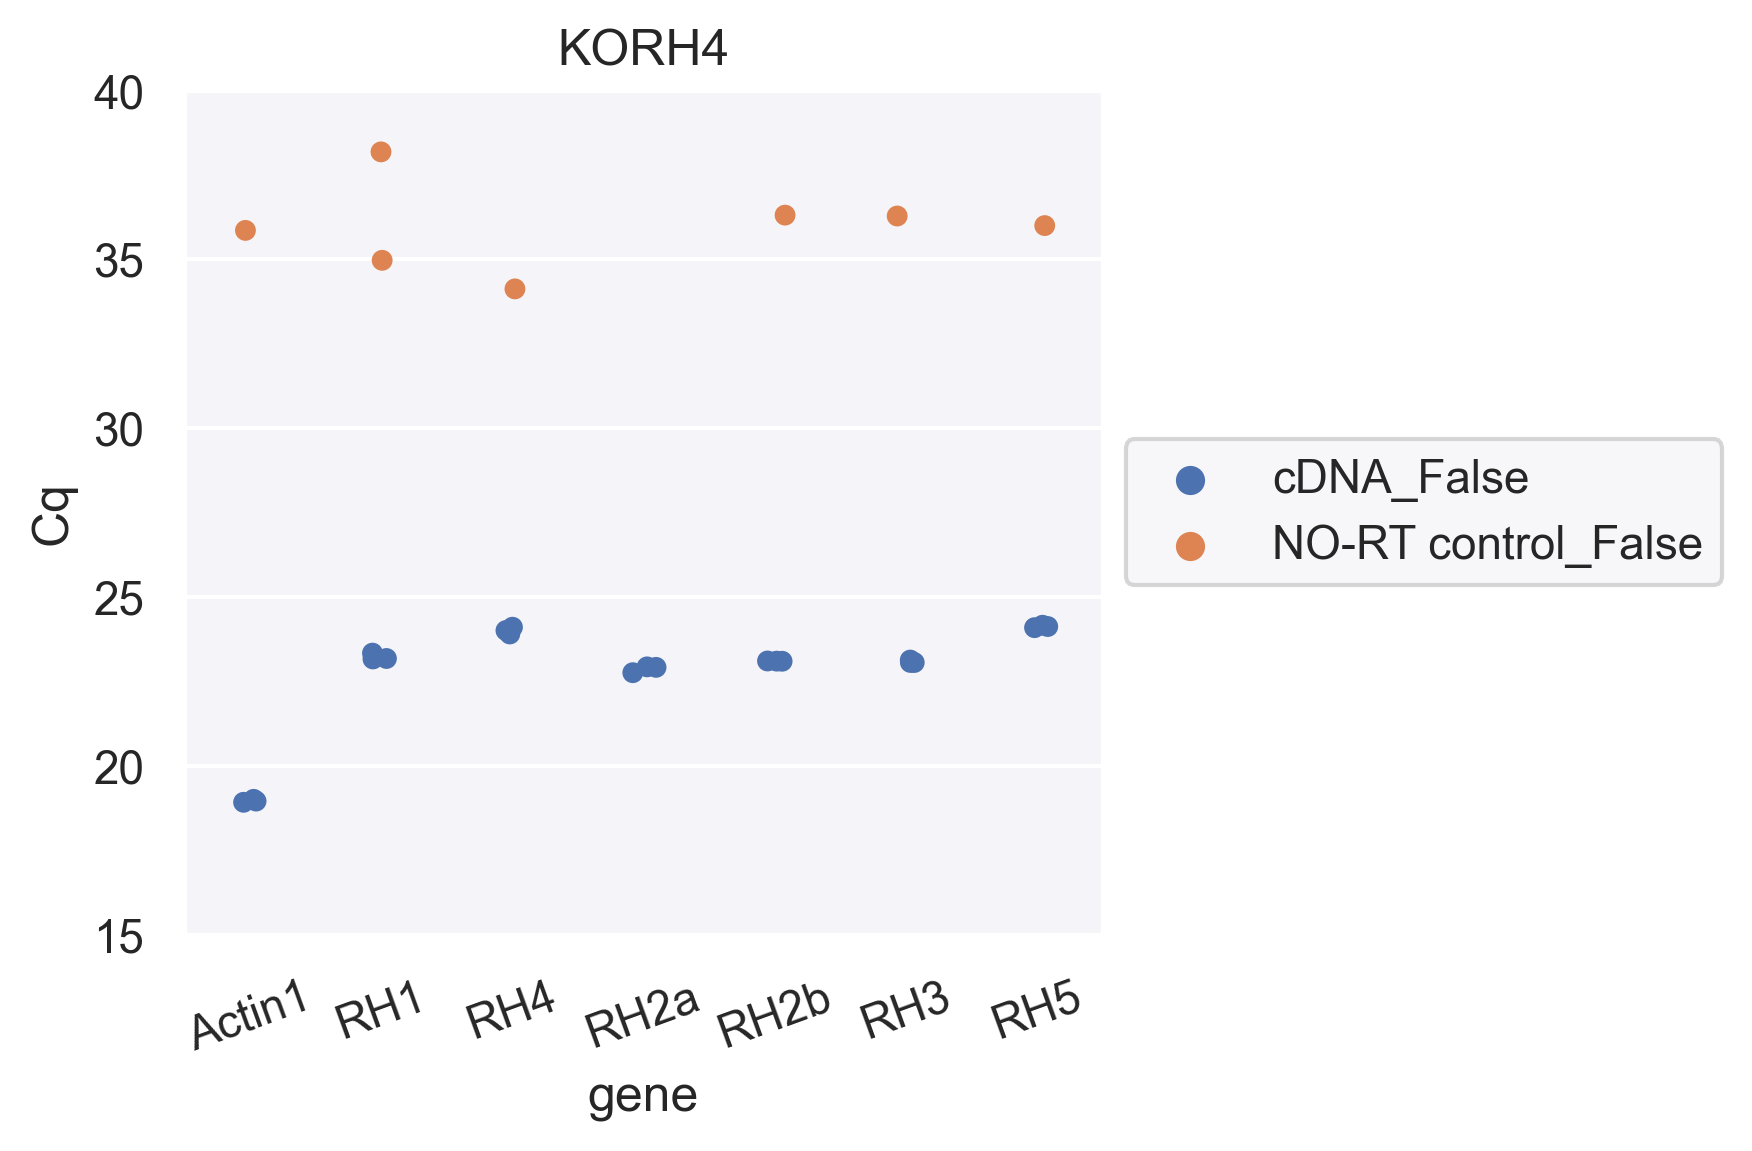

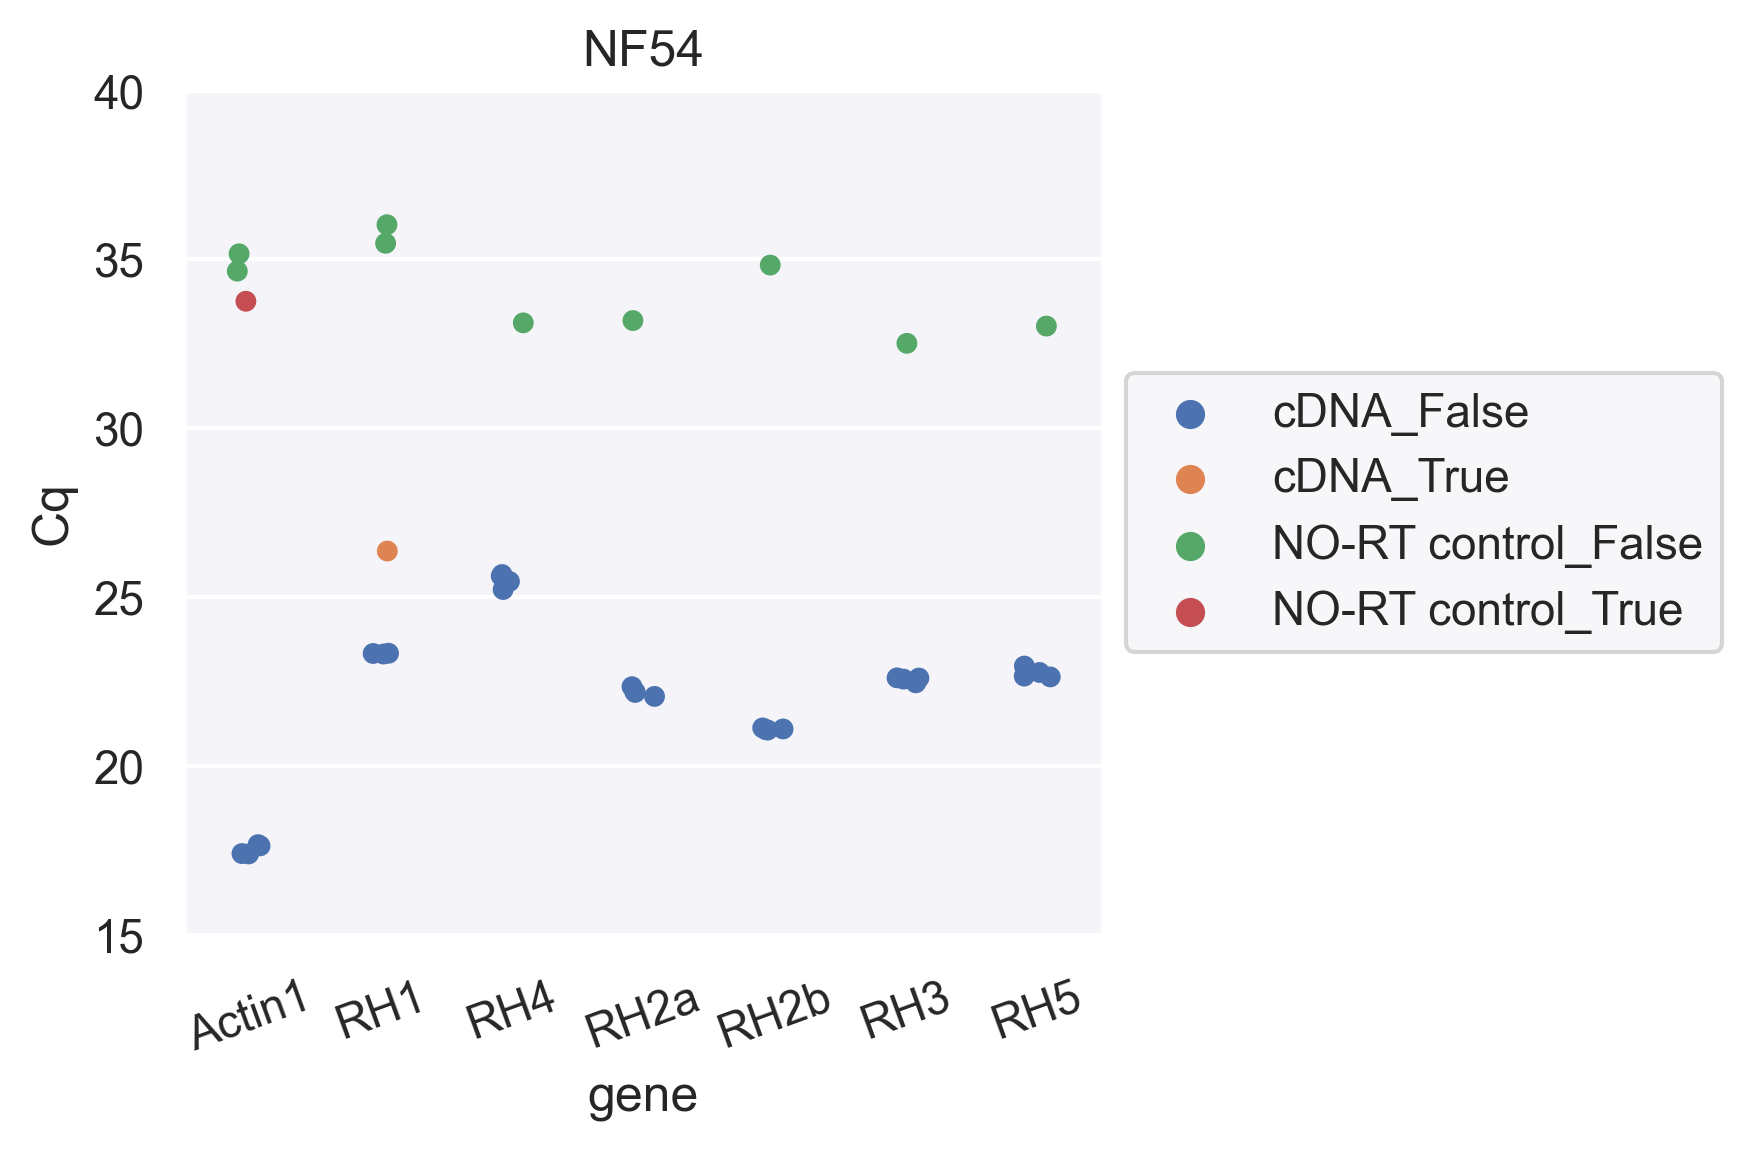

In [4]:

# run all experiments and make one dataframe
use_experiments = ['157', '158', '159', '160', '161', '162', '163', '164'] 
experiment_names = [e for e in experiment_names if any([u in e for u in use_experiments])]
print('Used experiment files:', experiment_names)

dfs = []

for e in experiment_names:
    output_folder = get_output_folder(experiment=e)
    df = load_dataframe(experiment_name=e)    
    standard_results = fit_to_standard(df, plot=False, output_folder=output_folder)
    plot_nort_controls(df, output_folder=output_folder)

    normalization_gene = 'Actin1'
    normalization_sample = 'NF54'
    normalization_sample = 'KOPfs25'

    df_cdna, sample_normalization_title, gene_normalization_title = add_concentration_and_normalizations(
        df=df.query('is_outlier == False'),
        standard_results=standard_results,
        normalization_gene=normalization_gene,
        normalization_sample=normalization_sample,
    )

    df_cdna_q = df_cdna.query('sample != @normalization_sample and gene != @normalization_gene')

    dfs.append(df_cdna_q)

df = pd.concat(dfs, ignore_index=True)
df.reset_index()

# df.to_json('qpcr_df_05_NF54.json')
# df.to_json('qpcr_df_05_KOPfs25.json')

df

Used experiment files: ['EEJR0161', 'EEJR0157', 'EEJR0160', 'EEJR0159', 'EEJR0162', 'EEJR0158']


gene      line  mean_relative_concentration  std_relative_concentration  \
0    AMA1  KOEBA140                     0.078653                    0.003922   
1    AMA1  KOEBA175                     0.026878                    0.000310   
2    AMA1  KOEBA181                     0.260274                    0.026671   
3    AMA1   KOP230P                    10.161980                    0.390389   
4    AMA1   KOPfs25                     1.143679                    0.008294   
..    ...       ...                          ...                         ...   
319   RH5   KOPfs25                     2.086577                    0.116067   
320   RH5     KORH1                     0.147755                    0.003364   
321   RH5    KORH2a                     1.850662                    0.029052   
322   RH5     KORH4                     0.959710                    0.041990   
323   RH5      NF54                     0.504941                    0.027295   

     sample  plate  Normalized relative concentration (Actin1)  \
0         3      1                                    0.175902   
1         3      1                                    0.127638   
2         3      1                                    0.172987   
3         3      1                                    0.297541   
4         3      1                                    0.167731   
..      ...    ...                                         ...   
319       1      2                                    0.142916   
320       1      2                                    0.053981   
321       1      2                                    0.126554   
322       1      2                                    0.142905   
323       1      2                                    0.088468   

     Expression fold change to KOP230P (normalised to Actin1)  
0                                             0.591187         
1                                             0.428978         
2                                             0.581391         
3                                             1.000000         
4                                             0.563725         
..                                                 ...         
319                                           1.833012         
320                                           0.692356         
321                                           1.623155         
322                                           1.832881         
323                                           1.134675         

[324 rows x 8 columns]

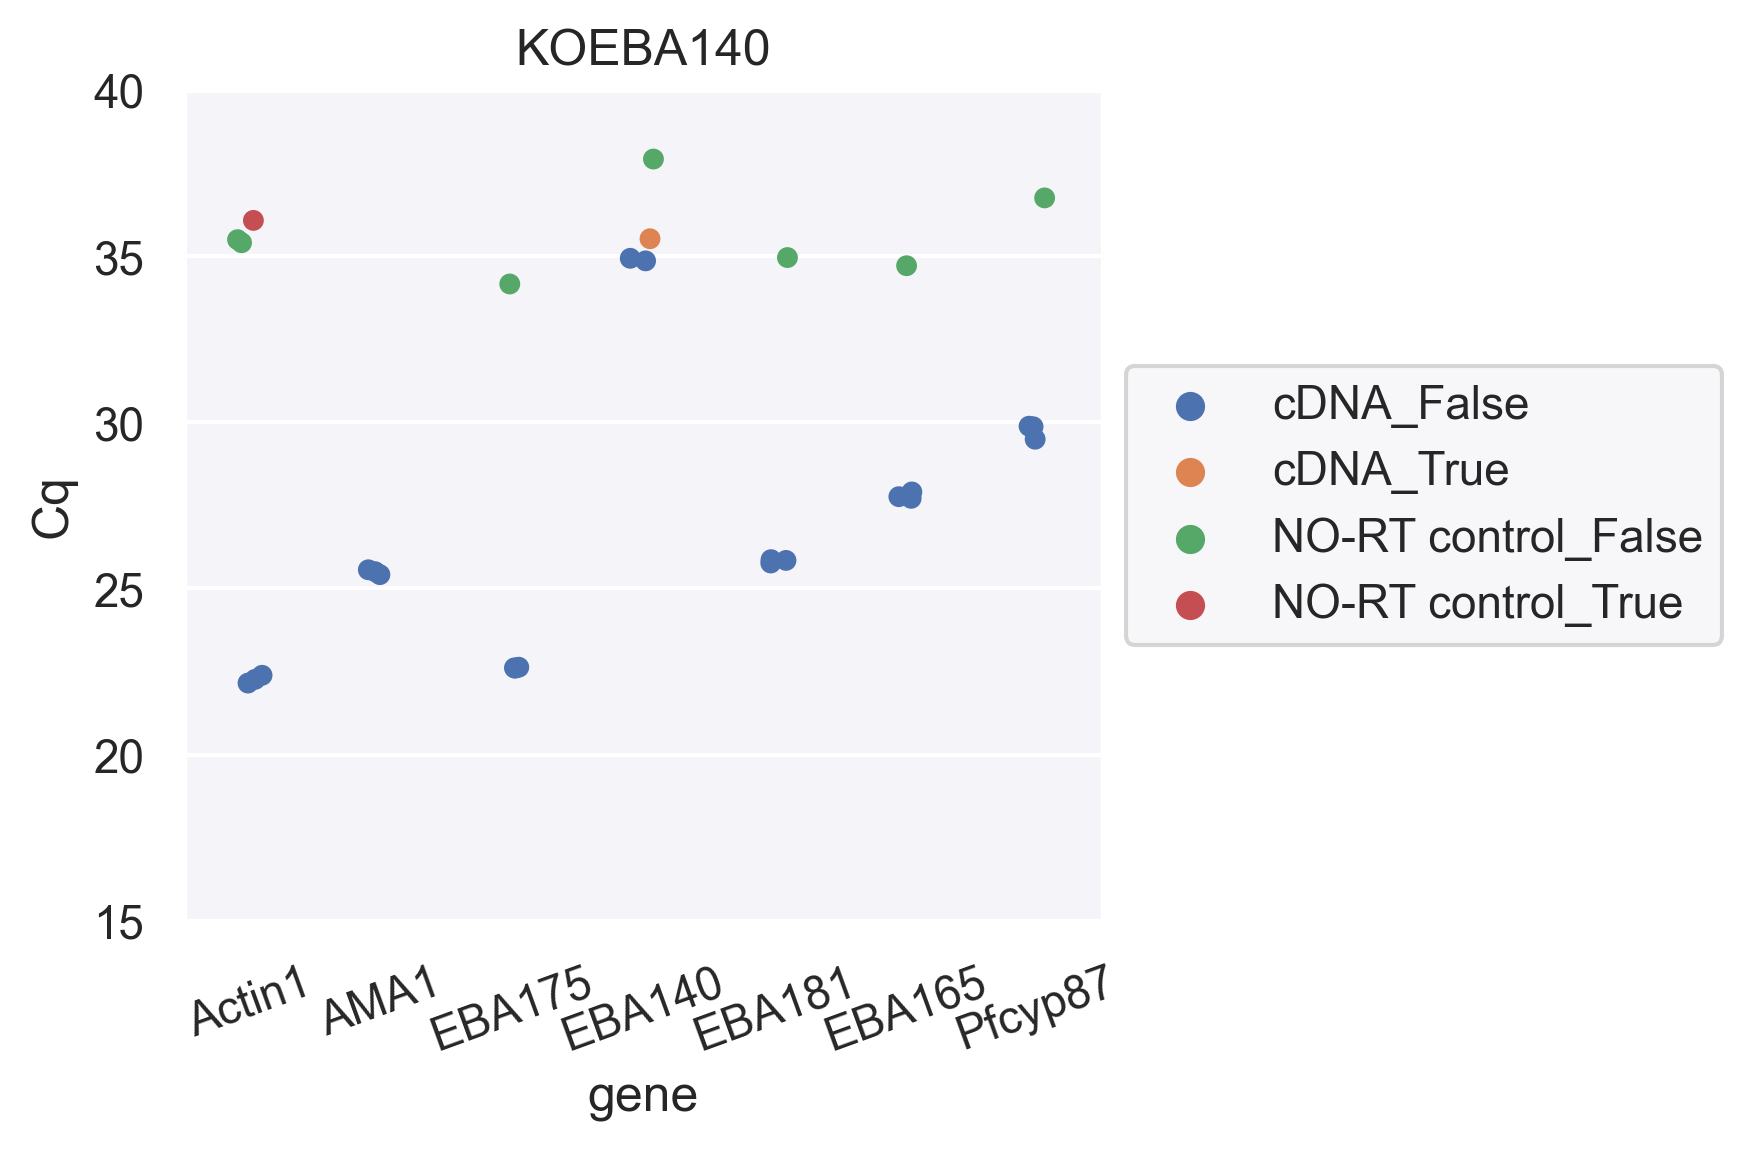

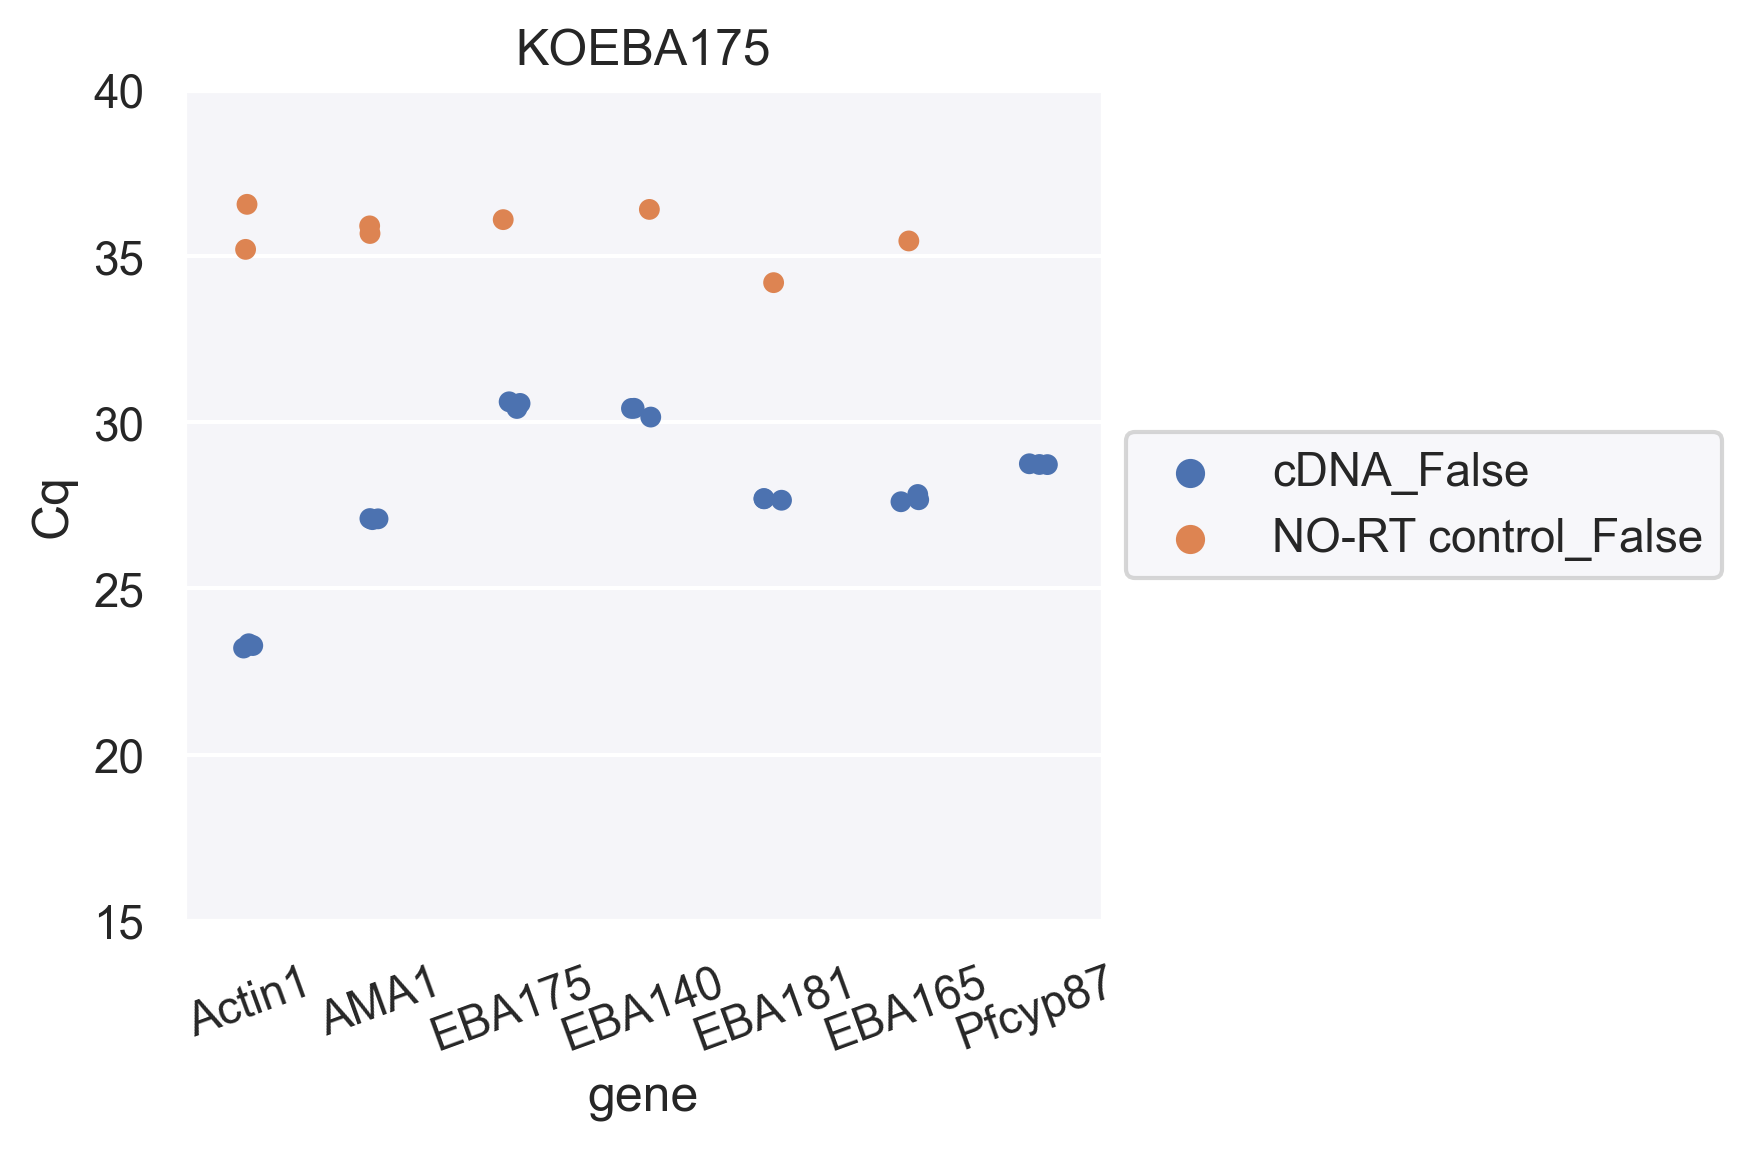

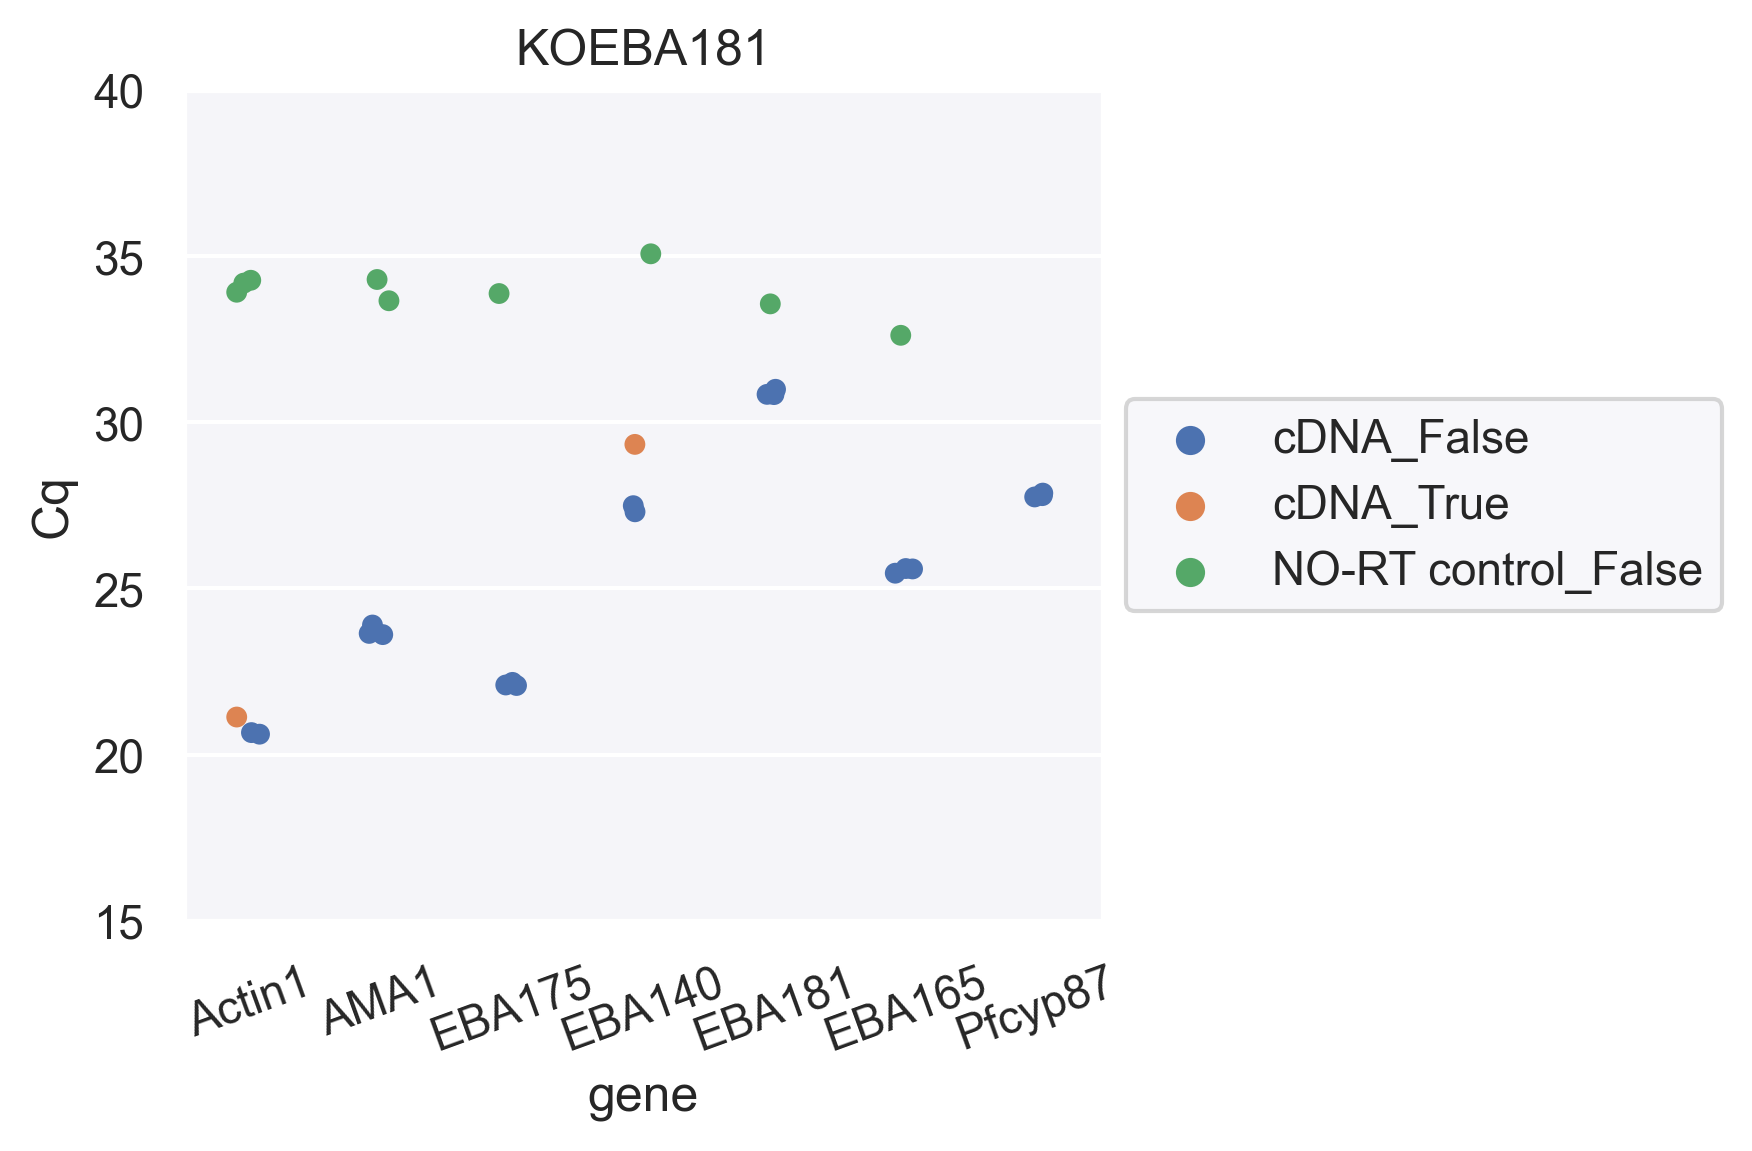

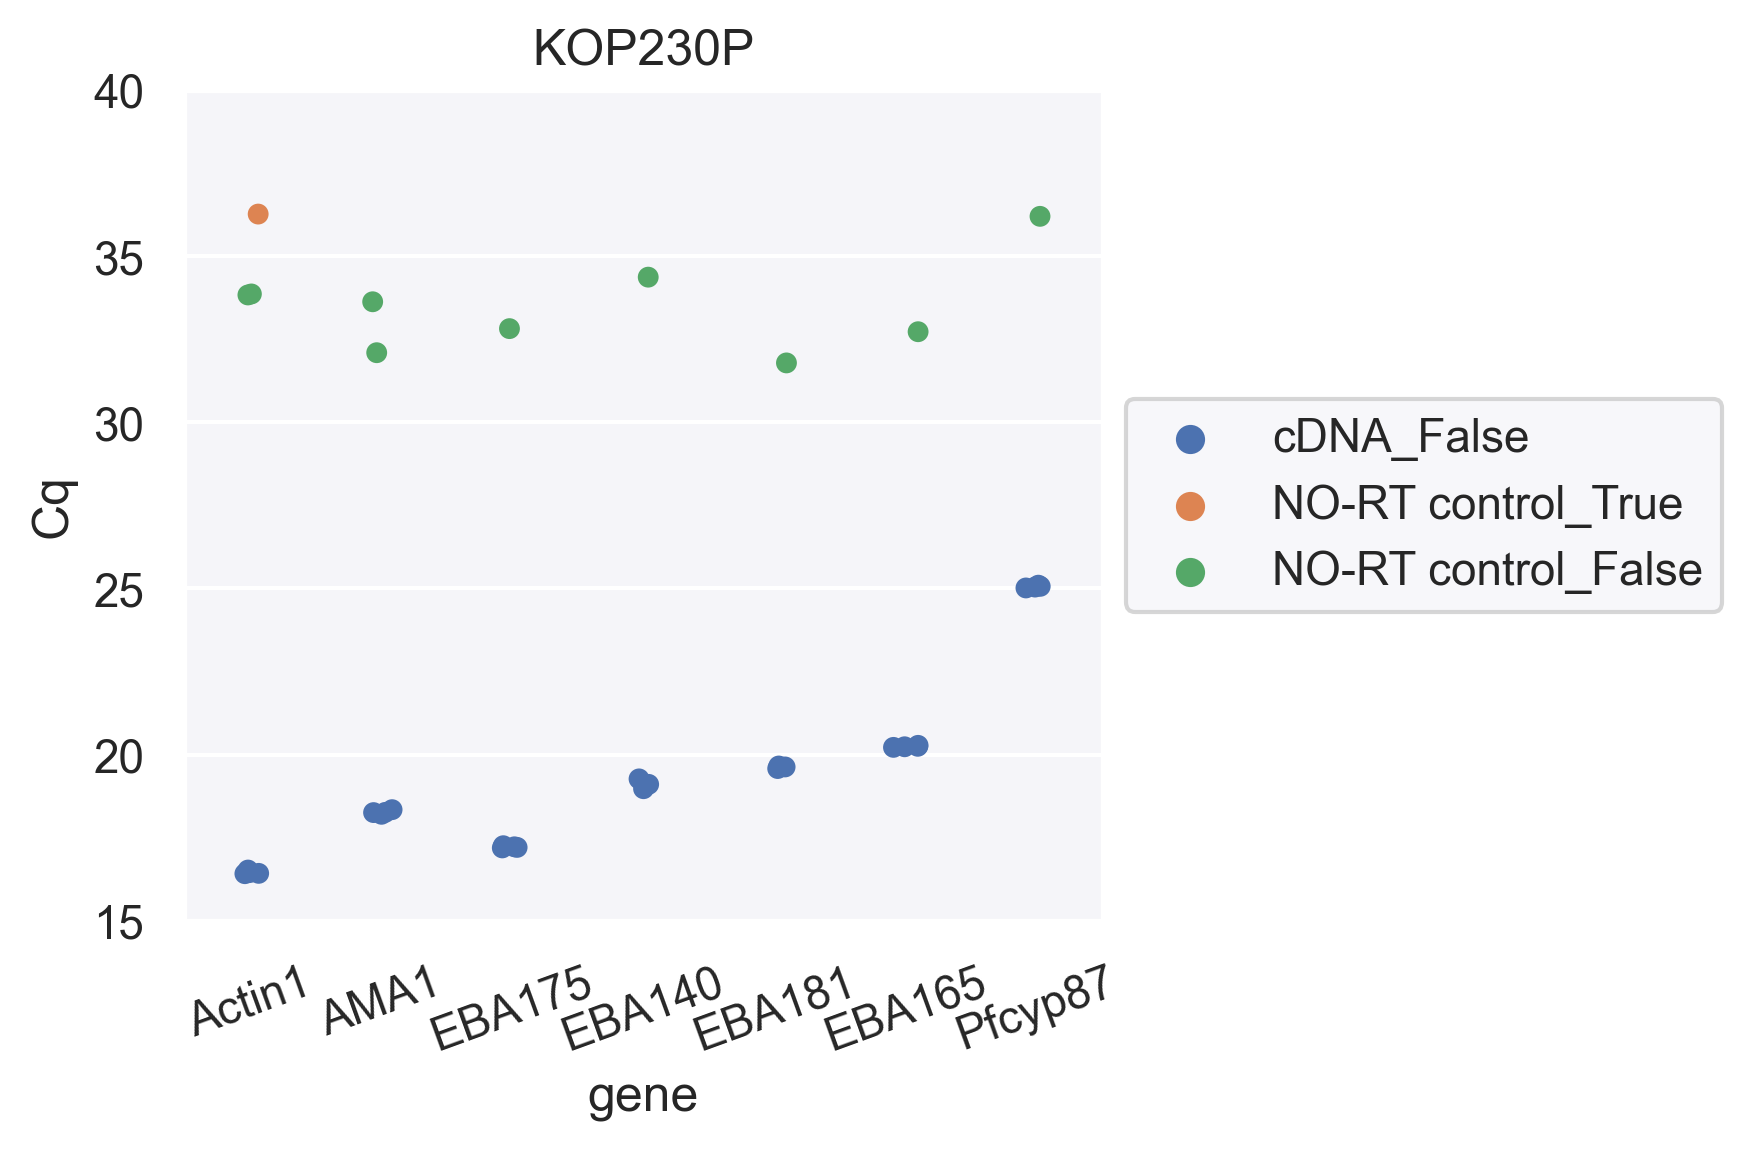

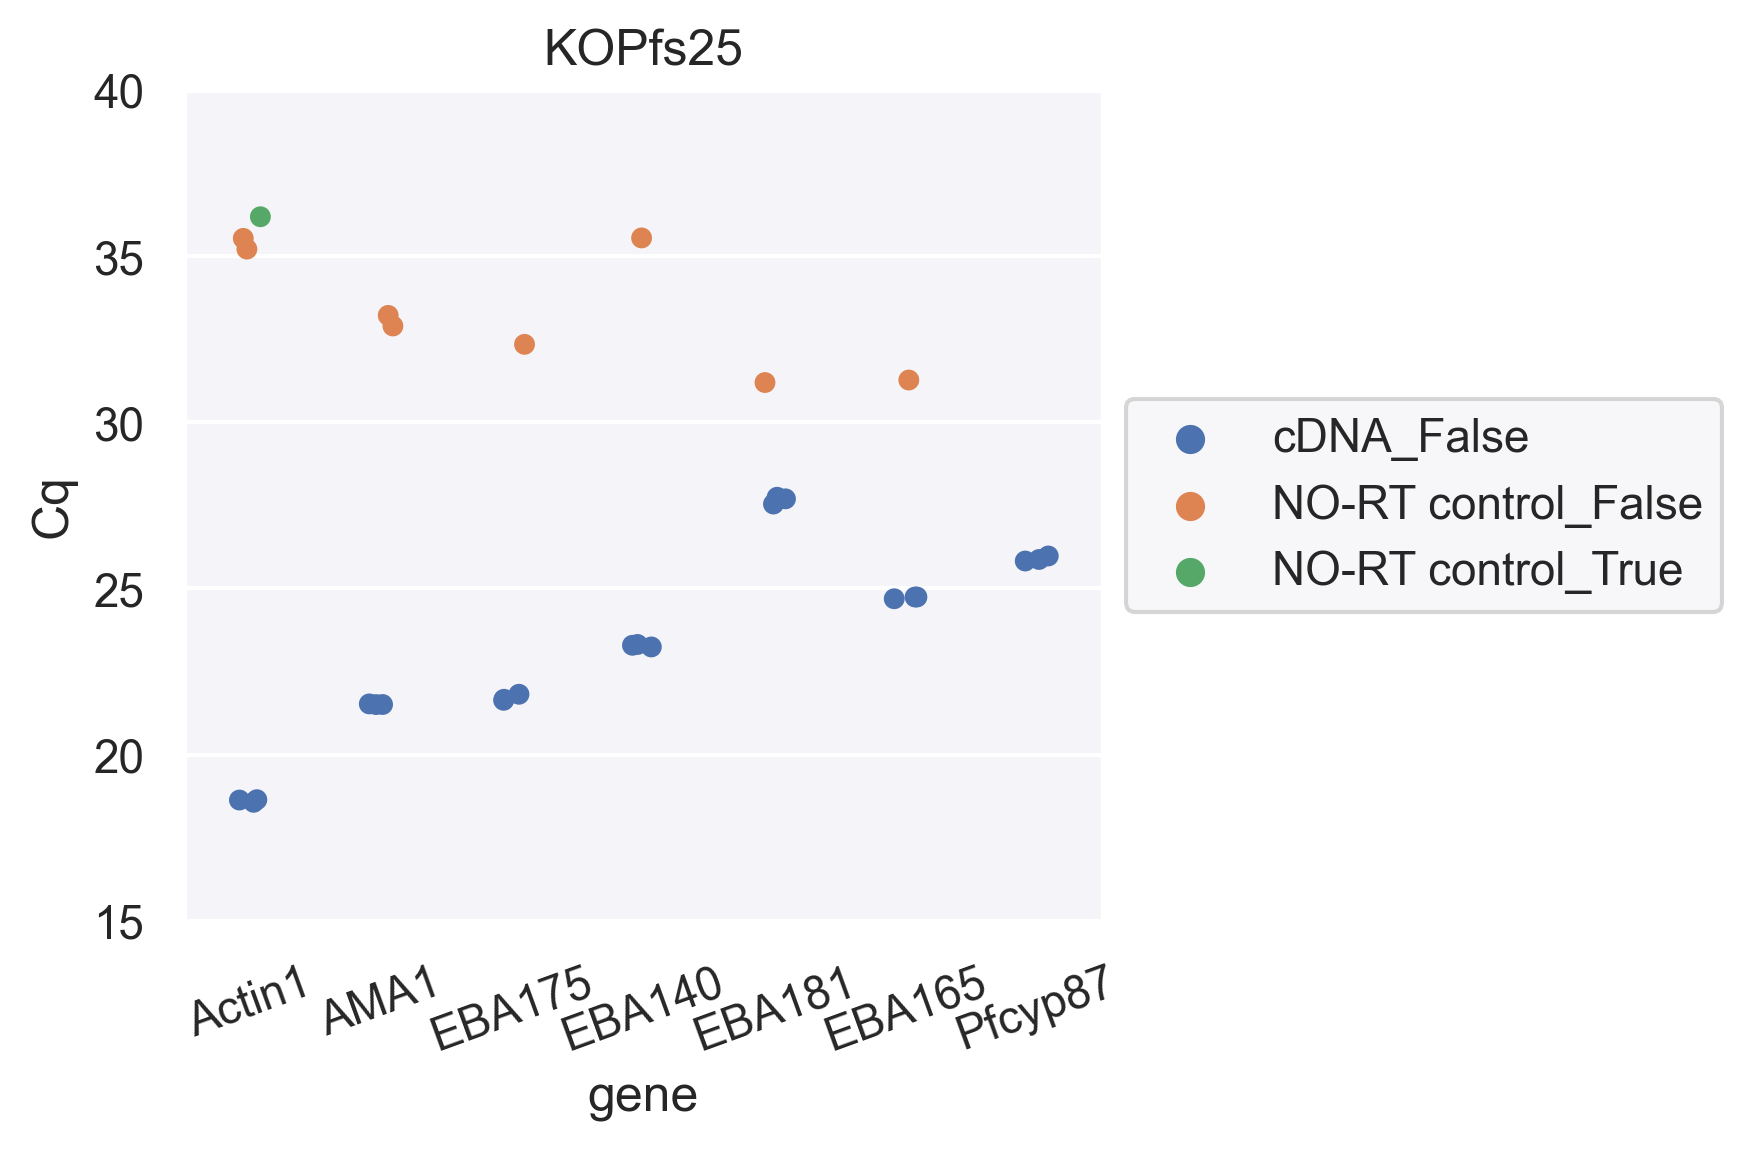

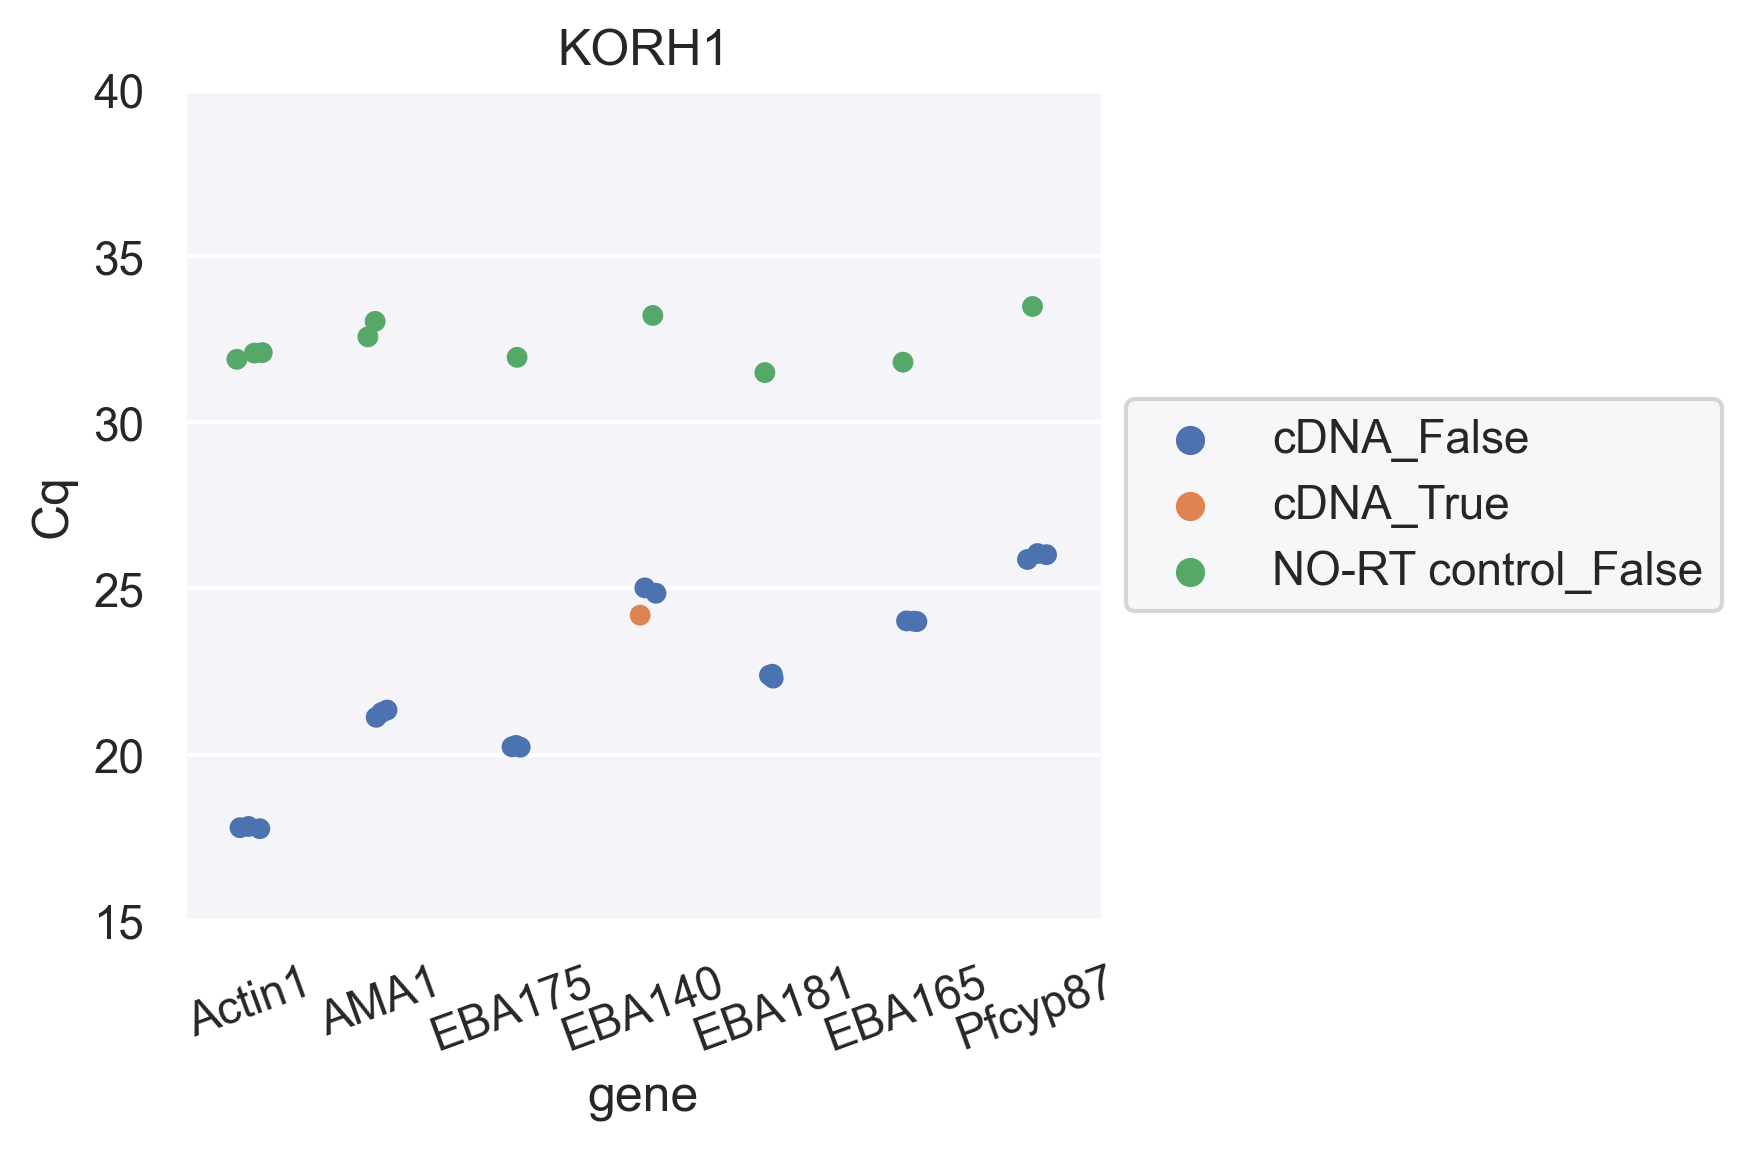

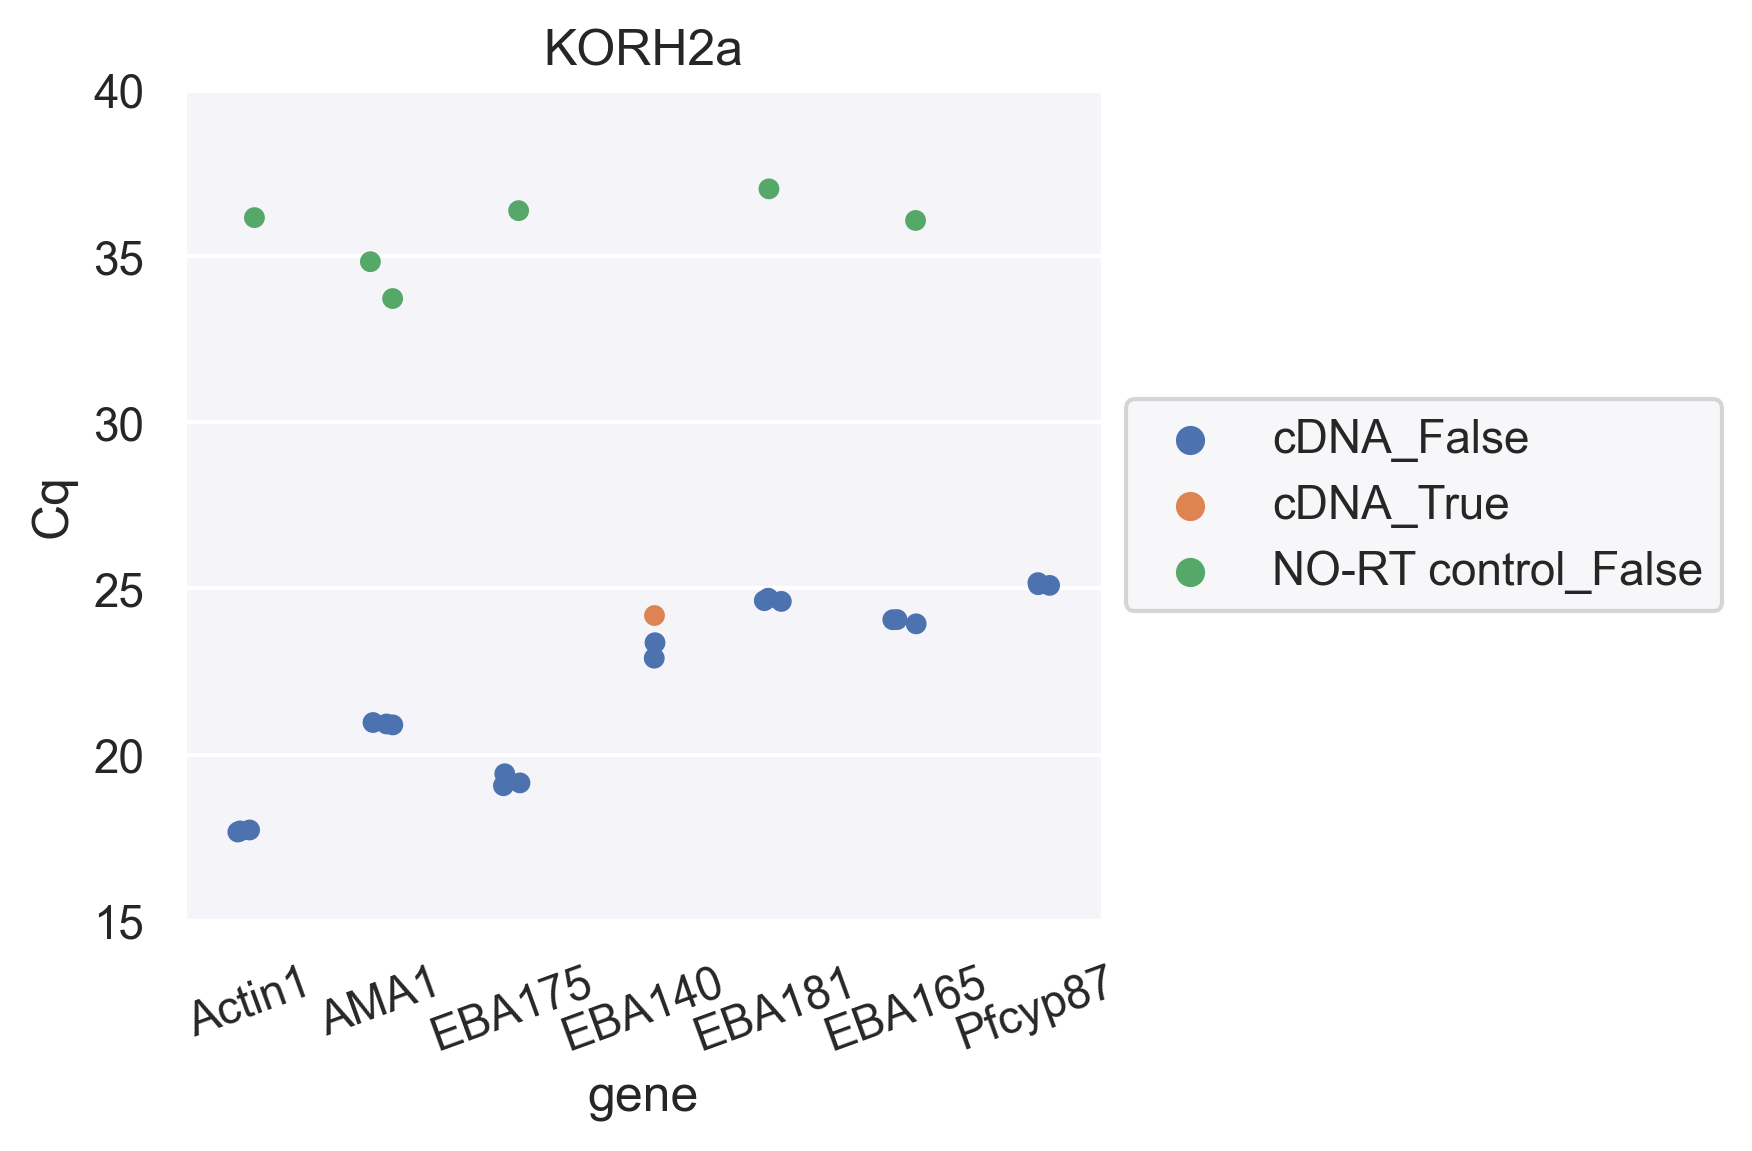

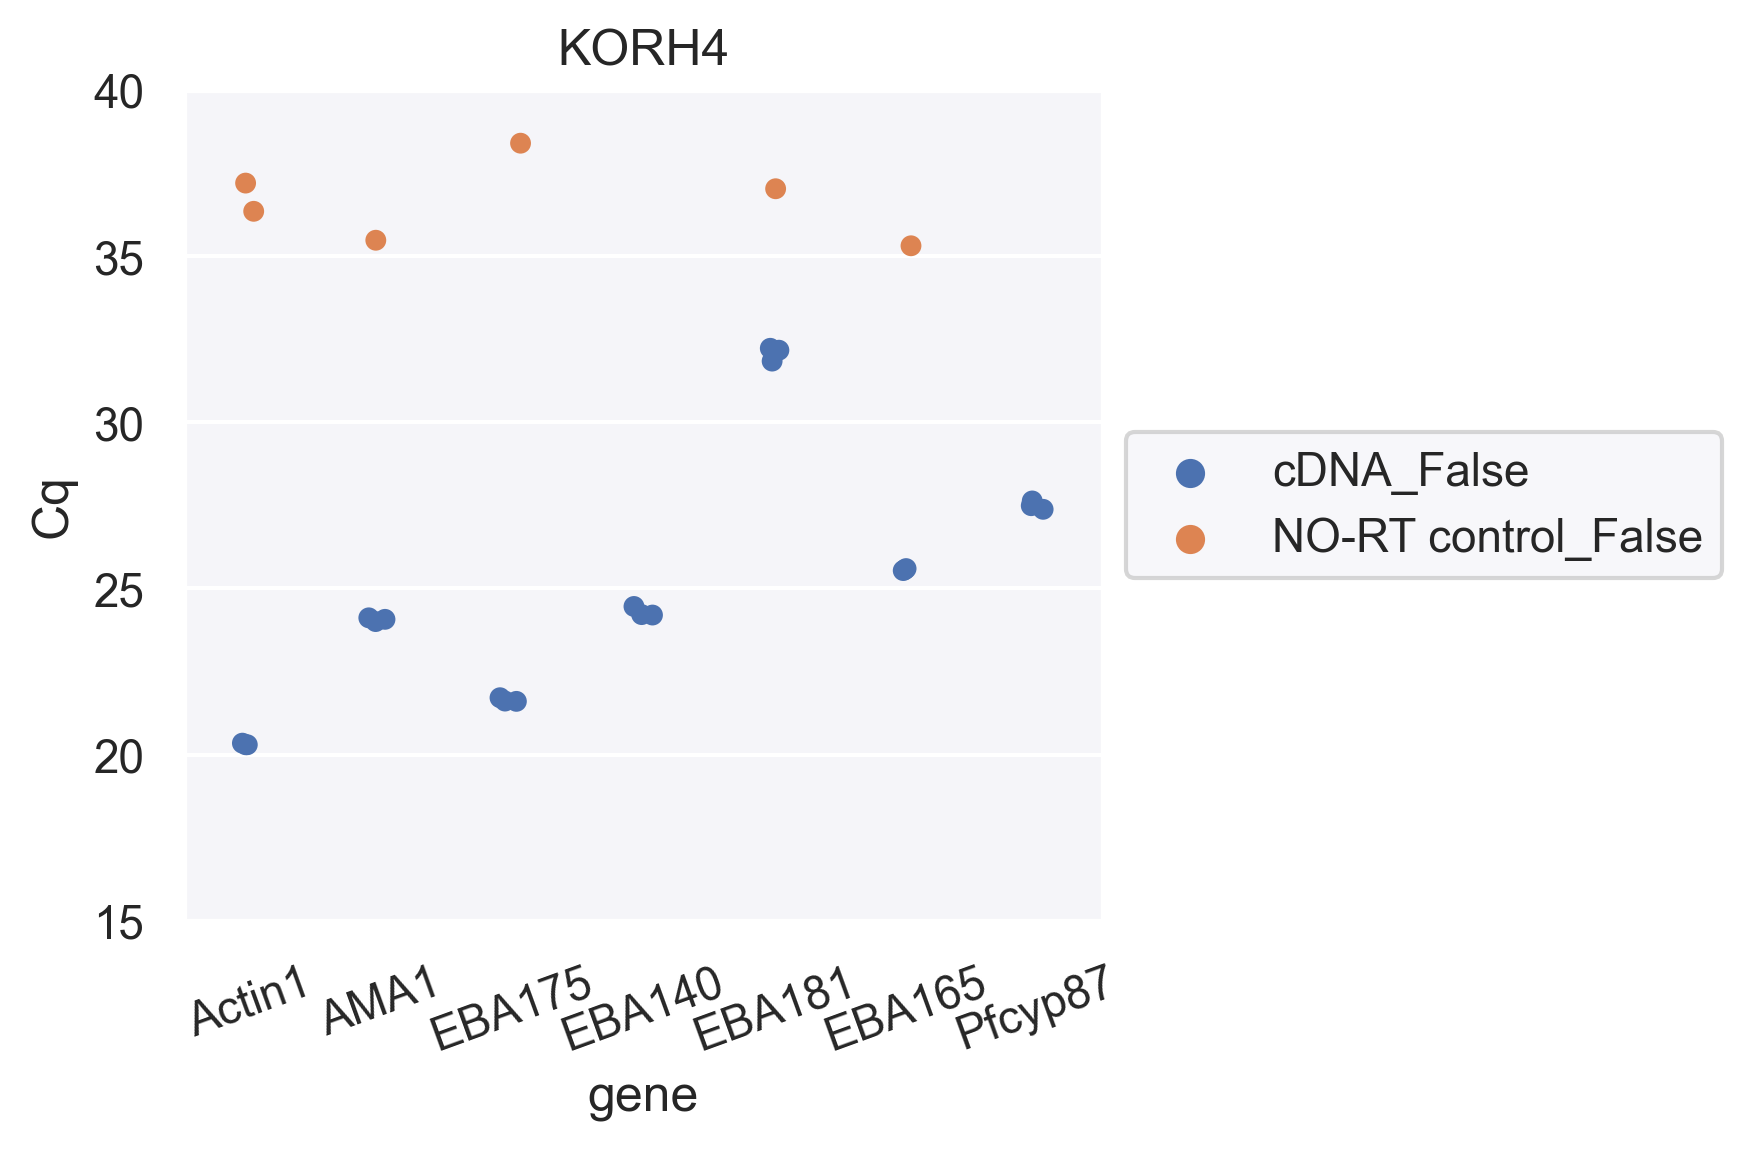

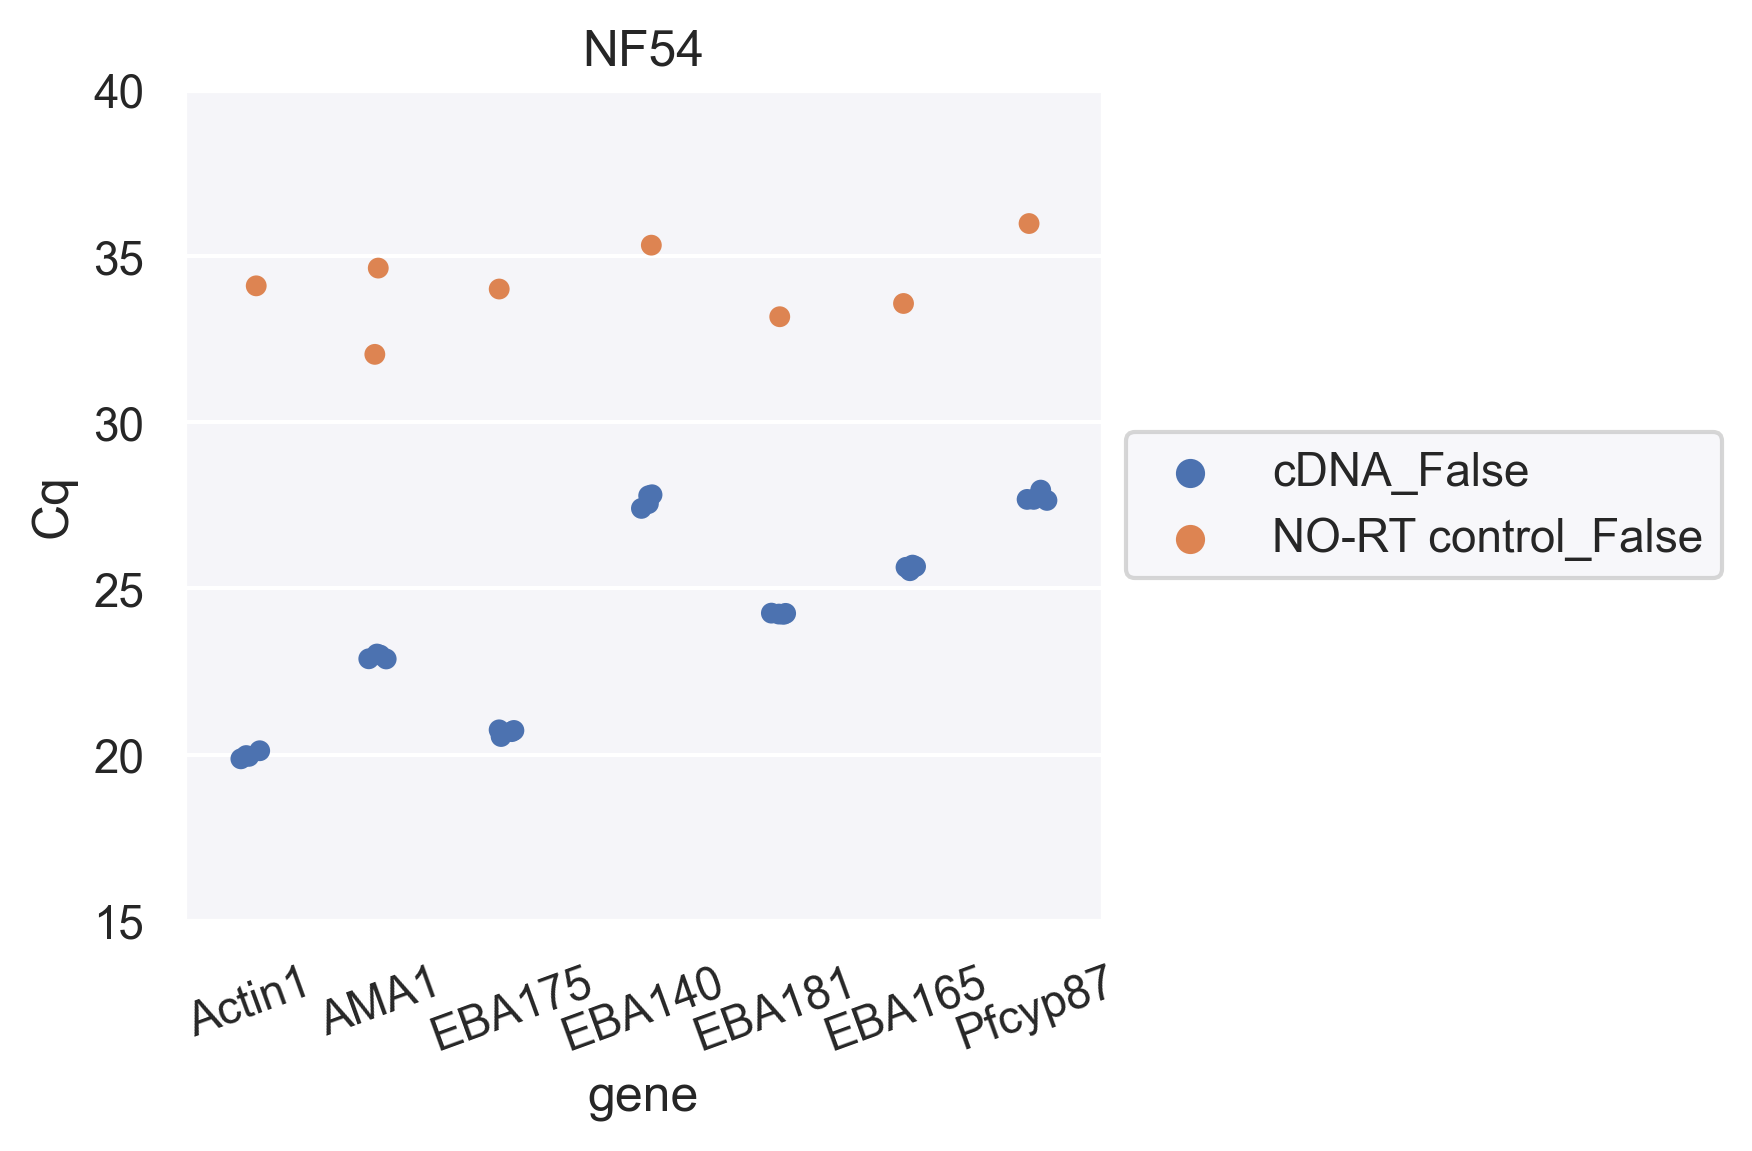

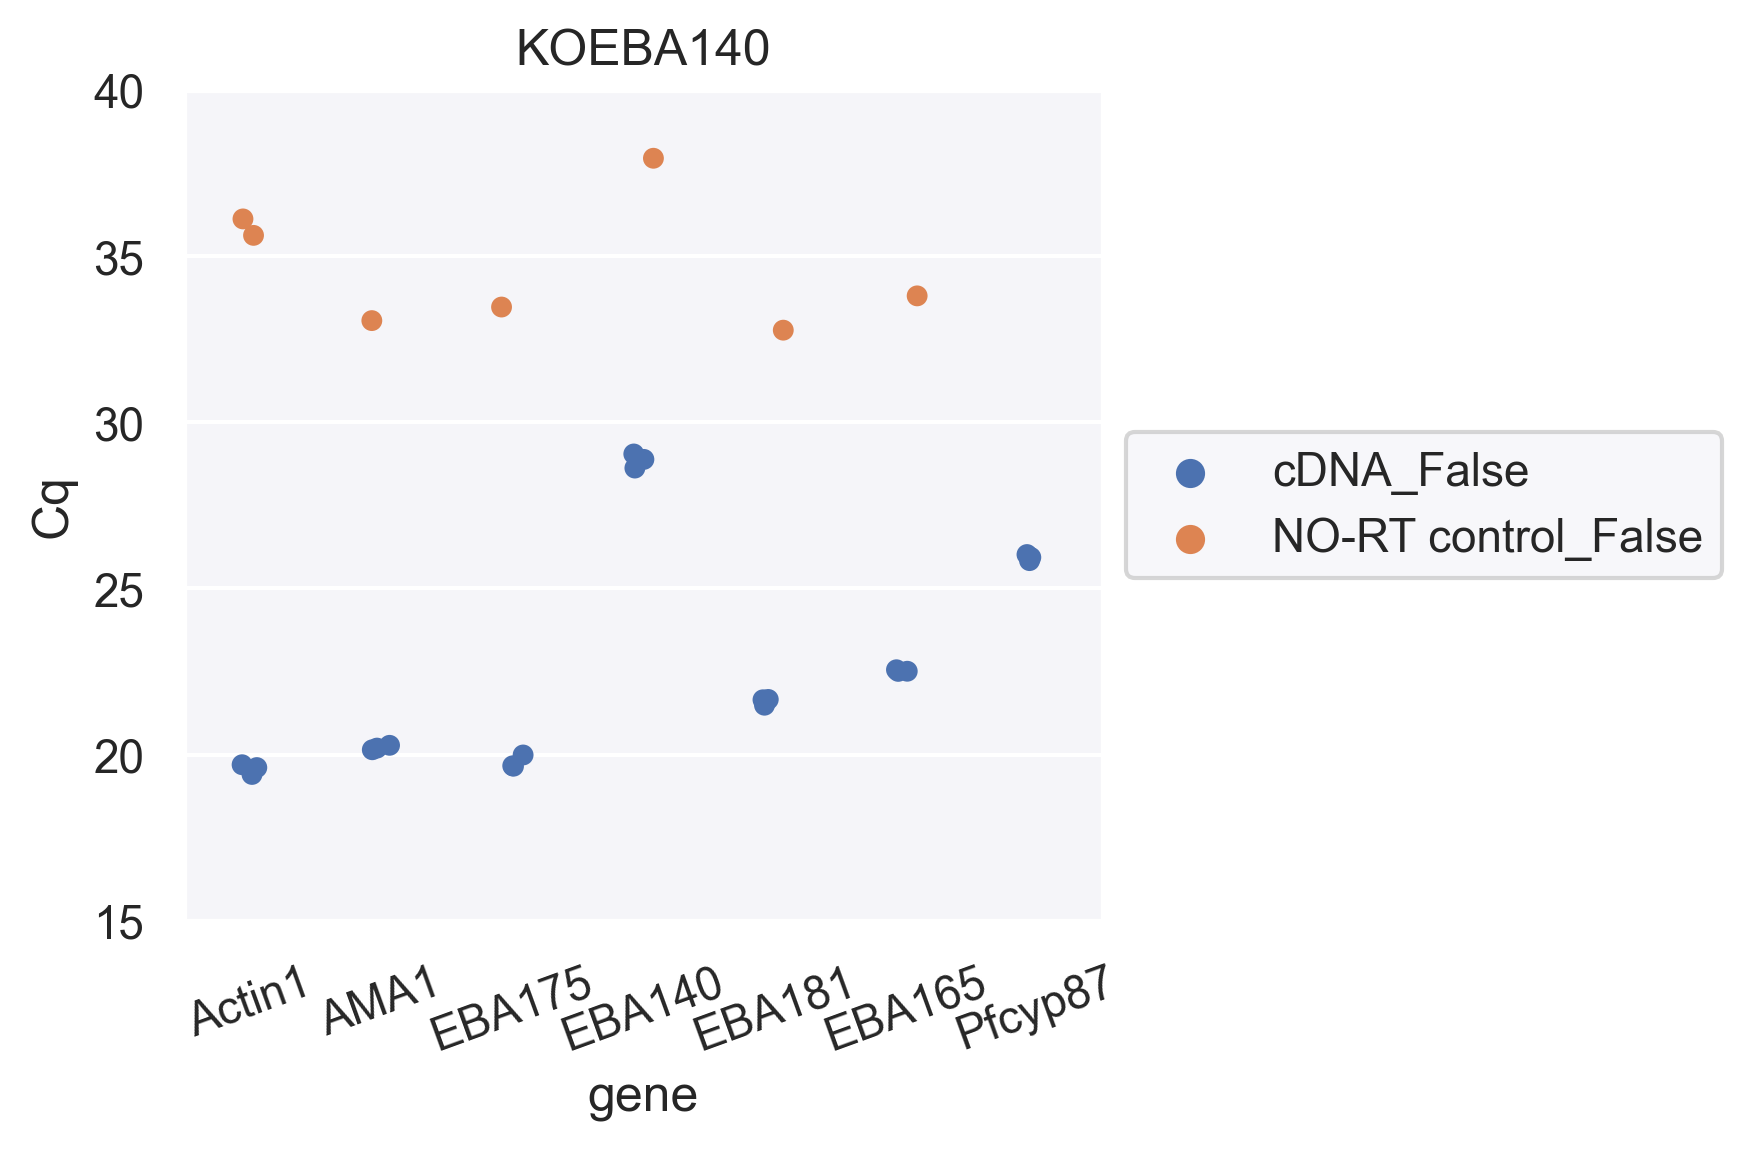

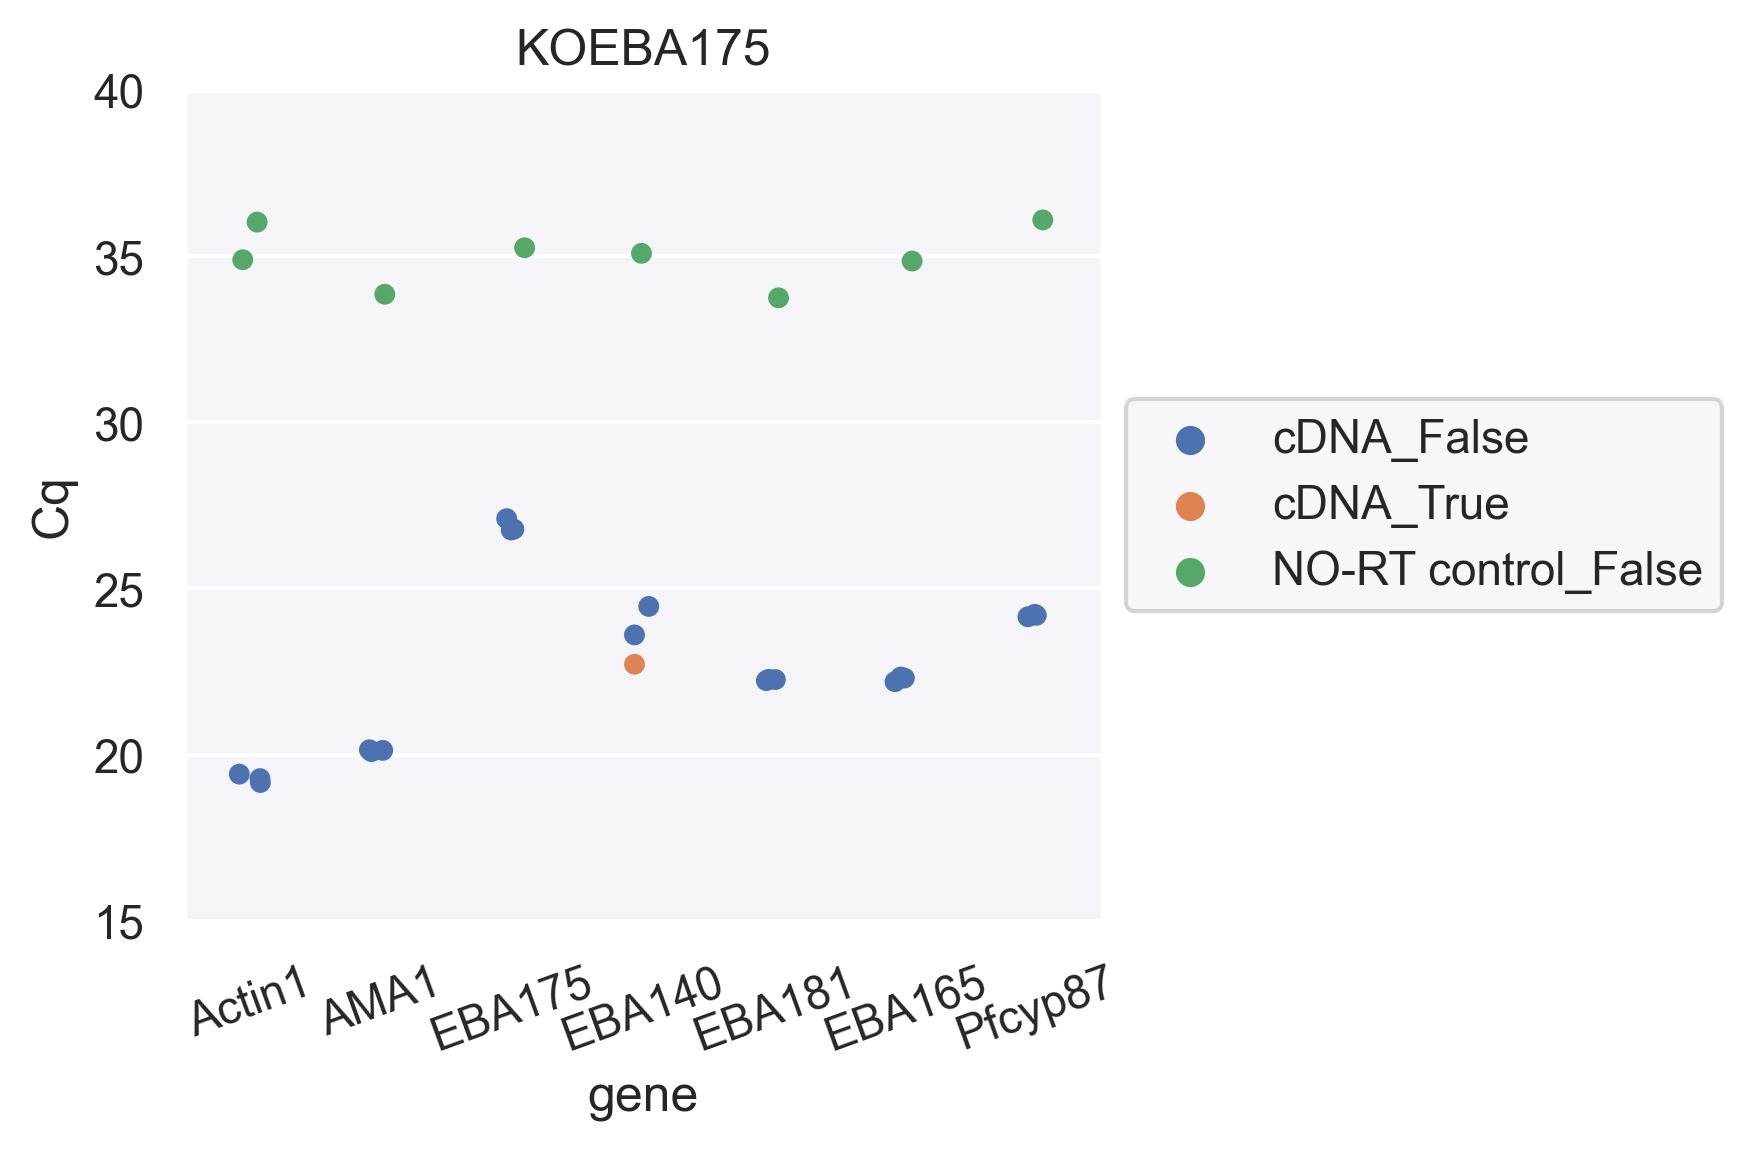

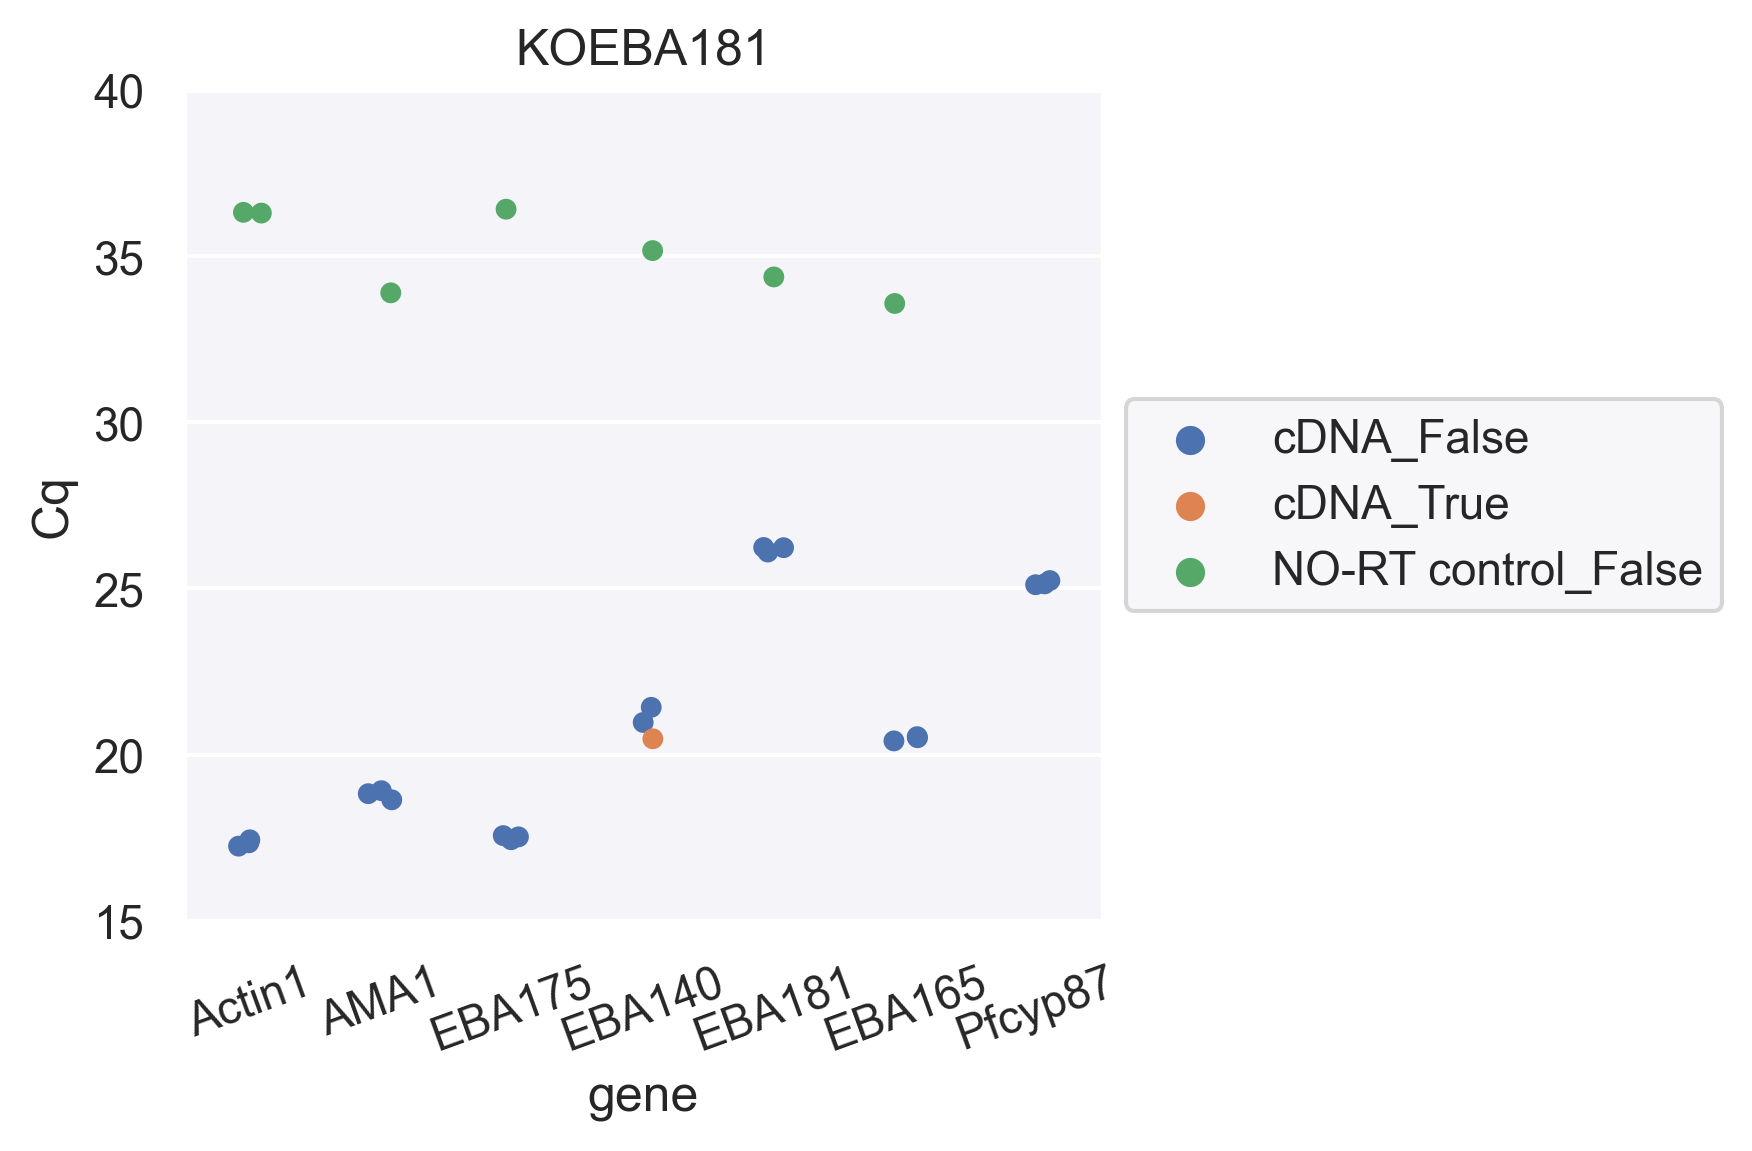

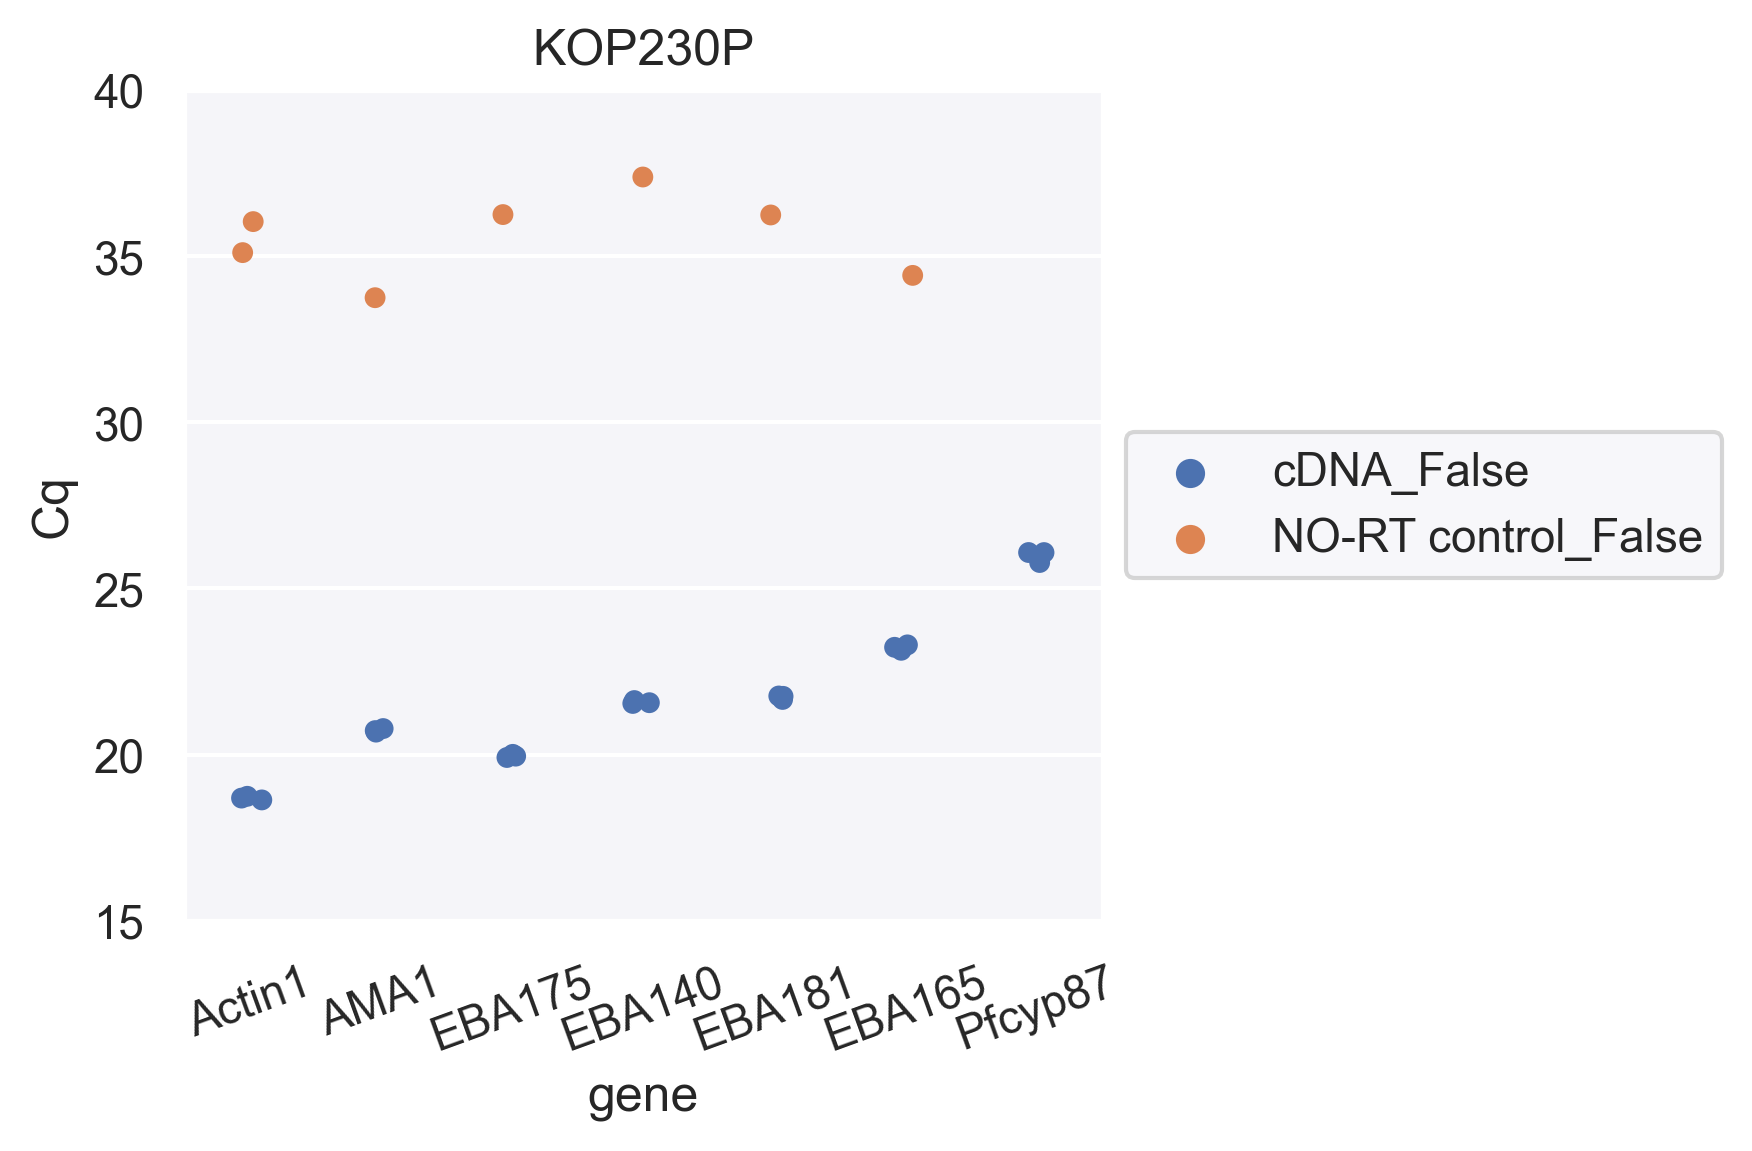

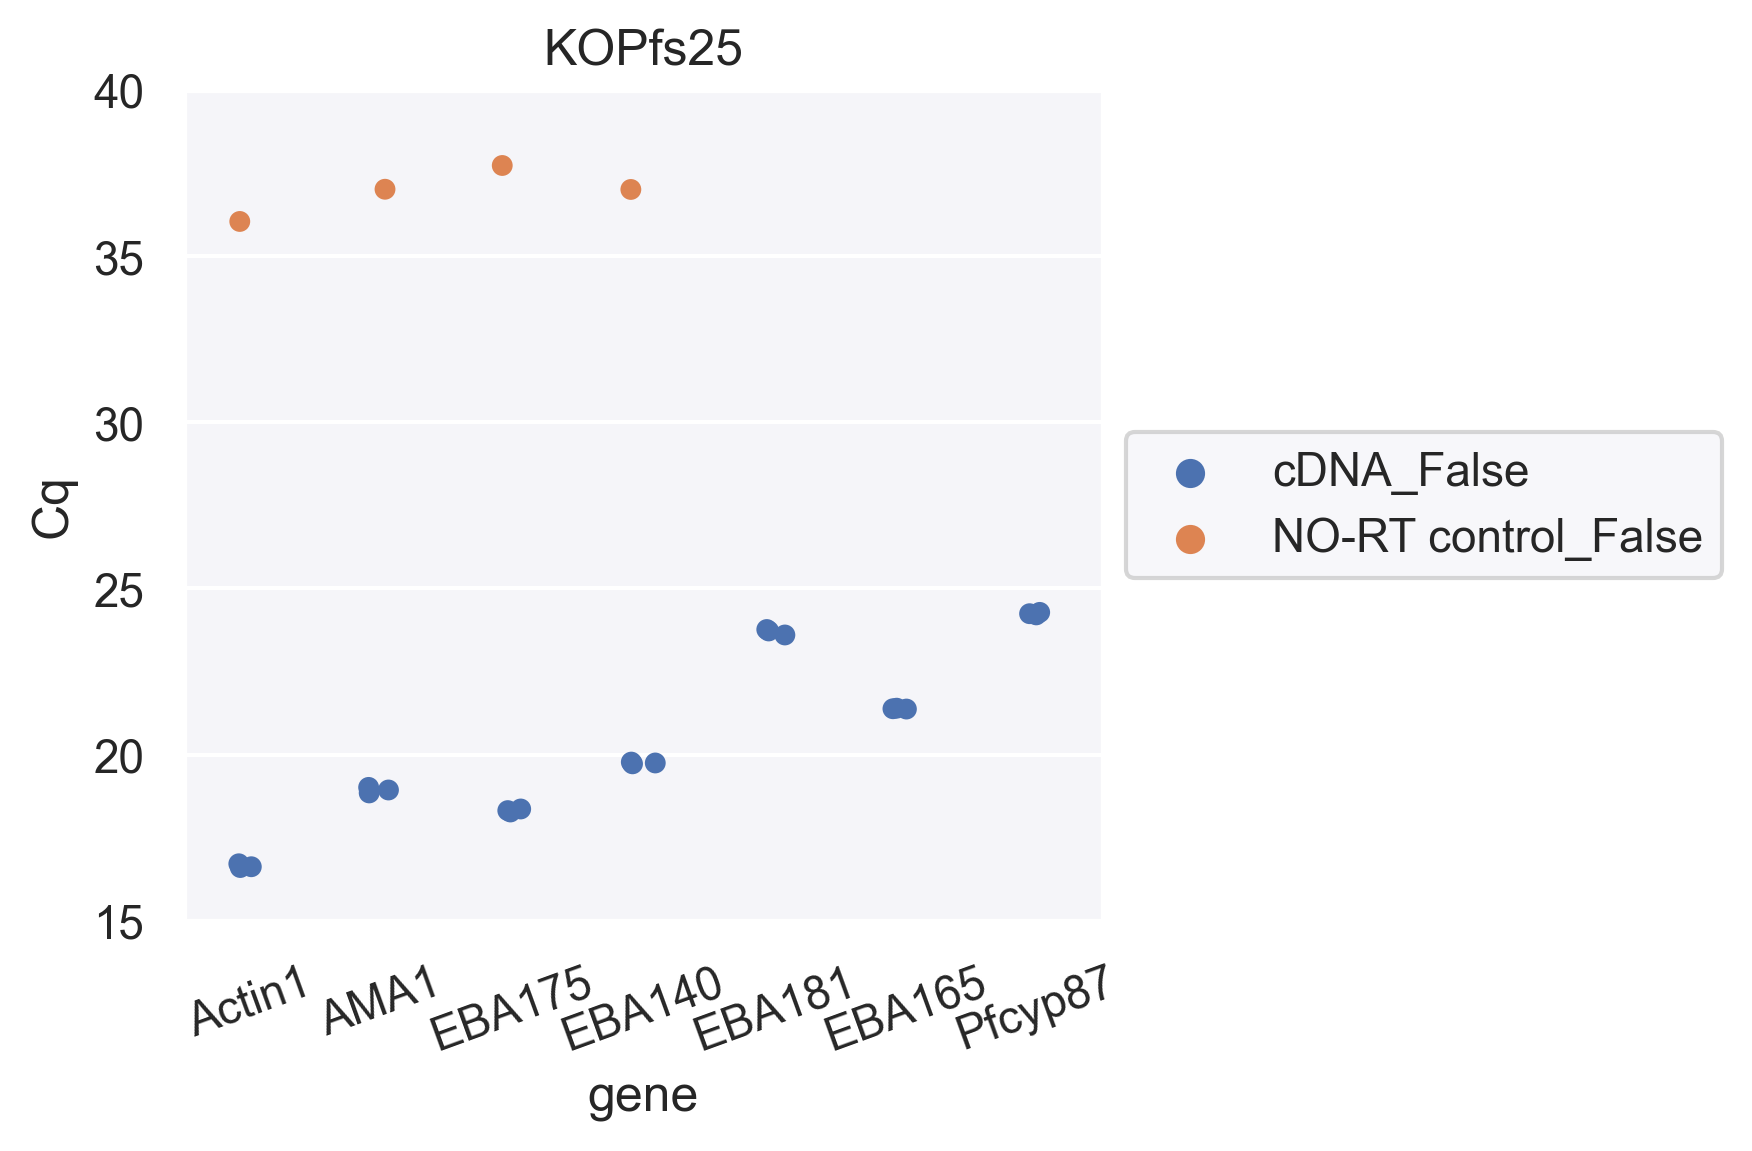

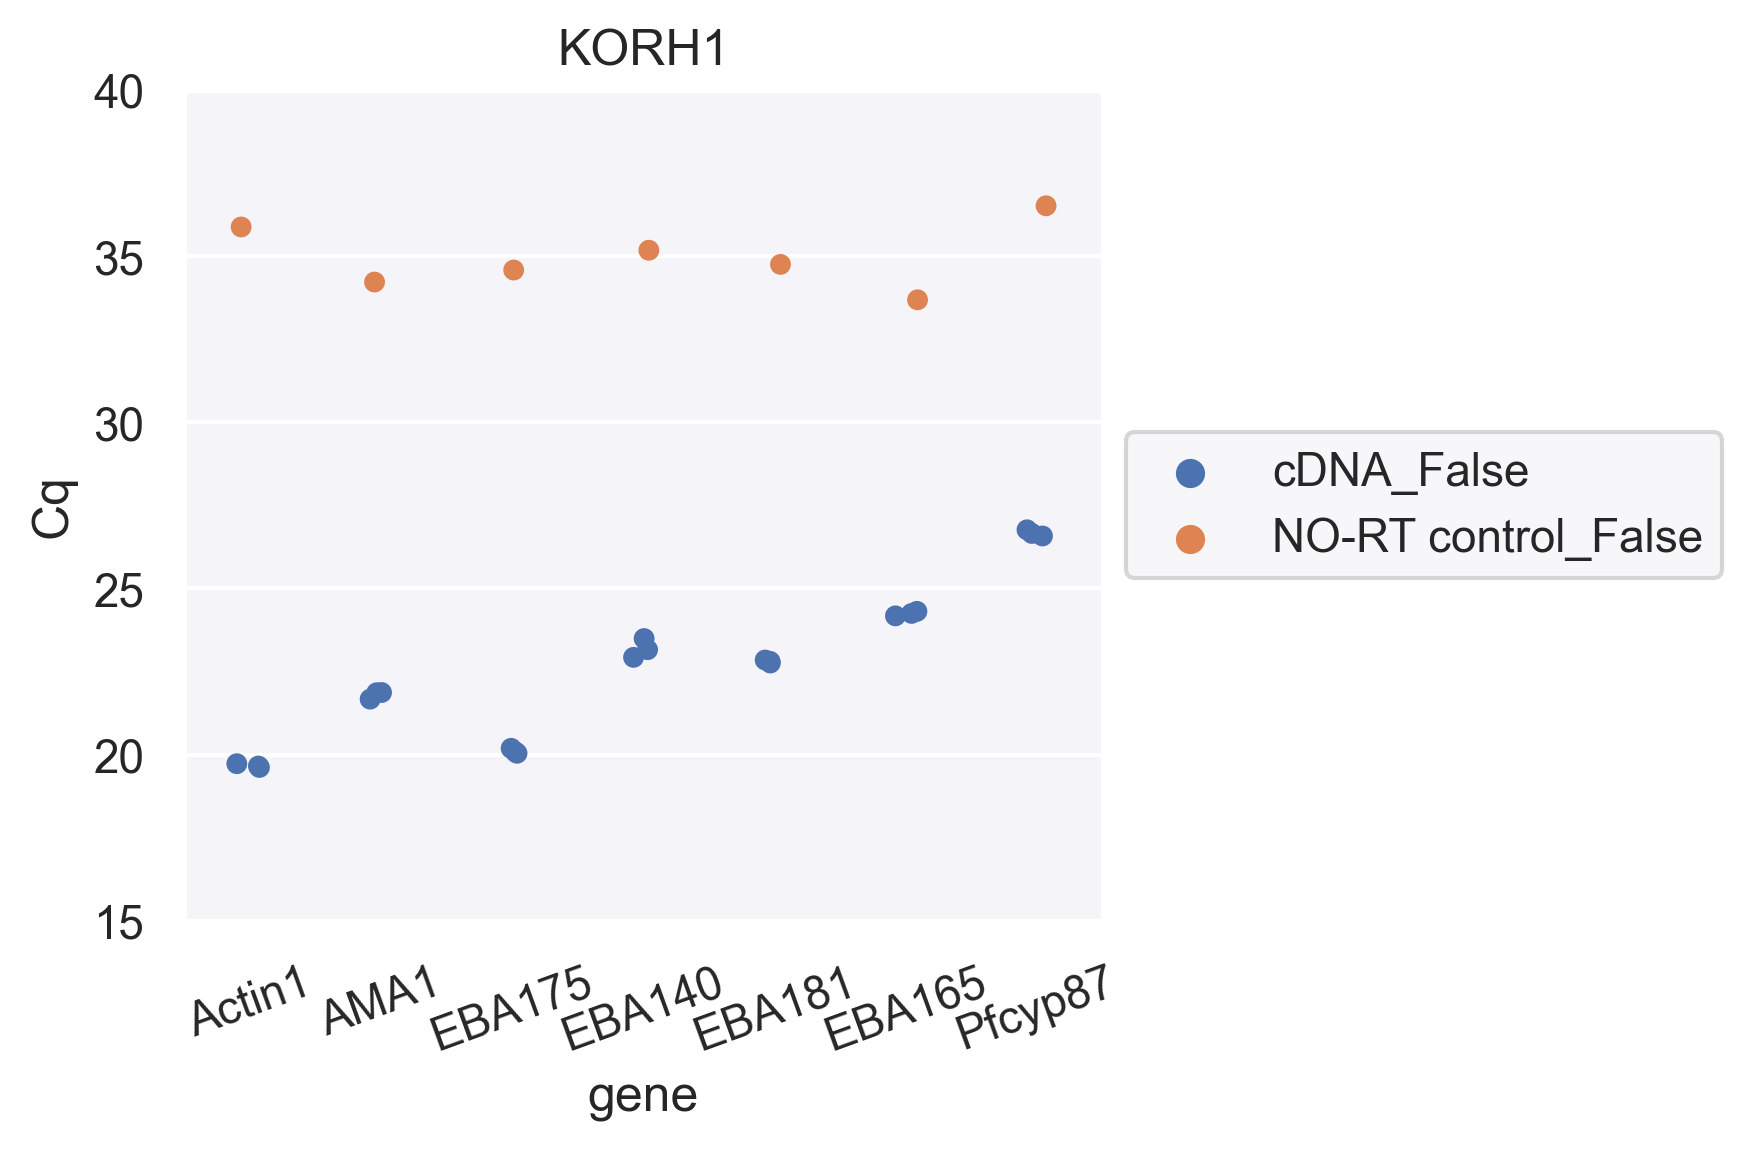

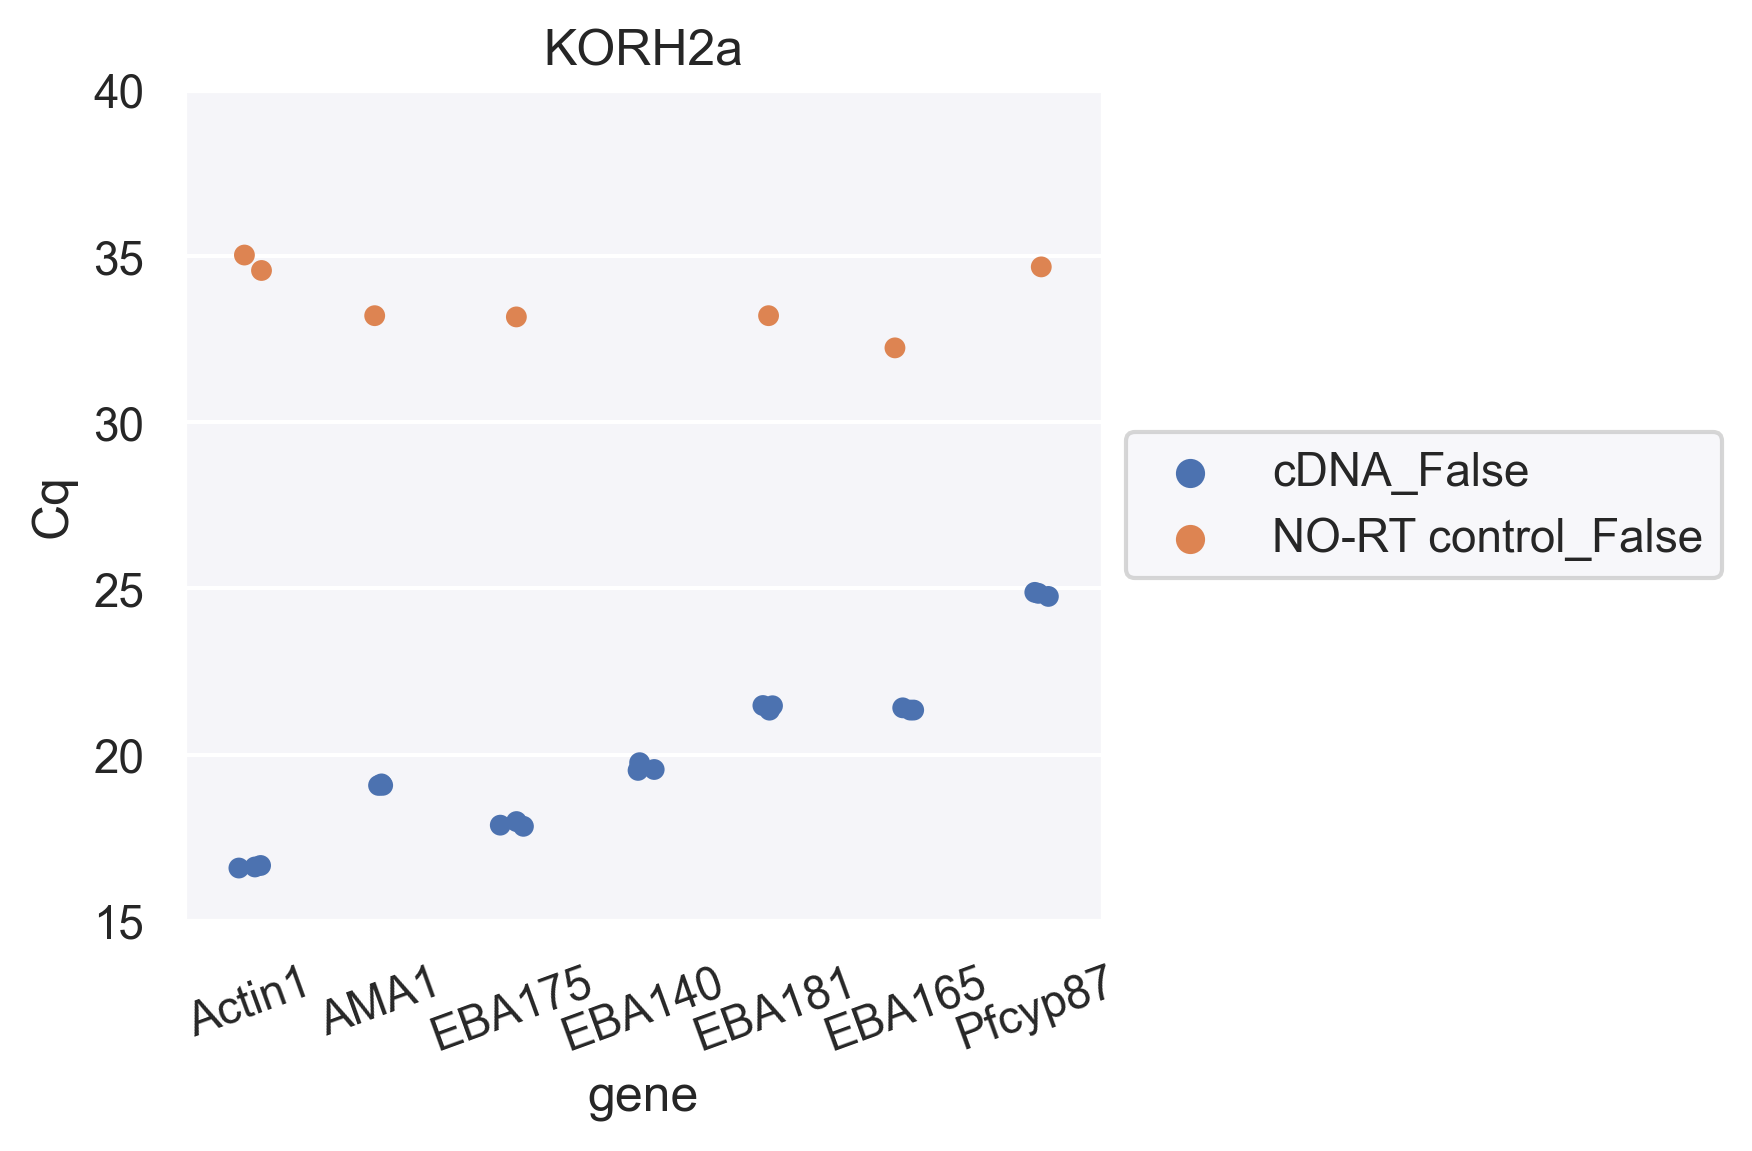

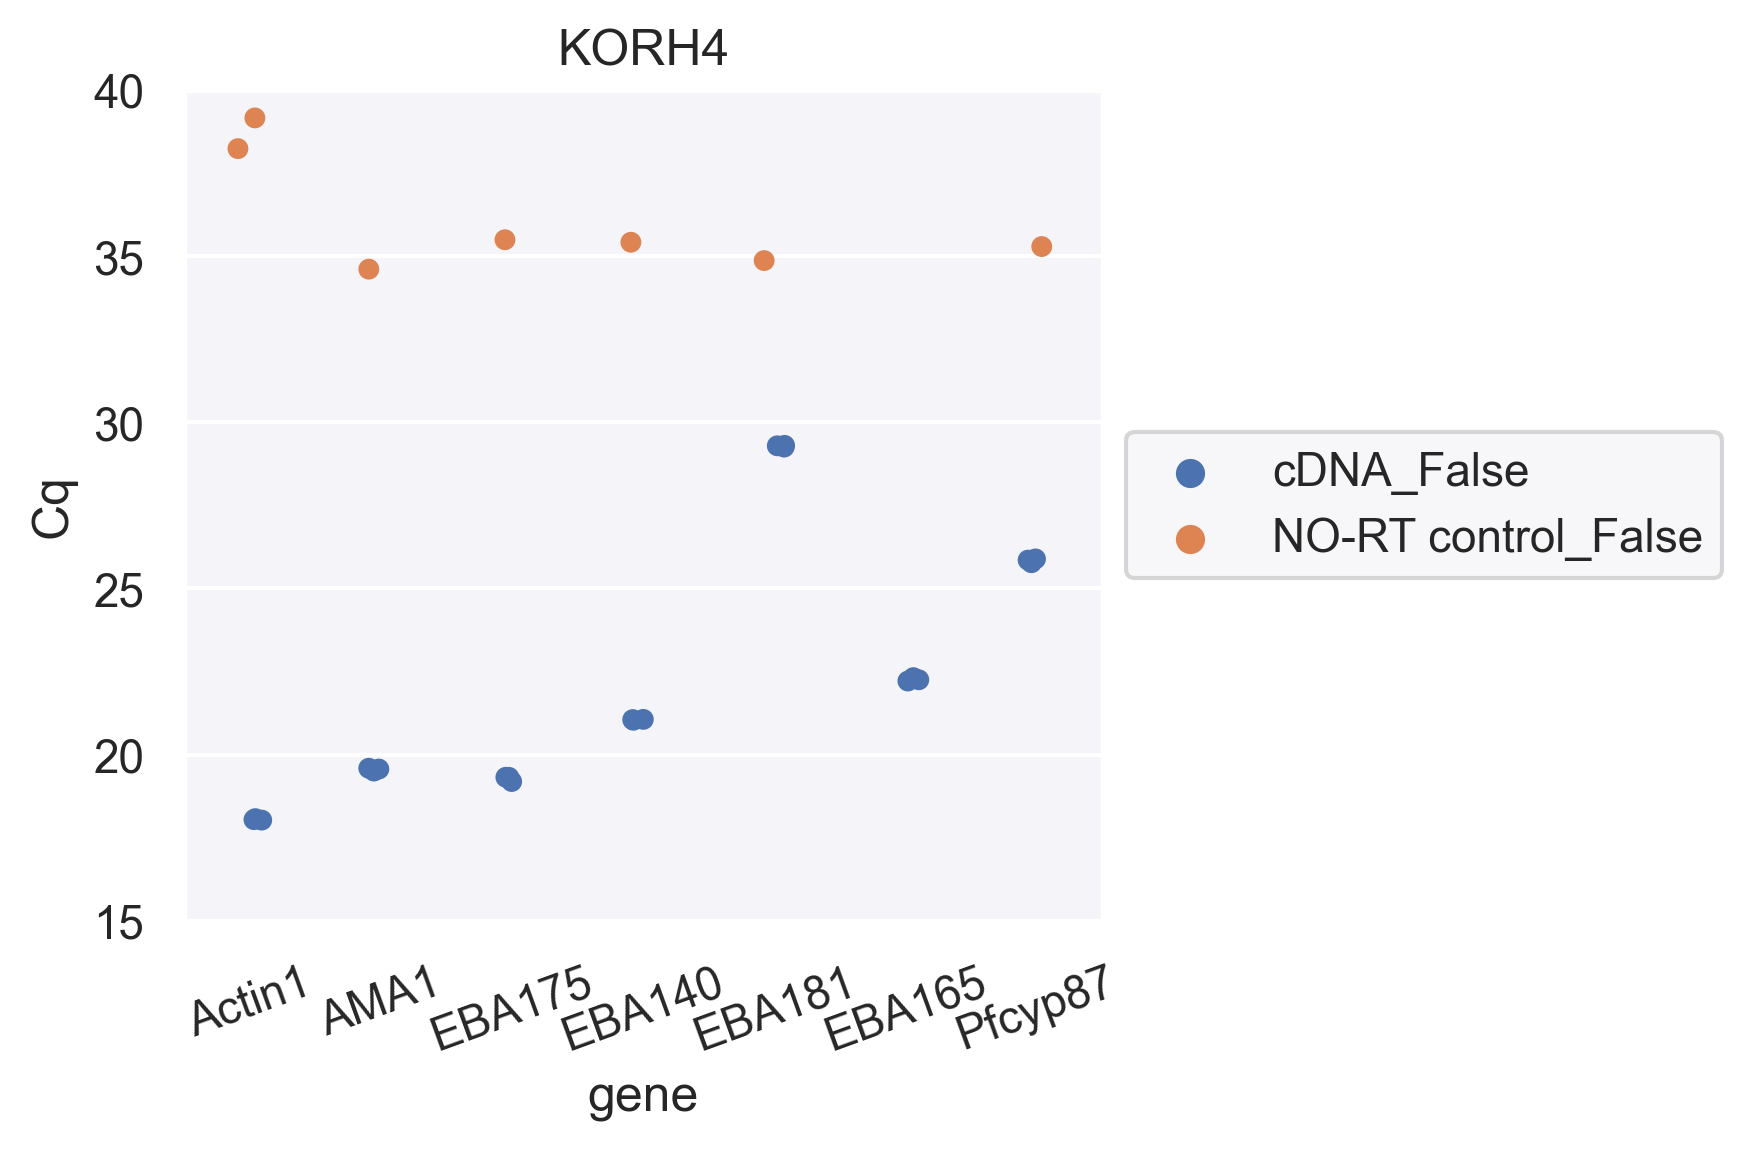

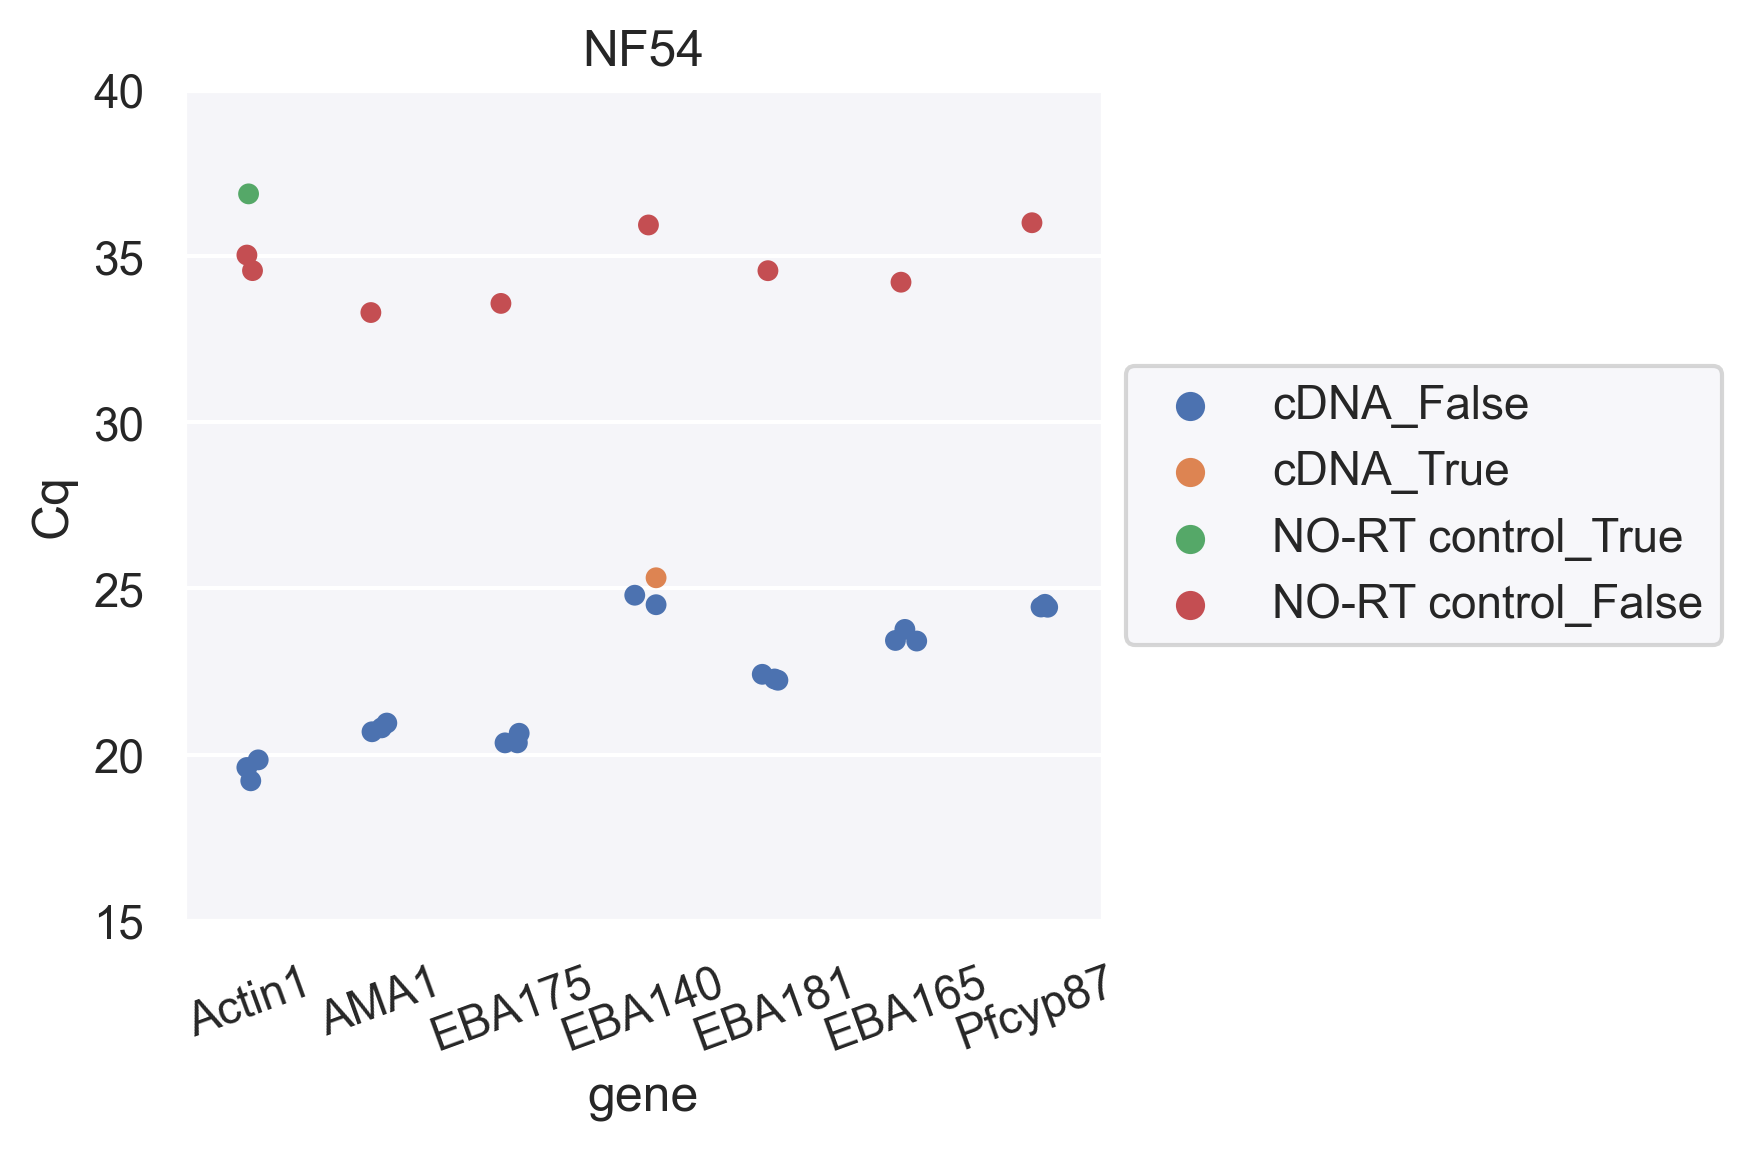

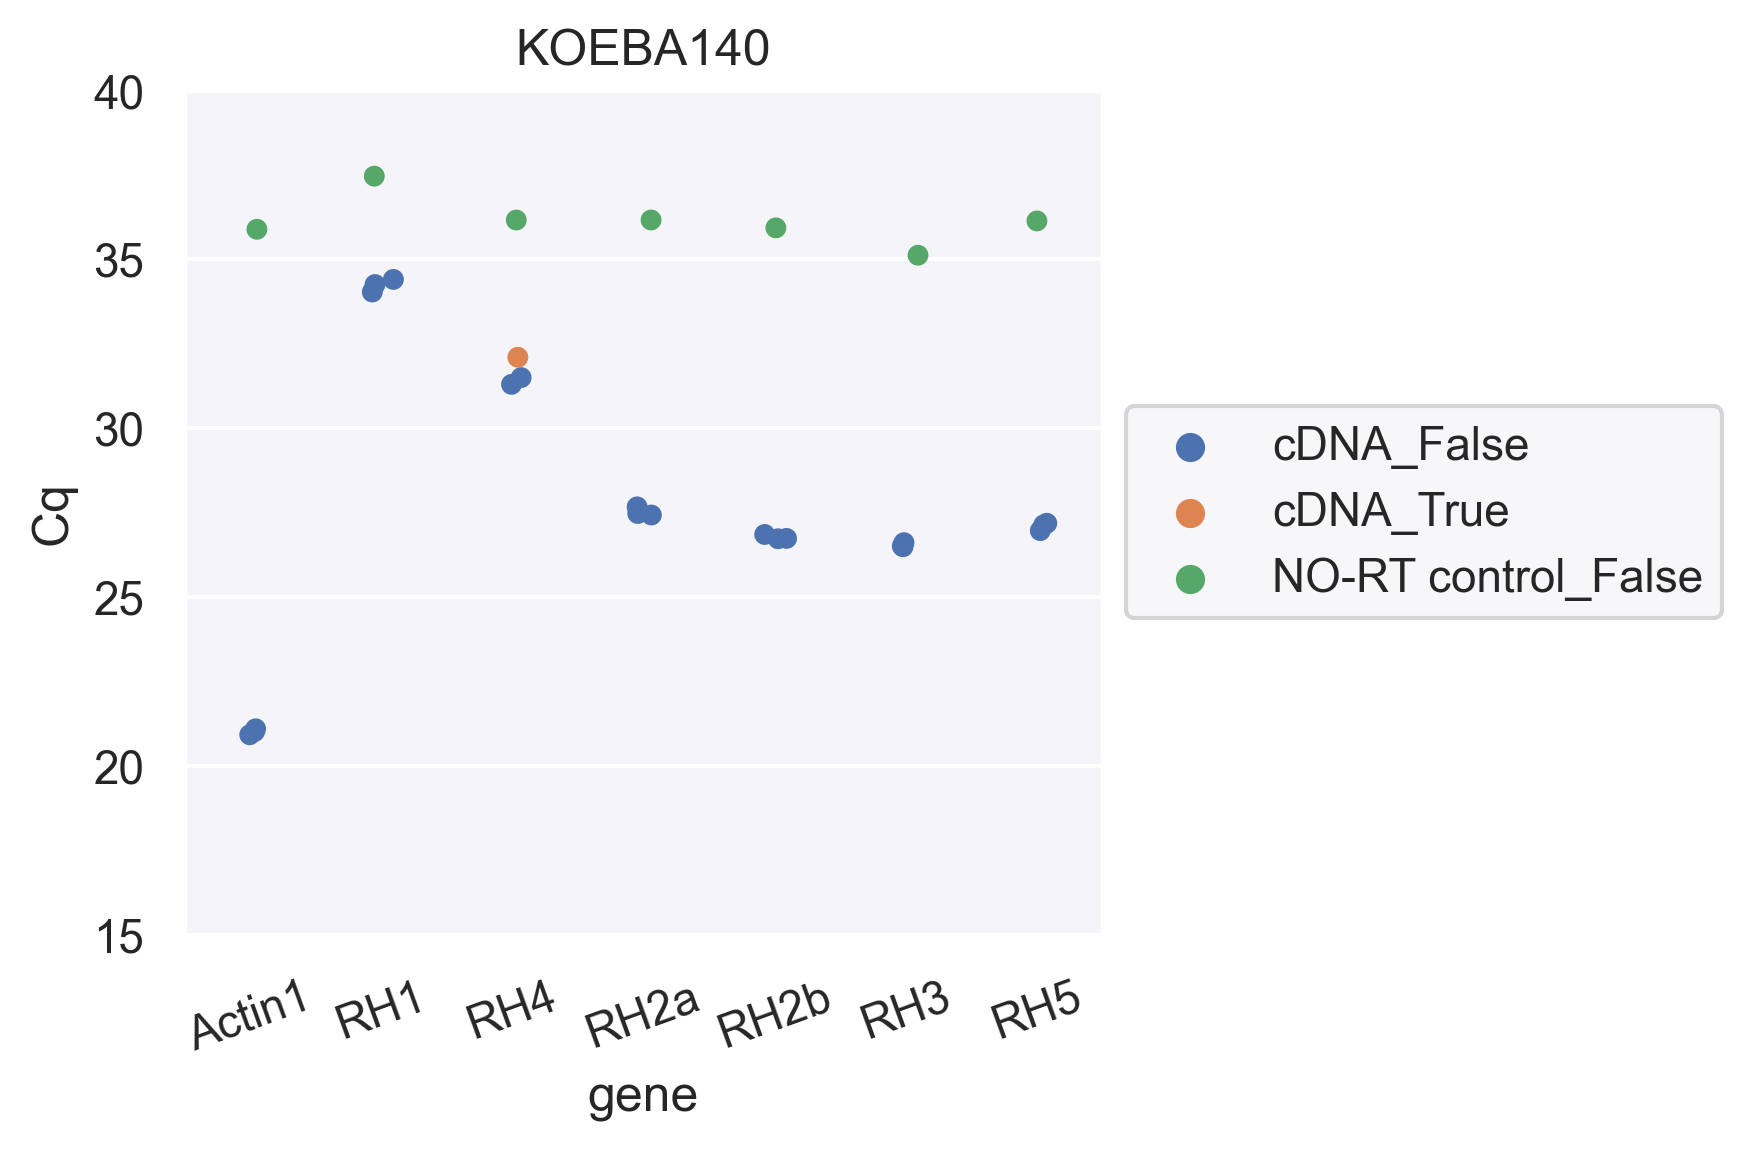

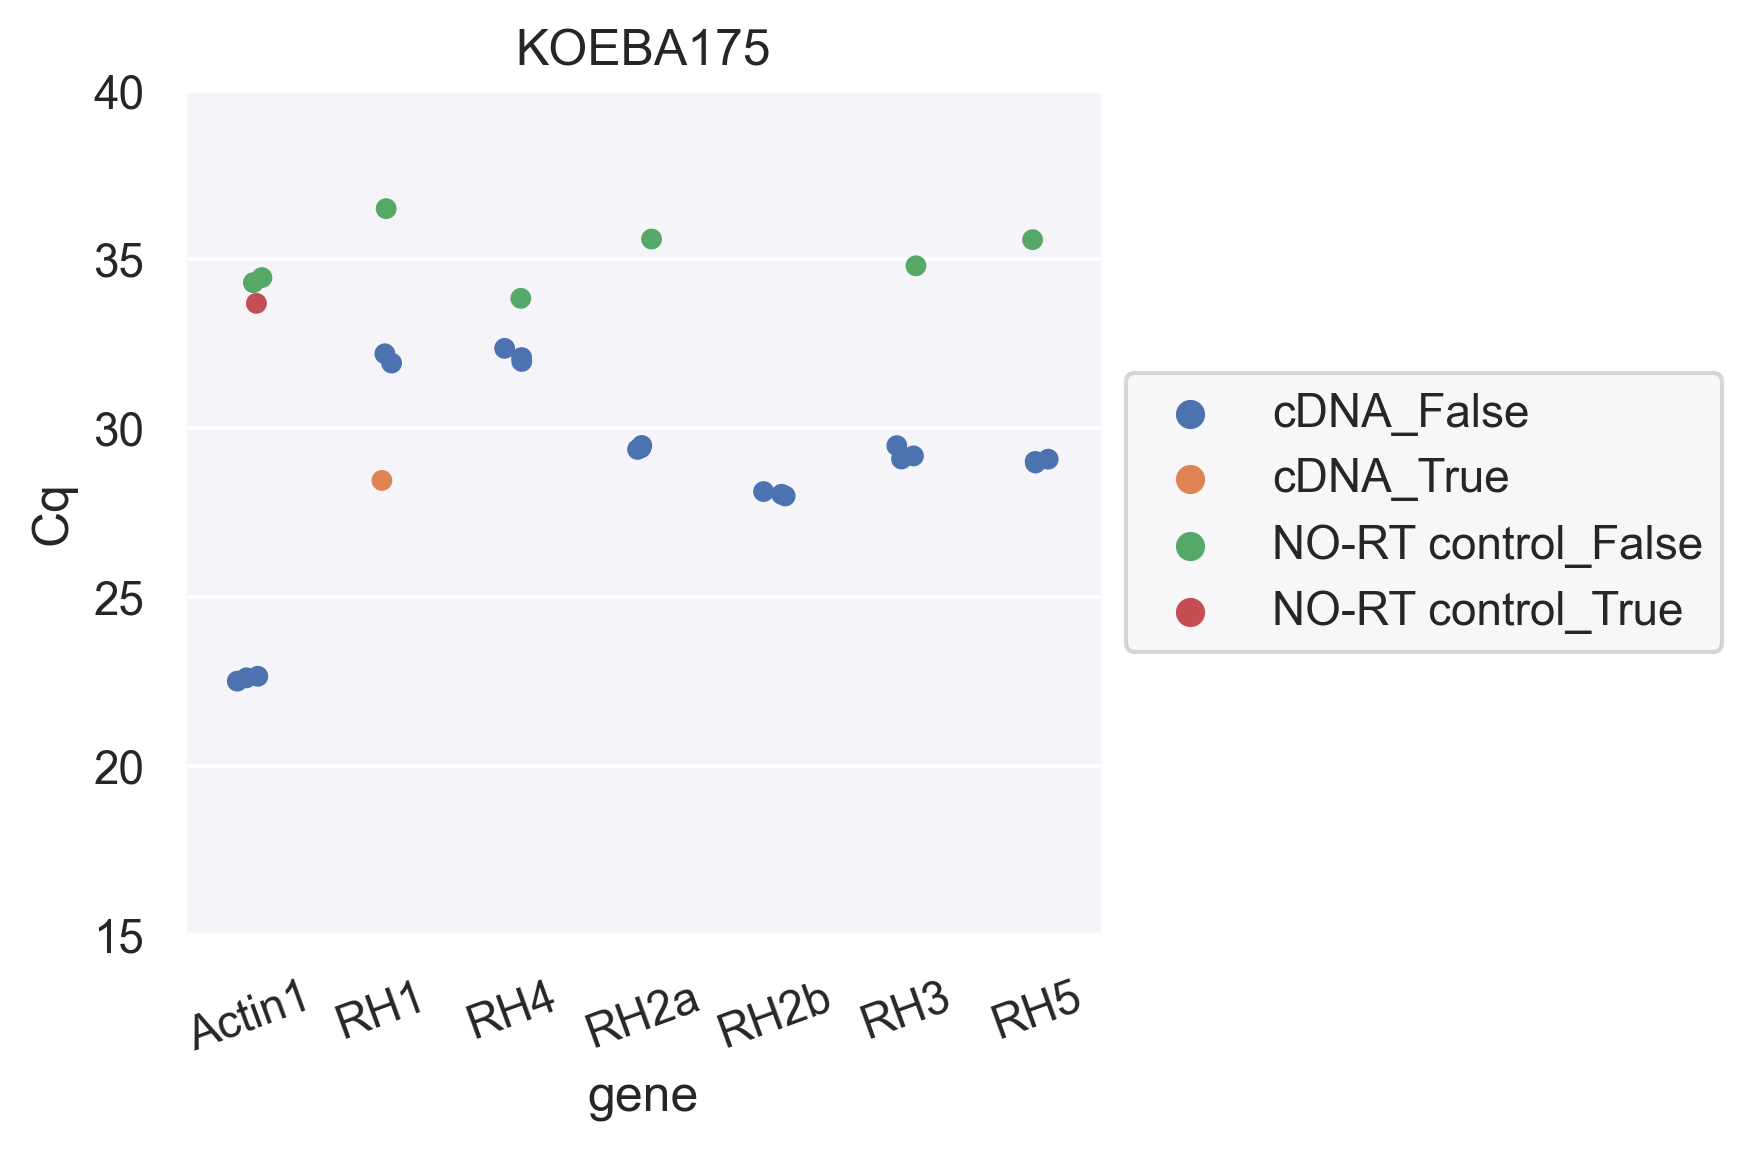

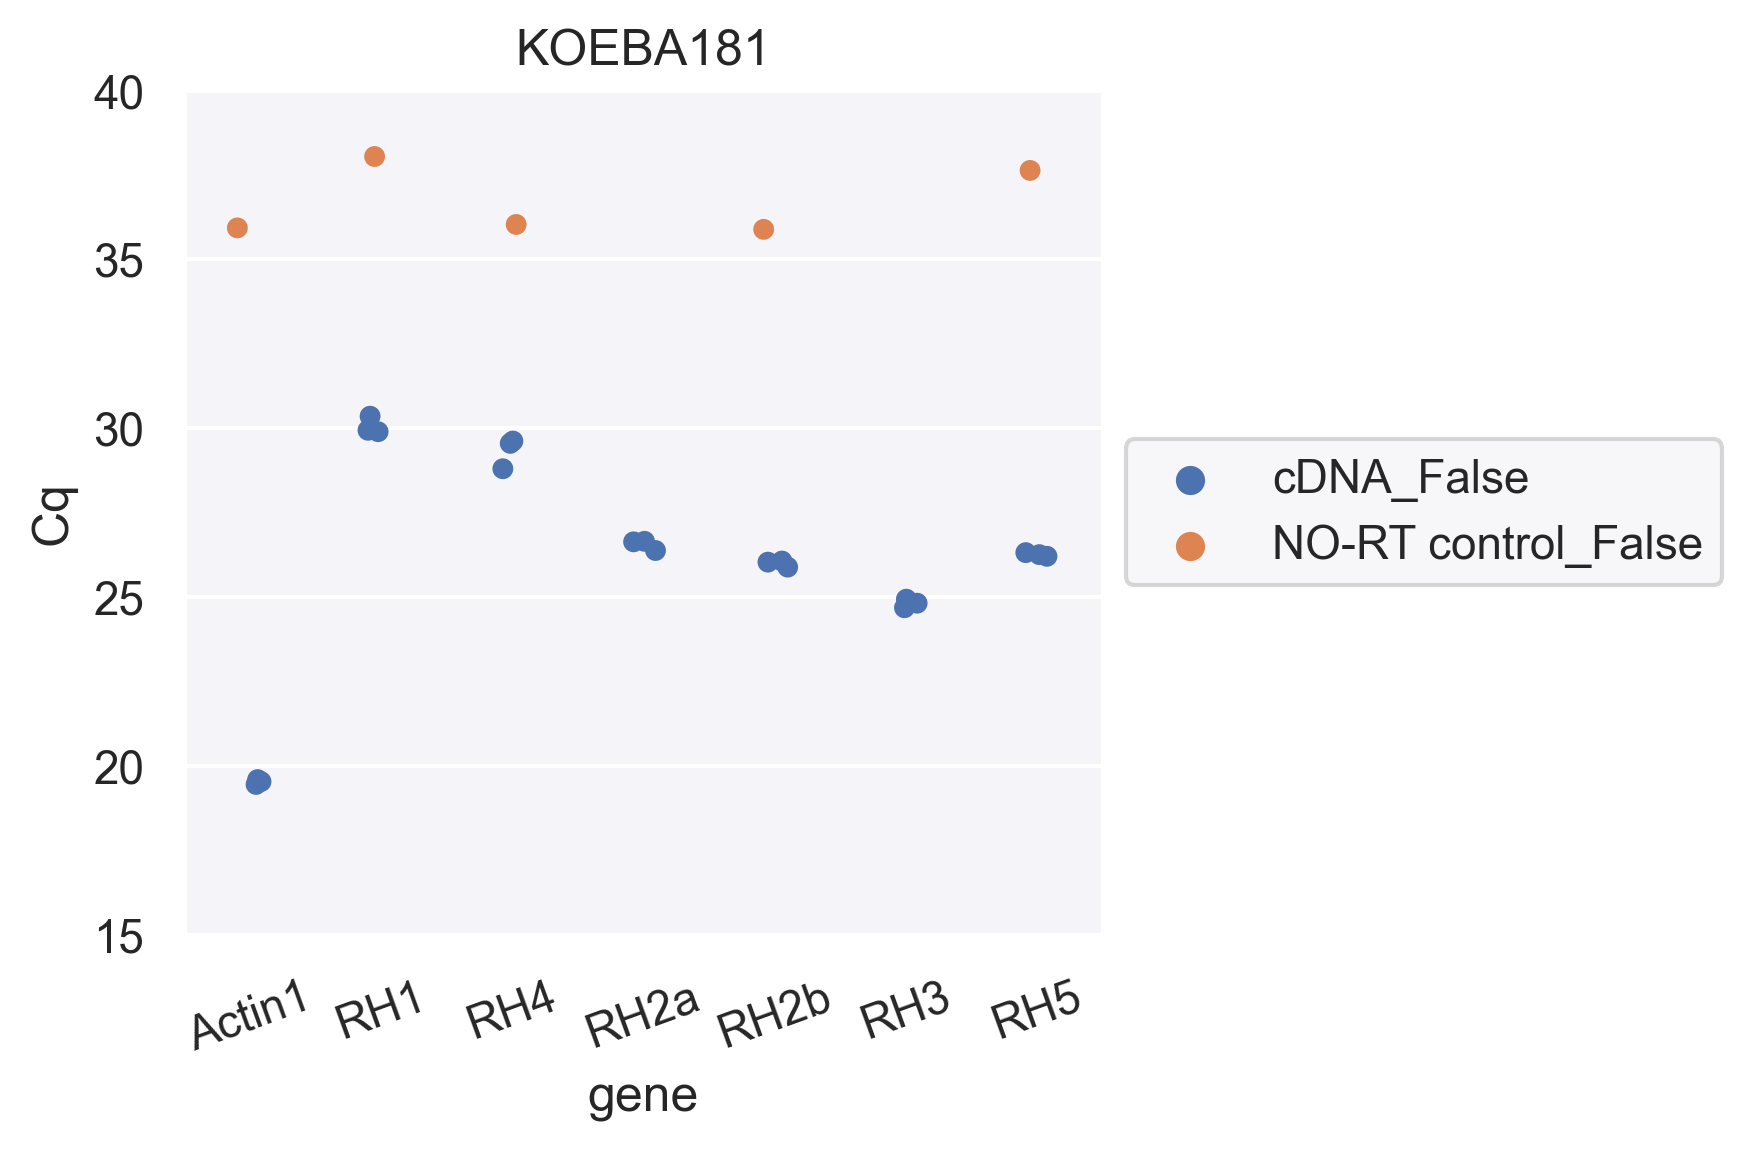

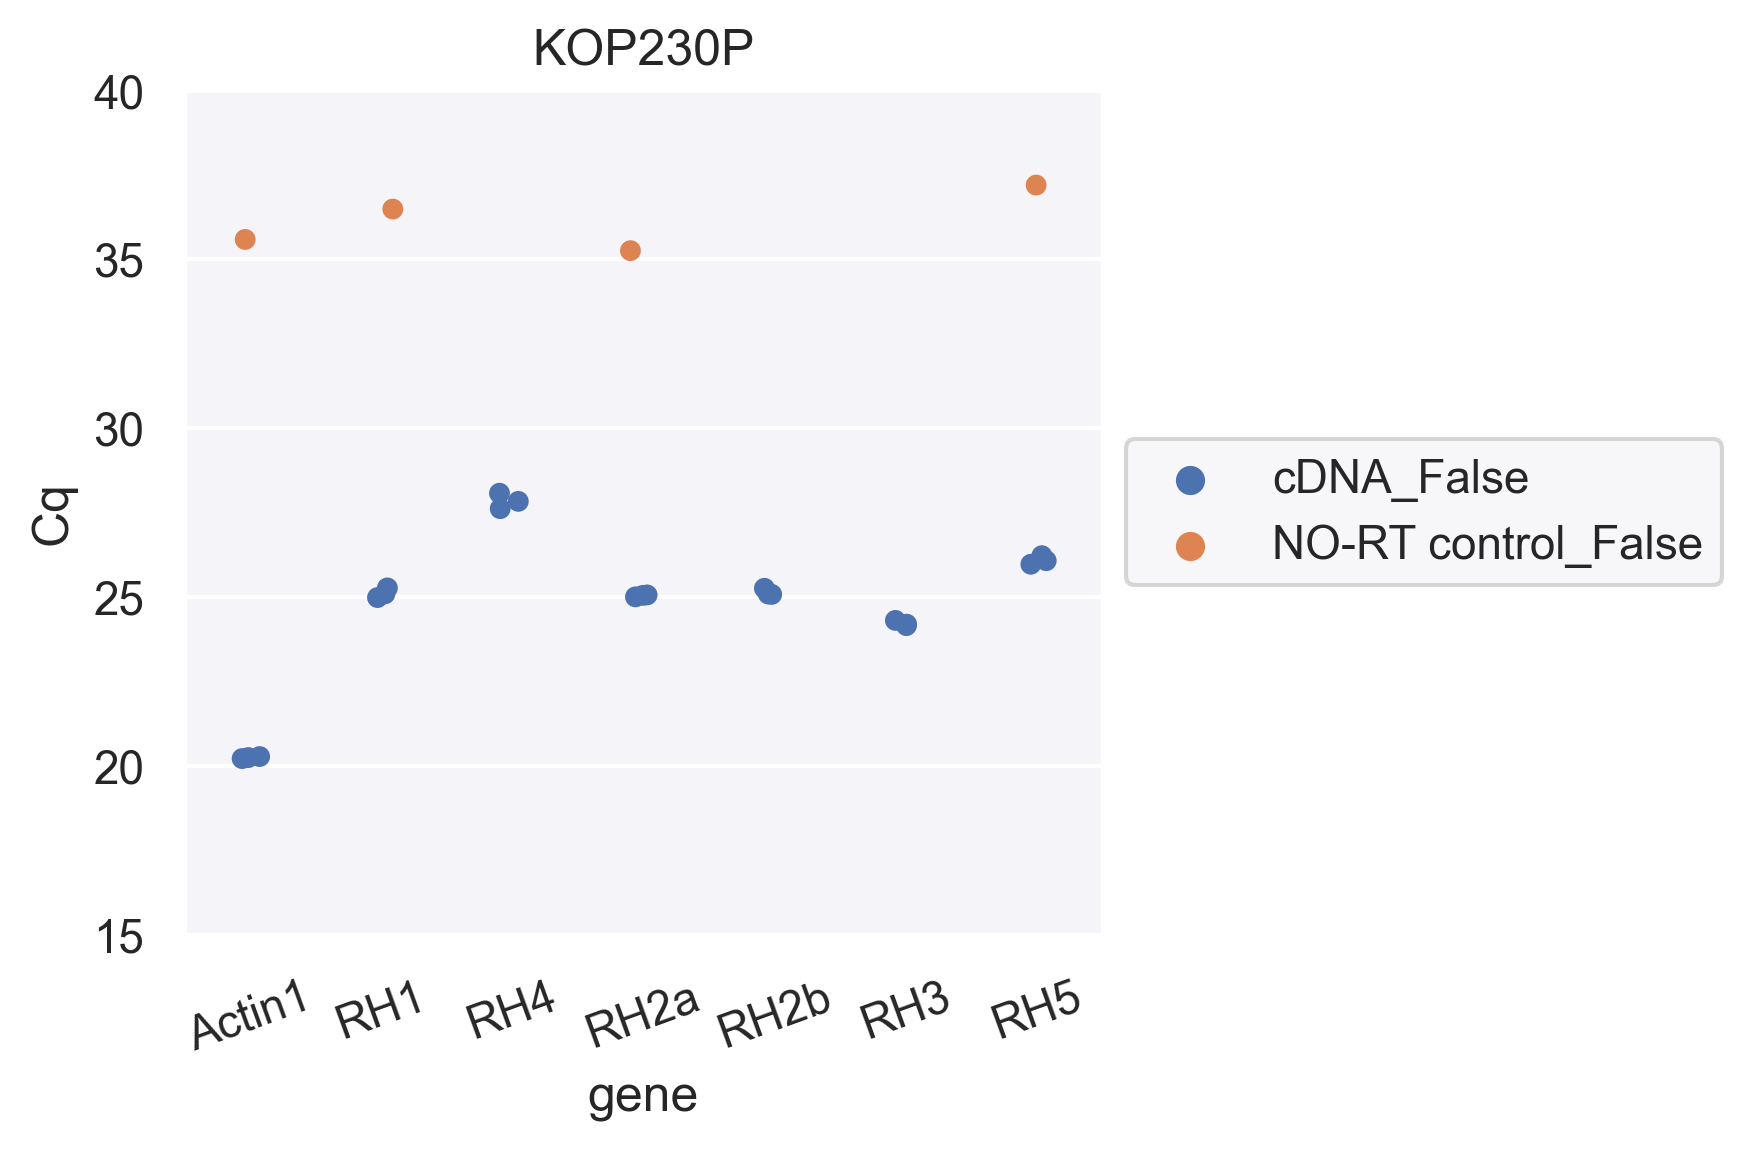

In [5]:
# run all experiments with KOP230P to normalize to
use_experiments = ['157', '158', '159', '160', '161', '162'] 
experiment_names = [e for e in experiment_names if any([u in e for u in use_experiments])]
print('Used experiment files:', experiment_names)

dfs = []

for e in experiment_names:
    output_folder = get_output_folder(experiment=e)
    df = load_dataframe(experiment_name=e)    
    standard_results = fit_to_standard(df, plot=False, output_folder=output_folder)
    plot_nort_controls(df, output_folder=output_folder)

    normalization_gene = 'Actin1'
    normalization_sample = 'KOP230P'

    df_cdna, sample_normalization_title, gene_normalization_title = add_concentration_and_normalizations(
        df=df.query('is_outlier == False'),
        standard_results=standard_results,
        normalization_gene=normalization_gene,
        normalization_sample=normalization_sample,
    )

    df_cdna_q = df_cdna.query('sample != @normalization_sample and gene != @normalization_gene')

    dfs.append(df_cdna_q)

df = pd.concat(dfs, ignore_index=True)
df.reset_index()

df.to_json('qpcr_df_05_KOP230P.json')

df

In [ ]:

# todo: add error bars

make_fold_change_plot(
    df=df,
    x_key='gene',
    y_key=sample_normalization_title,
    title=f"Gene Expression Fold Change to {normalization_sample} ({normalization_gene})",
    ylabel=f"Fold Change (normalized to {normalization_gene})",
    hue_key='sample',
    output_folder=output_folder,
    figsize=(20,10)
)